  # Income Prediction Project: US Census Data Analysis



  ## 1. Understanding the Problem and Data







  This project focuses on building a machine learning model to predict whether an individual earns more or less than $50,000 per year based on census data. We're working with a binary classification problem using data from the US Census that contains information for about 300,000 individuals.



  Let's start by importing the necessary libraries and loading our data.

In [ ]:
# !pip list

Package                 Version
----------------------- -----------
asttokens               3.0.0
cloudpickle             3.1.1
colorama                0.4.6
comm                    0.2.2
contourpy               1.3.1
cycler                  0.12.1
debugpy                 1.8.13
decorator               5.2.1
executing               2.2.0
fonttools               4.56.0
ipykernel               6.29.5
ipython                 9.0.2
ipython_pygments_lexers 1.1.1
jedi                    0.19.2
joblib                  1.4.2
jupyter_client          8.6.3
jupyter_core            5.7.2
kiwisolver              1.4.8
llvmlite                0.44.0
matplotlib              3.10.1
matplotlib-inline       0.1.7
nest-asyncio            1.6.0
numba                   0.61.0
numpy                   2.1.3
packaging               24.2
pandas                  2.2.3
parso                   0.8.4
pillow                  11.1.0
pip                     24.2
platformdirs            4.3.6
prompt_toolkit          3

# Packages used for Virutal Environment

In [ ]:
# Package                 Version
# ----------------------- -----------
# asttokens               3.0.0
# cloudpickle             3.1.1
# colorama                0.4.6
# comm                    0.2.2
# contourpy               1.3.1
# cycler                  0.12.1
# debugpy                 1.8.13
# decorator               5.2.1
# executing               2.2.0
# fonttools               4.56.0
# ipykernel               6.29.5
# ipython                 9.0.2
# ipython_pygments_lexers 1.1.1
# jedi                    0.19.2
# joblib                  1.4.2
# jupyter_client          8.6.3
# jupyter_core            5.7.2
# kiwisolver              1.4.8
# llvmlite                0.44.0
# matplotlib              3.10.1
# matplotlib-inline       0.1.7
# nest-asyncio            1.6.0
# numba                   0.61.0
# numpy                   2.1.3
# packaging               24.2
# pandas                  2.2.3
# parso                   0.8.4
# pillow                  11.1.0
# pip                     24.2
# platformdirs            4.3.6
# prompt_toolkit          3.0.50
# psutil                  7.0.0
# pure_eval               0.2.3
# Pygments                2.19.1
# pyparsing               3.2.1
# python-dateutil         2.9.0.post0
# pytz                    2025.1
# pywin32                 309
# pyzmq                   26.3.0
# scikit-learn            1.6.1
# scipy                   1.15.2
# seaborn                 0.13.2
# shap                    0.47.0
# six                     1.17.0
# slicer                  0.0.8
# stack-data              0.6.3
# threadpoolctl           3.5.0
# tornado                 6.4.2
# tqdm                    4.67.1
# traitlets               5.14.3
# typing_extensions       4.12.2
# tzdata                  2025.1
# wcwidth                 0.2.13
# xgboost                 2.1.4

In [49]:
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler, OneHotEncoder, RobustScaler, LabelEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score, StratifiedKFold
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, precision_recall_curve, auc, log_loss, roc_curve
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, VotingClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.neural_network import MLPClassifier
from sklearn.decomposition import PCA
import xgboost as xgb
import time
import pickle
import os
import warnings
warnings.filterwarnings('ignore')

# Set plot style
plt.style.use('ggplot')



In [50]:
#Increase the dispaly size of outpus and dataframes
pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)
pd.set_option('display.expand_frame_repr', False)

  Let's load the training and test data:

In [51]:
# Load data from CSV files
train_data  = pd.read_csv('C:\Important Files\Code and Software\Python Projects\DataIku\Data\census_income_learn.csv', header=None)
test_data  = pd.read_csv('C:\Important Files\Code and Software\Python Projects\DataIku\Data\census_income_test.csv', header=None)

print(test_data.shape, train_data.shape)


combined_data = pd.concat([train_data, test_data], axis=0, ignore_index=True)

print("Combined data shape:", combined_data.shape)
train_data.head()



(99762, 42) (199523, 42)
Combined data shape: (299285, 42)


,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41
0,73,Not in universe,0,0,High school graduate,0,Not in universe,Widowed,Not in universe or children,Not in universe,White,All other,Female,Not in universe,Not in universe,Not in labor force,0,0,0,Nonfiler,Not in universe,Not in universe,Other Rel 18+ ever marr not in subfamily,Other relative of householder,1700.09,?,?,?,Not in universe under 1 year old,?,0,Not in universe,United-States,United-States,United-States,Native- Born in the United States,0,Not in universe,2,0,95,- 50000.
1,58,Self-employed-not incorporated,4,34,Some college but no degree,0,Not in universe,Divorced,Construction,Precision production craft & repair,White,All other,Male,Not in universe,Not in universe,Children or Armed Forces,0,0,0,Head of household,South,Arkansas,Householder,Householder,1053.55,MSA to MSA,Same county,Same county,No,Yes,1,Not in universe,United-States,United-States,United-States,Native- Born in the United States,0,Not in universe,2,52,94,- 50000.
2,18,Not in universe,0,0,10th grade,0,High school,Never married,Not in universe or children,Not in universe,Asian or Pacific Islander,All other,Female,Not in universe,Not in universe,Not in labor force,0,0,0,Nonfiler,Not in universe,Not in universe,Child 18+ never marr Not in a subfamily,Child 18 or older,991.95,?,?,?,Not in universe under 1 year old,?,0,Not in universe,Vietnam,Vietnam,Vietnam,Foreign born- Not a citizen of U S,0,Not in universe,2,0,95,- 50000.
3,9,Not in universe,0,0,Children,0,Not in universe,Never married,Not in universe or children,Not in universe,White,All other,Female,Not in universe,Not in universe,Children or Armed Forces,0,0,0,Nonfiler,Not in universe,Not in universe,Child <18 never marr not in subfamily,Child under 18 never married,1758.14,Nonmover,Nonmover,Nonmover,Yes,Not in universe,0,Both parents present,United-States,United-States,United-States,Native- Born in the United States,0,Not in universe,0,0,94,- 50000.
4,10,Not in universe,0,0,Children,0,Not in universe,Never married,Not in universe or children,Not in universe,White,All other,Female,Not in universe,Not in universe,Children or Armed Forces,0,0,0,Nonfiler,Not in universe,Not in universe,Child <18 never marr not in subfamily,Child under 18 never married,1069.16,Nonmover,Nonmover,Nonmover,Yes,Not in universe,0,Both parents present,United-States,United-States,United-States,Native- Born in the United States,0,Not in universe,0,0,94,- 50000.


  Based on the metadata file, let's assign meaningful column names to our data:

In [52]:
# Column names from metadata
column_names = [
    'age', 'class_of_worker', 'industry_code', 'occupation_code', 'education',
    'wage_per_hour', 'enrolled_in_edu_inst', 'marital_status', 'major_industry_code',
    'major_occupation_code', 'race', 'hispanic_origin', 'sex', 'member_of_labor_union',
    'reason_for_unemployment', 'full_or_part_time_employment', 'capital_gains',
    'capital_losses', 'dividends_from_stocks', 'tax_filer_status', 'region_of_previous_residence',
    'state_of_previous_residence', 'detailed_household_summary', 'detailed_household_summary_in_household',
    'instance_weight', 'migration_code_change_in_msa', 'migration_code_change_in_reg',
    'migration_code_move_within_reg', 'live_in_this_house_1_year_ago', 'migration_prev_res_in_sunbelt',
    'num_persons_worked_for_employer', 'family_members_under_18', 'country_of_birth_father',
    'country_of_birth_mother', 'country_of_birth_self', 'citizenship', 'own_business_or_self_employed',
    'fill_inc_questionnaire_for_veteran', 'veterans_benefits', 'weeks_worked_in_year', 'year', 'income'
]

# Apply column names
train_data.columns = column_names
test_data.columns = column_names
combined_data.columns = column_names

# Check the income target distribution
combined_data['income'].value_counts()

income
- 50000.    280717
50000+.      18568
Name: count, dtype: int64

  # 2. Data Check







  Let's analyze the data to understand its structure, missing values, and data types.

In [53]:
# Check data types and missing data
def analyze_dataframe(df):
    # Replace blank values with NaN
    df = df.replace(r'^\s*$', np.nan, regex=True)
    
    # Get the data type for each column
    data_types = df.dtypes
    
    # Get the number of missing values for each column
    missing_values = df.isnull().sum()
    
    # Calculate the percentage of missing values for each column
    missing_percentage = (missing_values / len(df)) * 100
    
    # Get the number of unique values for each column
    unique_values = df.nunique()
    
    # Combine all the information into a single DataFrame
    analysis_df = pd.DataFrame({
        'Data Type': data_types,
        'Missing Values': missing_values,
        '% Missing': missing_percentage,
        'Unique Values': unique_values
    })
    
    return analysis_df

def count_data_types(df):
    # Get the data type for each column and count occurrences of each type
    data_type_counts = df.dtypes.value_counts()
    return data_type_counts

# Analyze the DataFrame
analysis_result = analyze_dataframe(combined_data)

# Print the result
print("Data Analysis:")
print(analysis_result)

# Count data types
data_type_counts = count_data_types(combined_data)

# Print the data type counts
print("\nData Type Counts:")
print(data_type_counts)



Data Analysis:
                                        Data Type  Missing Values  % Missing  Unique Values
age                                         int64               0        0.0             91
class_of_worker                            object               0        0.0              9
industry_code                               int64               0        0.0             52
occupation_code                             int64               0        0.0             47
education                                  object               0        0.0             17
wage_per_hour                               int64               0        0.0           1425
enrolled_in_edu_inst                       object               0        0.0              3
marital_status                             object               0        0.0              7
major_industry_code                        object               0        0.0             24
major_occupation_code                      object               0

  Let's check for duplicate rows in our data and drop them consistently across sets:







  We need to track dropped rows to ensure consistency between train and test sets.

In [54]:
# Function to track and consistently drop duplicates across datasets
def track_and_drop_duplicates(combined_df, train_df, test_df):
    # Get initial shapes
    print(f"Before: Combined data shape: {combined_df.shape}")
    print(f"Before: Train data shape: {train_df.shape}")
    print(f"Before: Test data shape: {test_df.shape}")
    
    # Check initial duplicates
    duplicates_count = combined_df.duplicated().sum()
    print(f"Number of duplicate rows in combined dataset: {duplicates_count}")
    
    # Get the indices of the duplicate rows in the combined dataset
    duplicate_mask = combined_df.duplicated(keep='first')
    duplicate_indices = combined_df[duplicate_mask].index.tolist()
    
    # Split these indices into train and test
    train_size = train_df.shape[0]
    train_duplicate_indices = [idx for idx in duplicate_indices if idx < train_size]
    test_duplicate_indices = [idx - train_size for idx in duplicate_indices if idx >= train_size]
    
    print(f"Duplicates in train: {len(train_duplicate_indices)}")
    print(f"Duplicates in test: {len(test_duplicate_indices)}")
    
    # Drop duplicates from all datasets
    combined_df_clean = combined_df.drop_duplicates(keep='first').reset_index(drop=True)
    train_df_clean = train_df.drop(index=train_duplicate_indices, errors='ignore').reset_index(drop=True)
    test_df_clean = test_df.drop(index=test_duplicate_indices, errors='ignore').reset_index(drop=True)
    
    # Cross-check consistency
    print(f"After: Combined data shape: {combined_df_clean.shape}")
    print(f"After: Train data shape: {train_df_clean.shape}")
    print(f"After: Test data shape: {test_df_clean.shape}")
    print(f"Sum of train + test: {train_df_clean.shape[0] + test_df_clean.shape[0]}")
    
    return combined_df_clean, train_df_clean, test_df_clean

# Apply the function
combined_data_clean, train_data_clean, test_data_clean = track_and_drop_duplicates(
    combined_data, train_data, test_data
)


Before: Combined data shape: (299285, 42)
Before: Train data shape: (199523, 42)
Before: Test data shape: (99762, 42)
Number of duplicate rows in combined dataset: 6735
Duplicates in train: 3229
Duplicates in test: 3506
After: Combined data shape: (292550, 42)
After: Train data shape: (196294, 42)
After: Test data shape: (96256, 42)
Sum of train + test: 292550


# 3. Exploratory Data Analysis (EDA)
### 3.1 Target Variable Distribution

First, let's examine the distribution of our target variable (income).

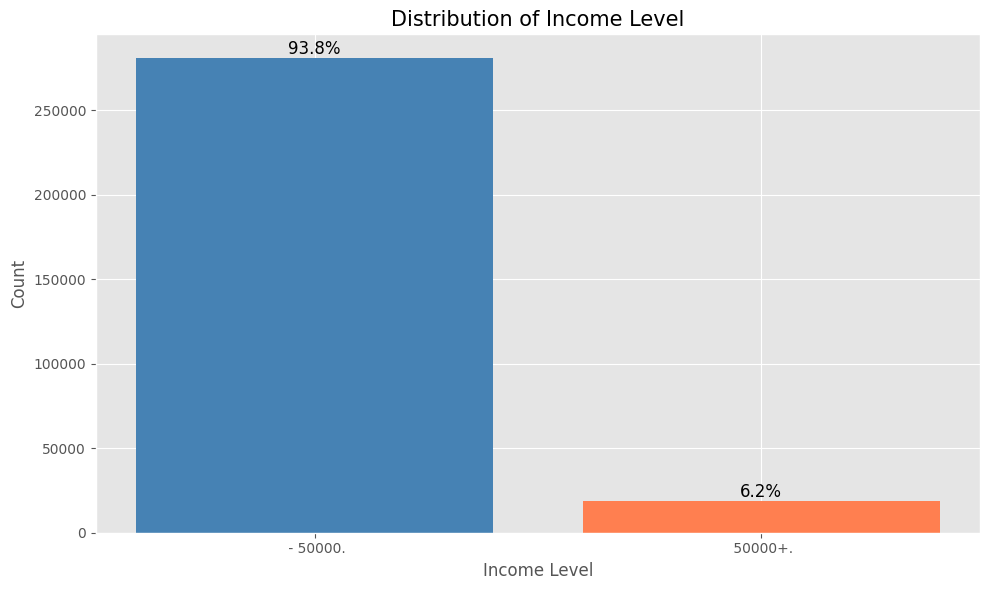

Income distribution:
income
- 50000.    280717
50000+.      18568
Name: count, dtype: int64
Unique income values: [' - 50000.' ' 50000+.']
Percentage  - 50000.: 93.80%
Percentage  50000+.: 6.20%


In [79]:
# Target variable distribution - Fixed version
plt.figure(figsize=(10, 6))
income_counts = combined_data['income'].value_counts()
plt.bar(income_counts.index, income_counts.values, color=['steelblue', 'coral'])
plt.title('Distribution of Income Level', fontsize=15)
plt.xlabel('Income Level', fontsize=12)
plt.ylabel('Count', fontsize=12)
plt.xticks(rotation=0)

# Add percentage labels
total = income_counts.sum()
for i, count in enumerate(income_counts.values):
    percentage = count / total * 100
    plt.text(i, count, f'{percentage:.1f}%', ha='center', va='bottom', fontsize=12)

plt.tight_layout()
plt.show()

# Print the exact numbers - using actual values in the dataset
print(f"Income distribution:\n{income_counts}")
# Check actual values in the dataset
print(f"Unique income values: {combined_data['income'].unique()}")
# Calculate percentages using the actual values in the dataset
for income_level in combined_data['income'].unique():
    percentage = (combined_data['income'] == income_level).mean() * 100
    print(f"Percentage {income_level}: {percentage:.2f}%")

### 3.2 Numerical Features Analysis

Let's examine the distributions of numerical features and their relationships with income.

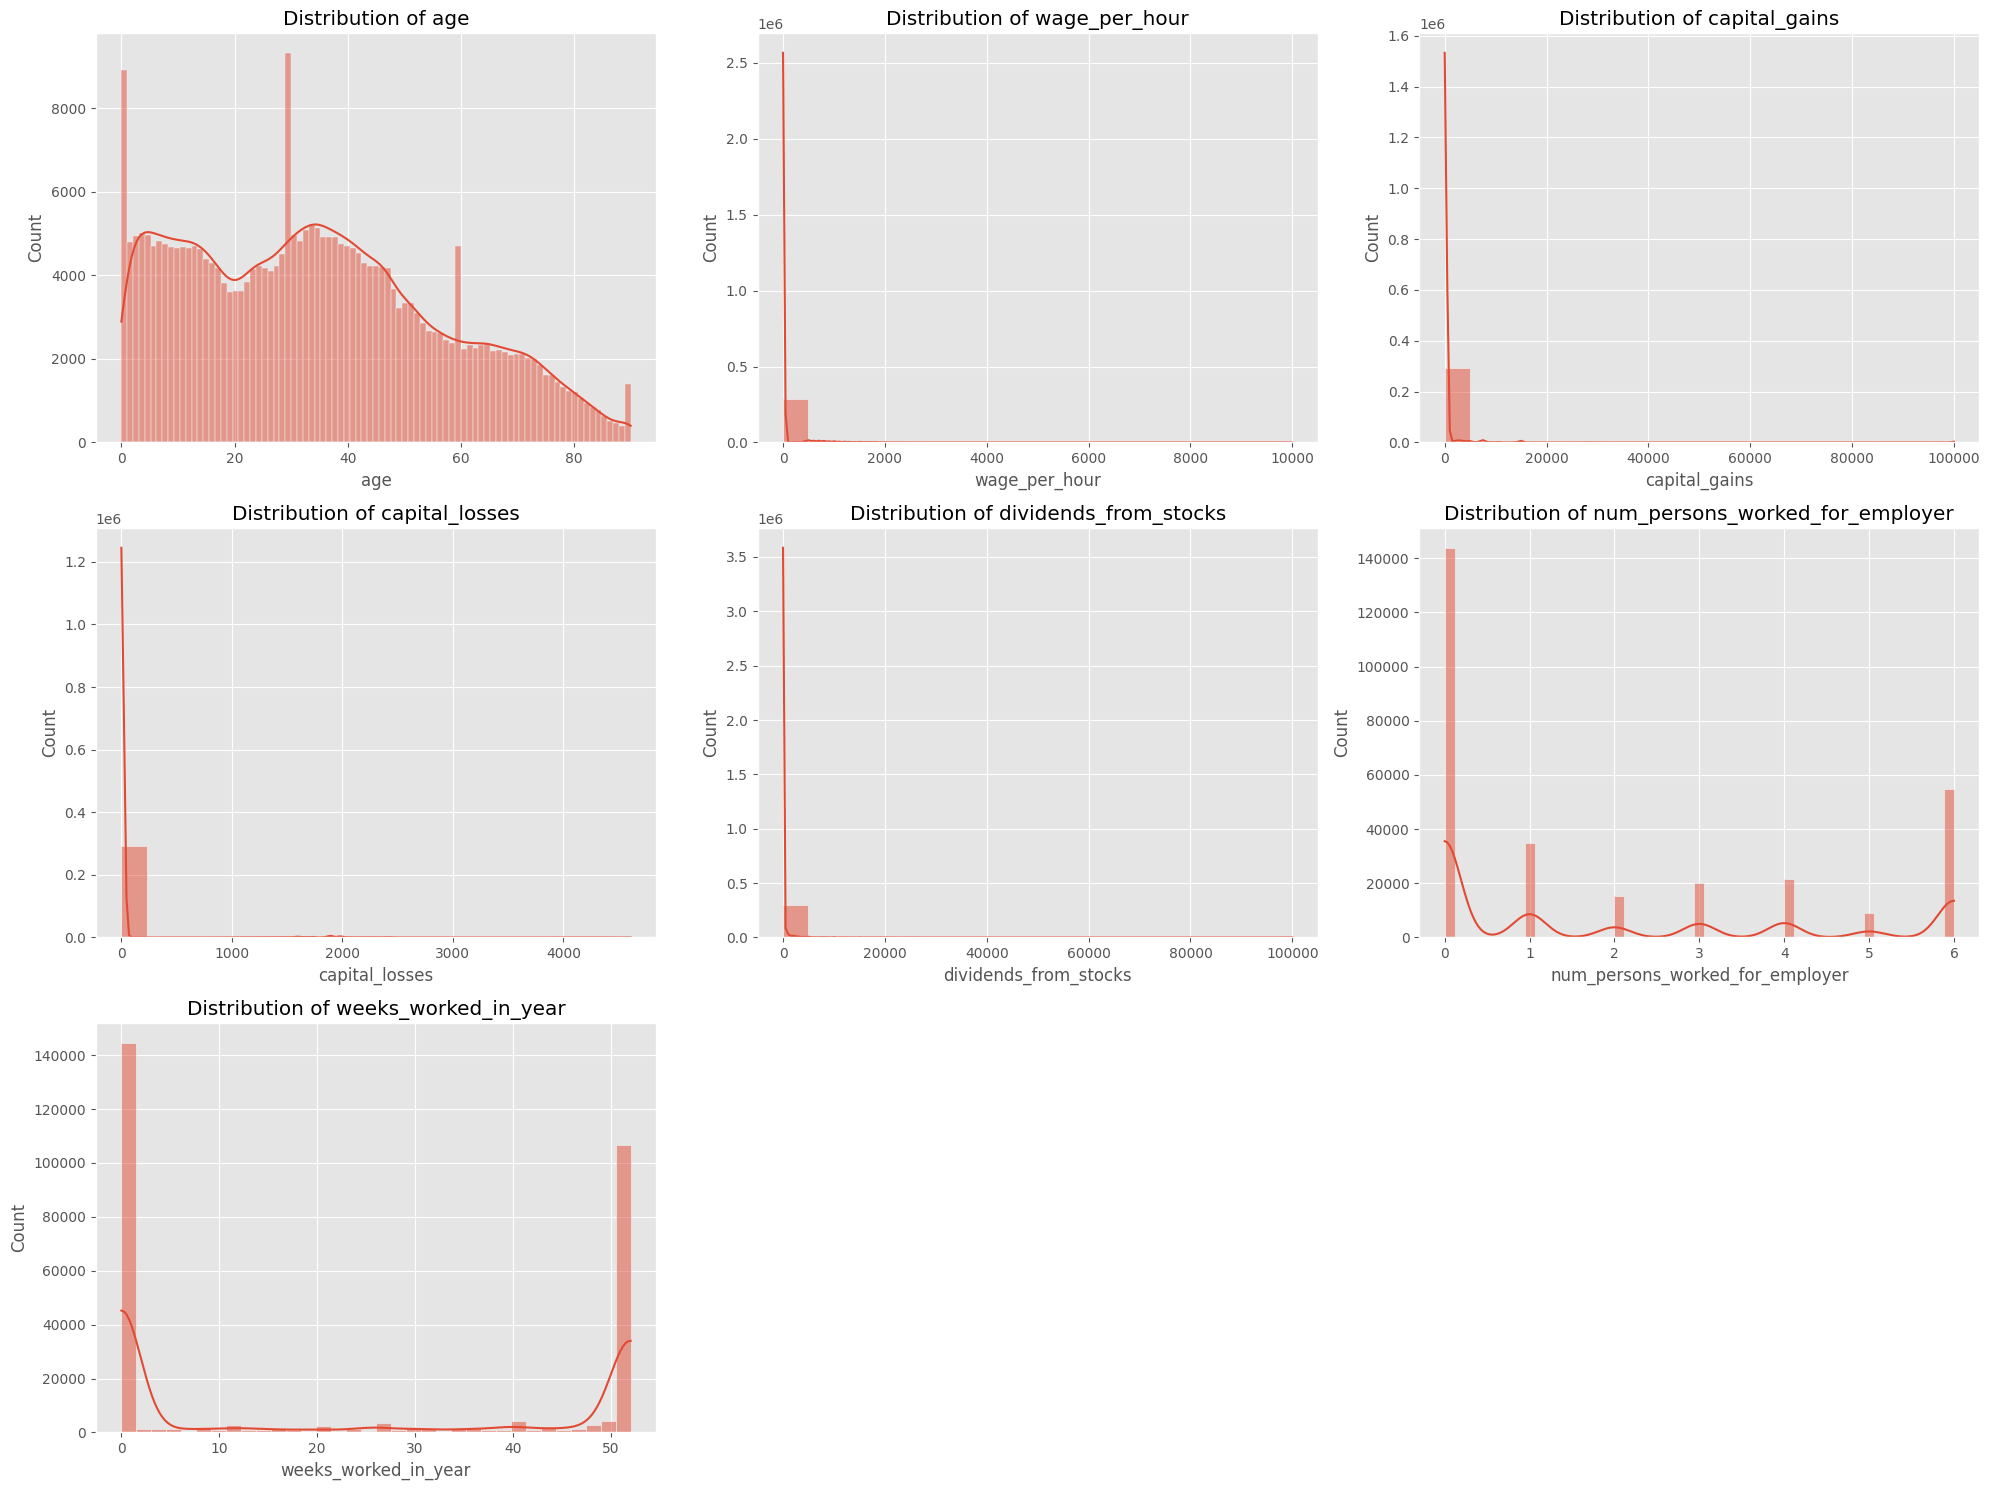

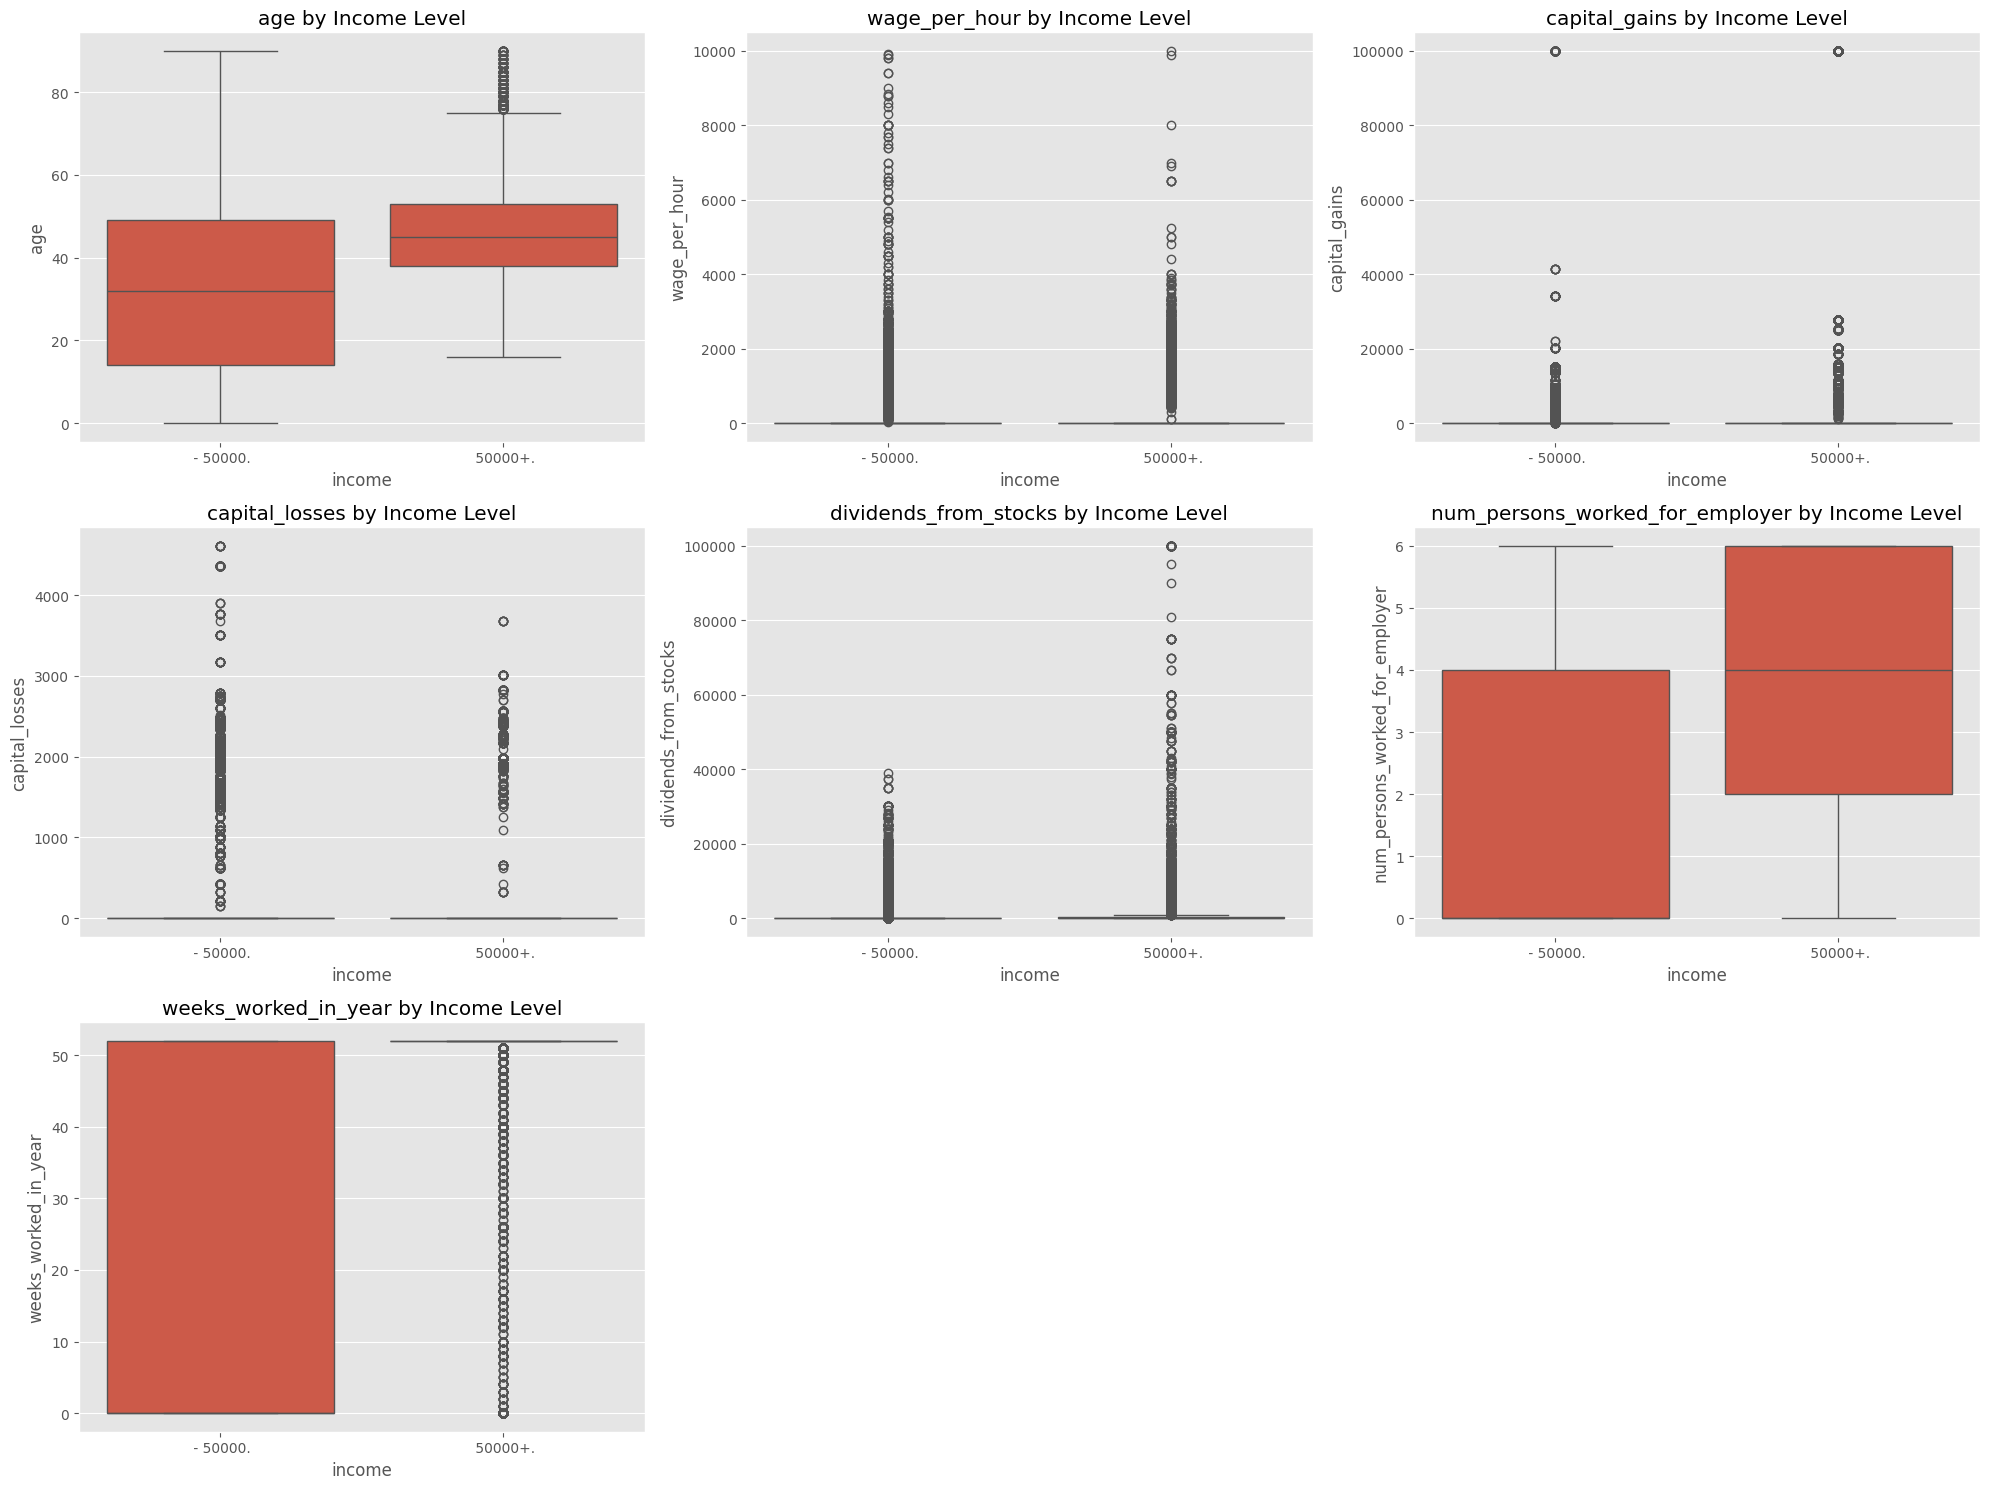

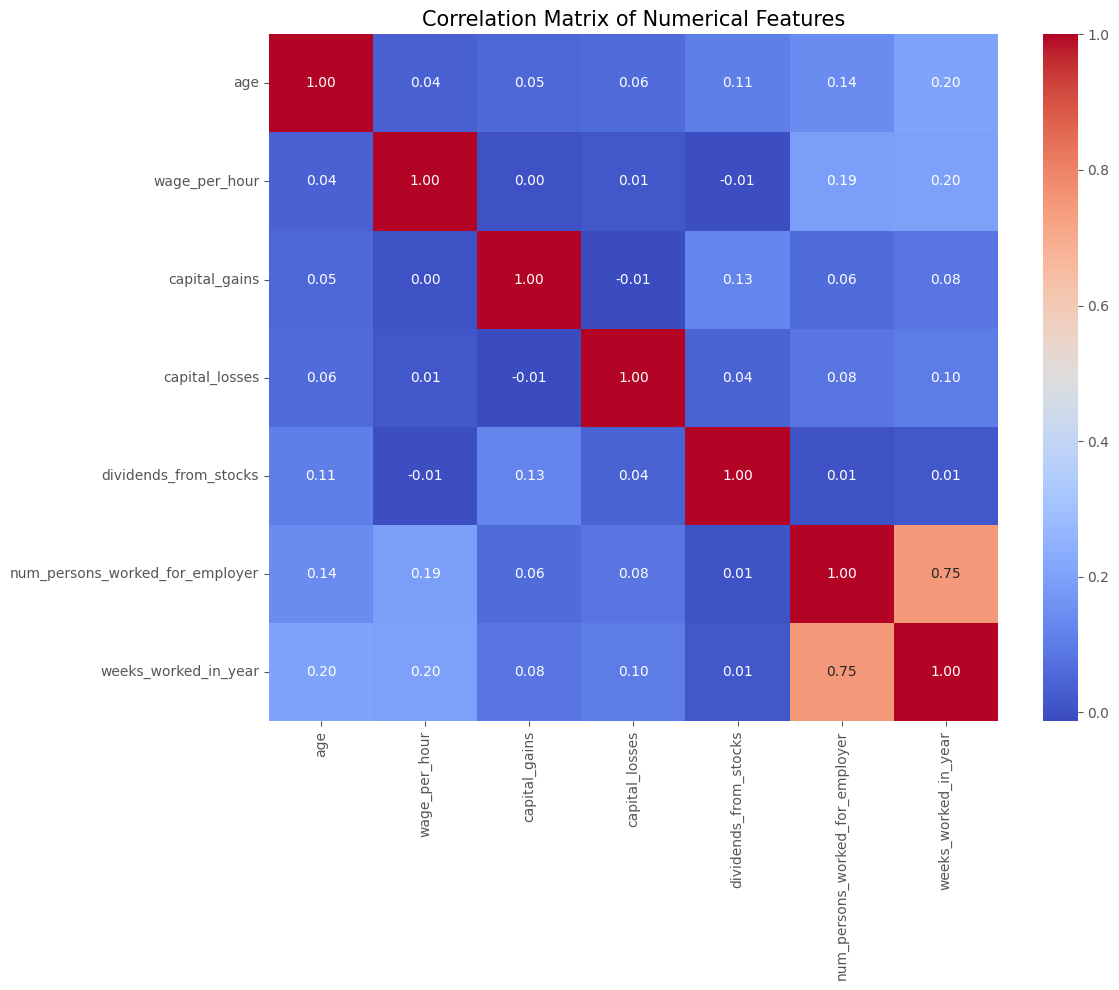

In [80]:
# Identify numerical columns based on metadata (7 continuous variables)
numerical_columns = ['age', 'wage_per_hour', 'capital_gains', 'capital_losses', 
                     'dividends_from_stocks', 'num_persons_worked_for_employer', 'weeks_worked_in_year']

# Create histograms for numerical features
plt.figure(figsize=(20, 15))

for i, col in enumerate(numerical_columns):
    plt.subplot(3, 3, i+1)
    sns.histplot(combined_data[col], kde=True)
    plt.title(f'Distribution of {col}')
    plt.tight_layout()

plt.show()

# Box plots for numerical features by income
plt.figure(figsize=(20, 15))

for i, col in enumerate(numerical_columns):
    plt.subplot(3, 3, i+1)
    sns.boxplot(x='income', y=col, data=combined_data)
    plt.title(f'{col} by Income Level')
    plt.tight_layout()

plt.show()

# Correlation matrix for numerical features
plt.figure(figsize=(12, 10))
correlation_matrix = combined_data[numerical_columns].corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Matrix of Numerical Features', fontsize=15)
plt.tight_layout()
plt.show()

### 3.3 Categorical Features Analysis

Now let's examine some key categorical features and their relationships with income.

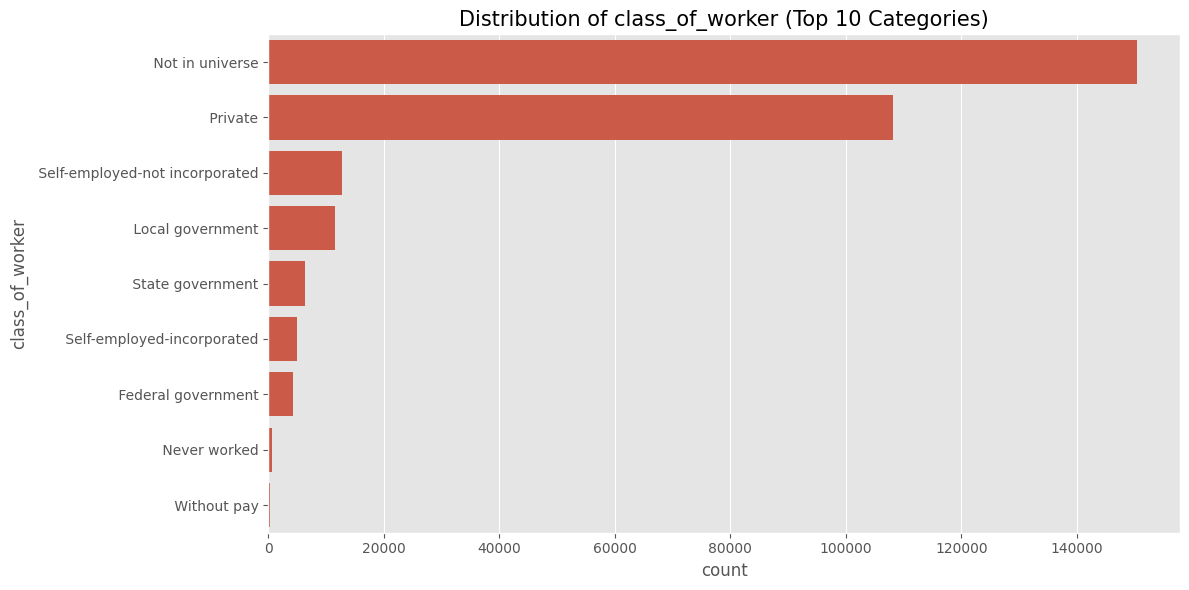

<Figure size 1400x800 with 0 Axes>

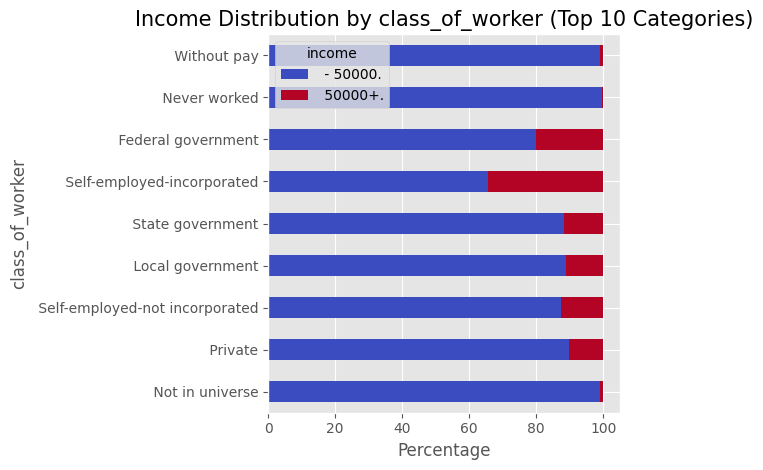

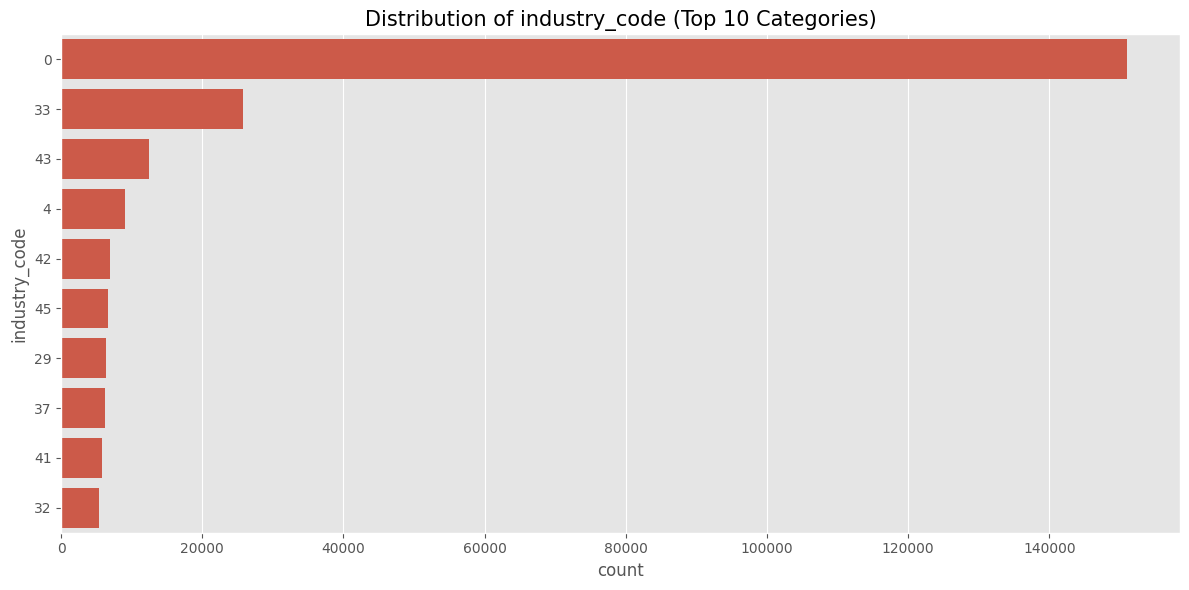

<Figure size 1400x800 with 0 Axes>

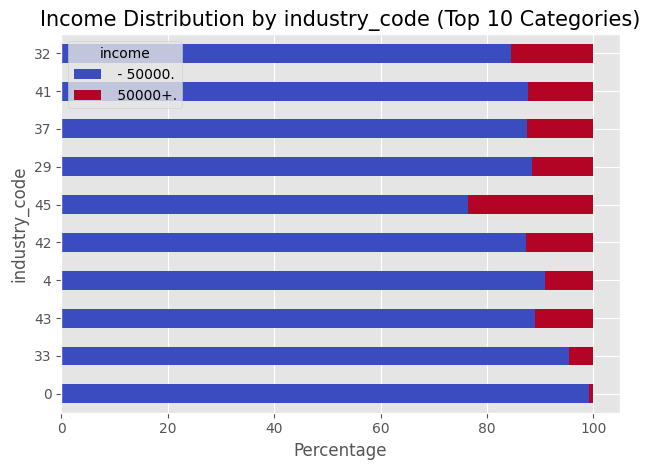

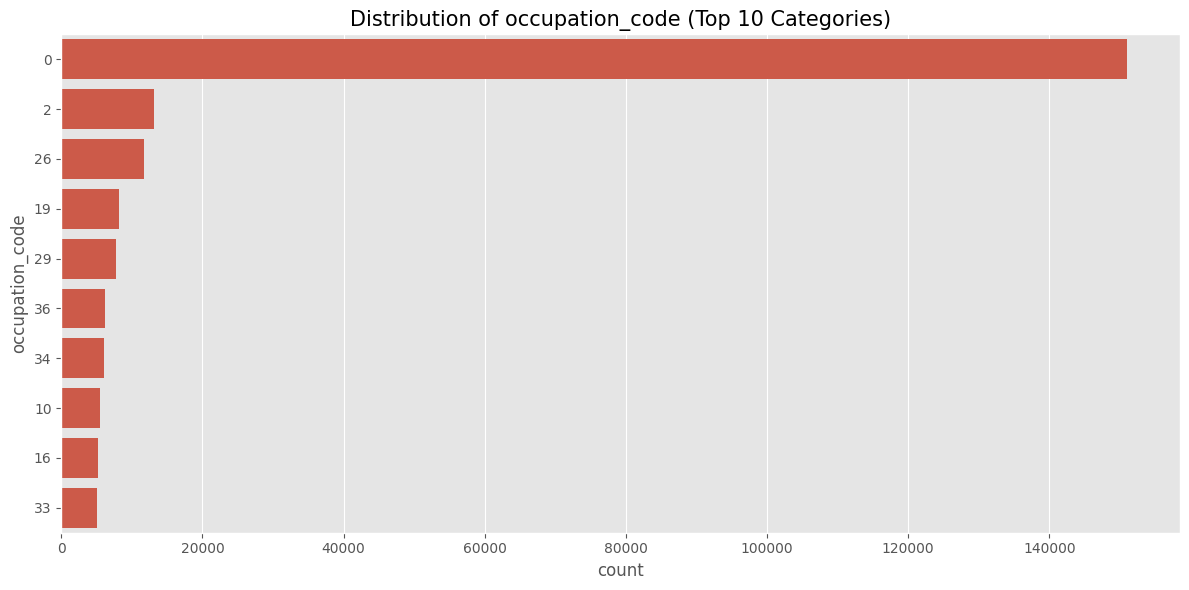

<Figure size 1400x800 with 0 Axes>

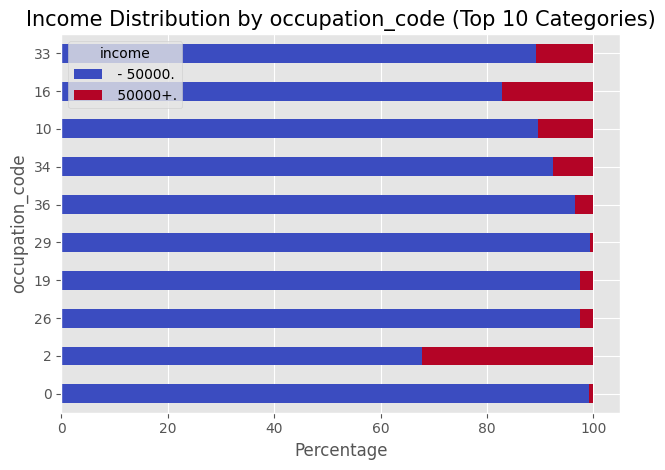

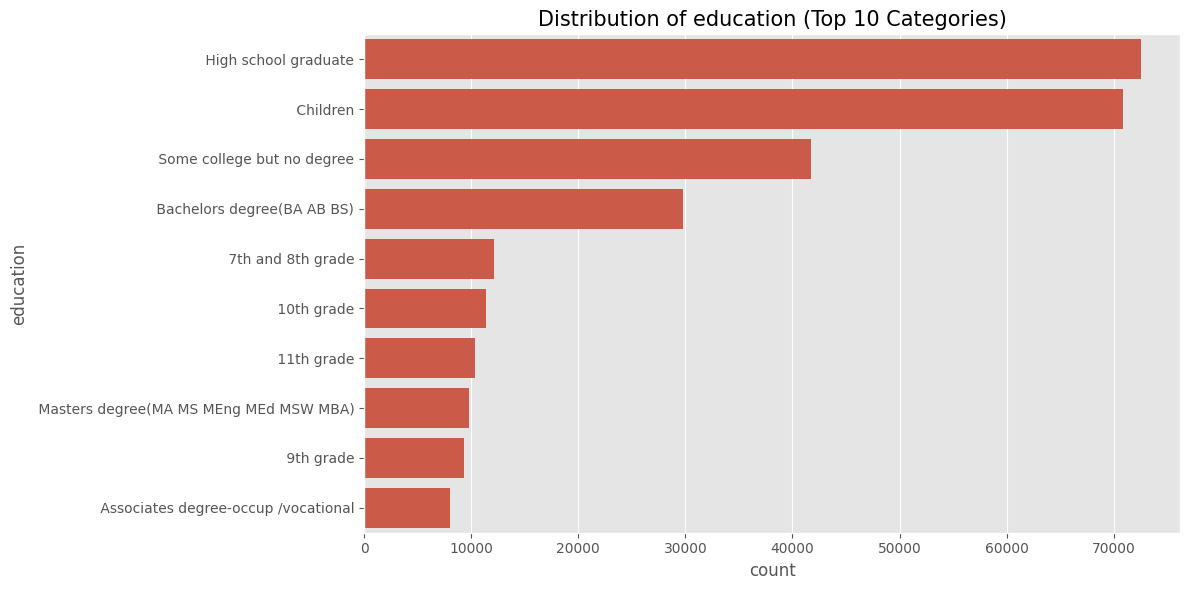

<Figure size 1400x800 with 0 Axes>

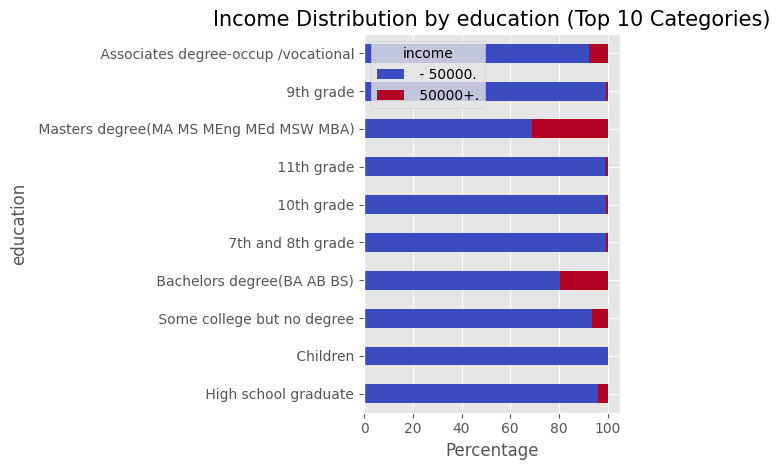

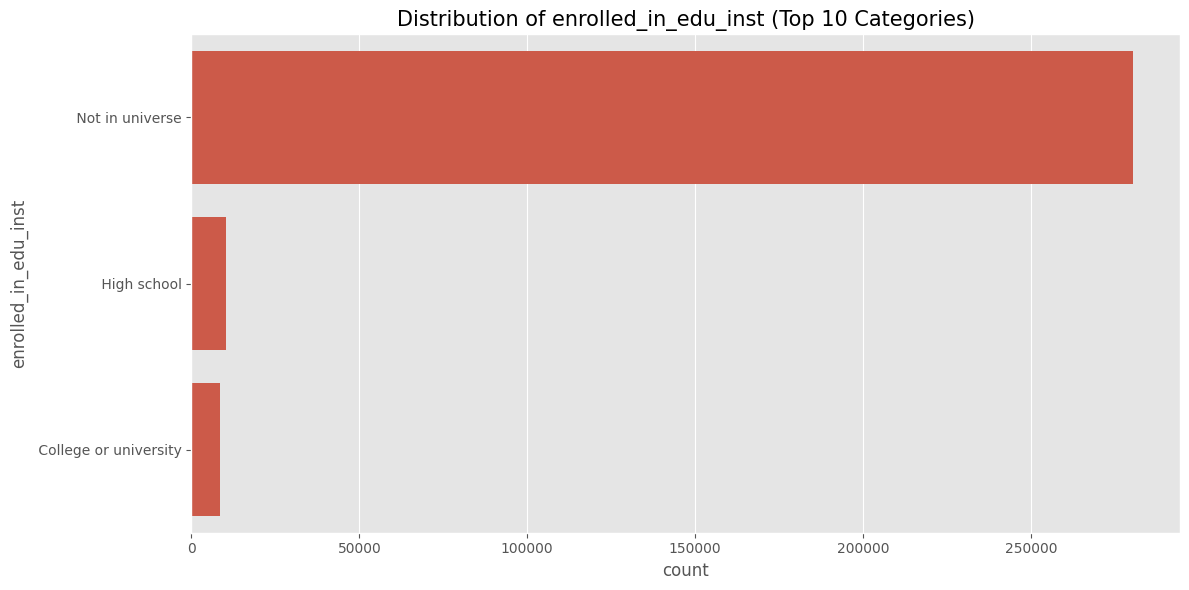

<Figure size 1400x800 with 0 Axes>

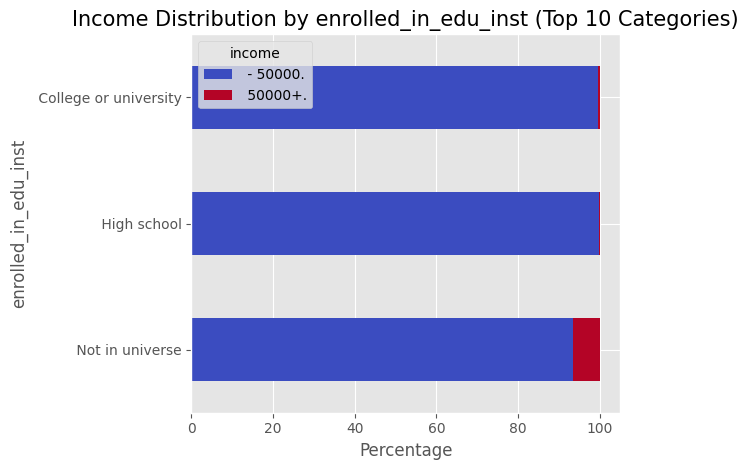

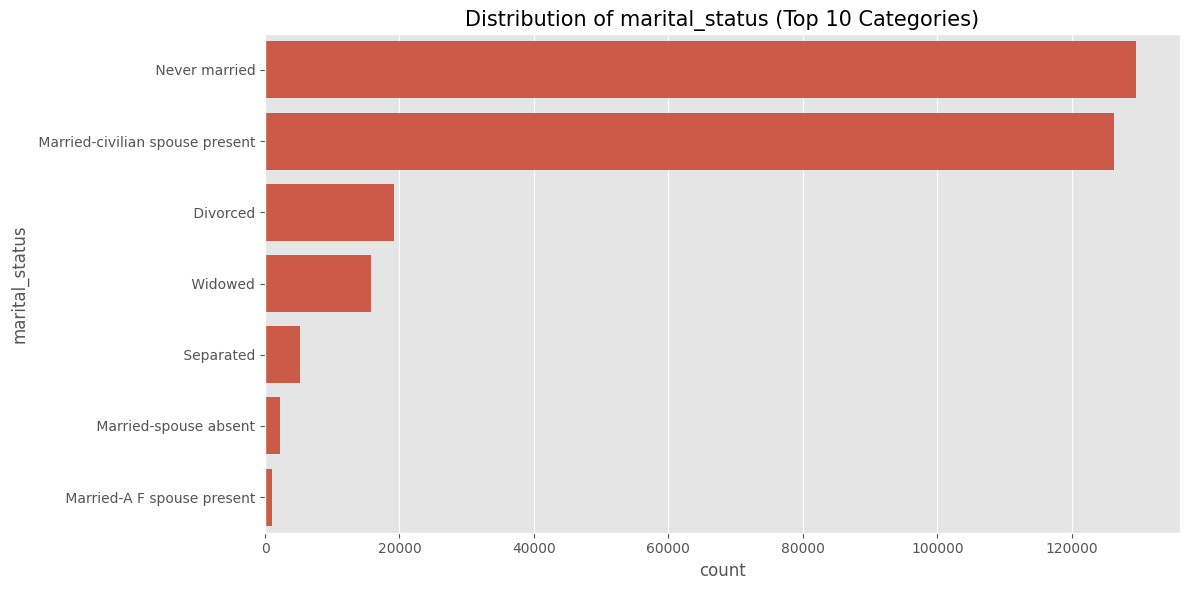

<Figure size 1400x800 with 0 Axes>

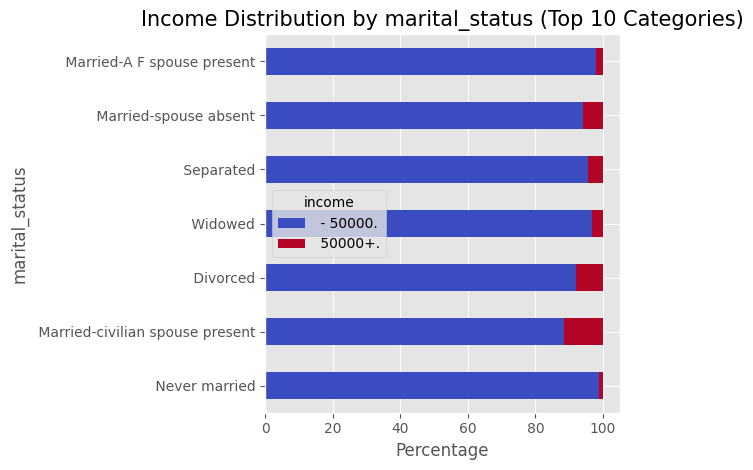

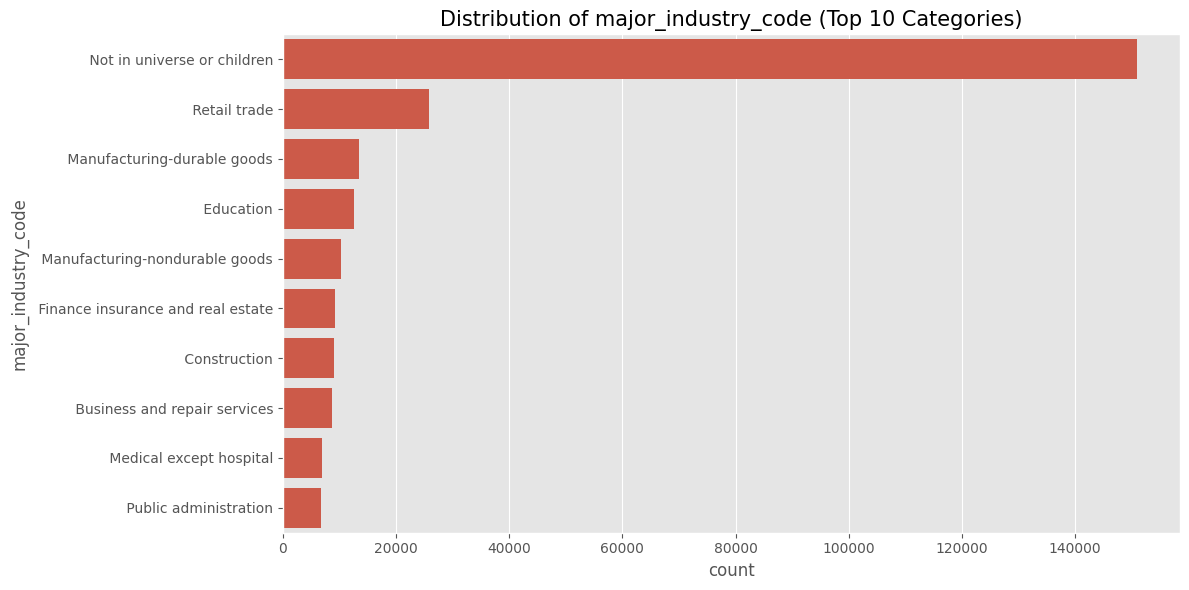

<Figure size 1400x800 with 0 Axes>

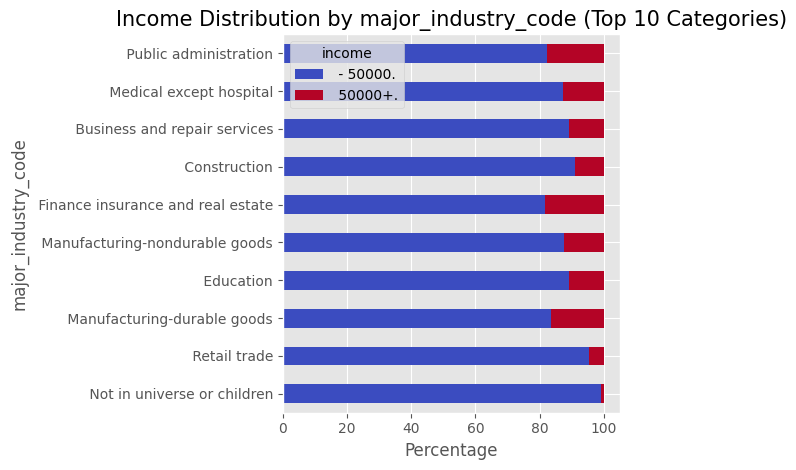

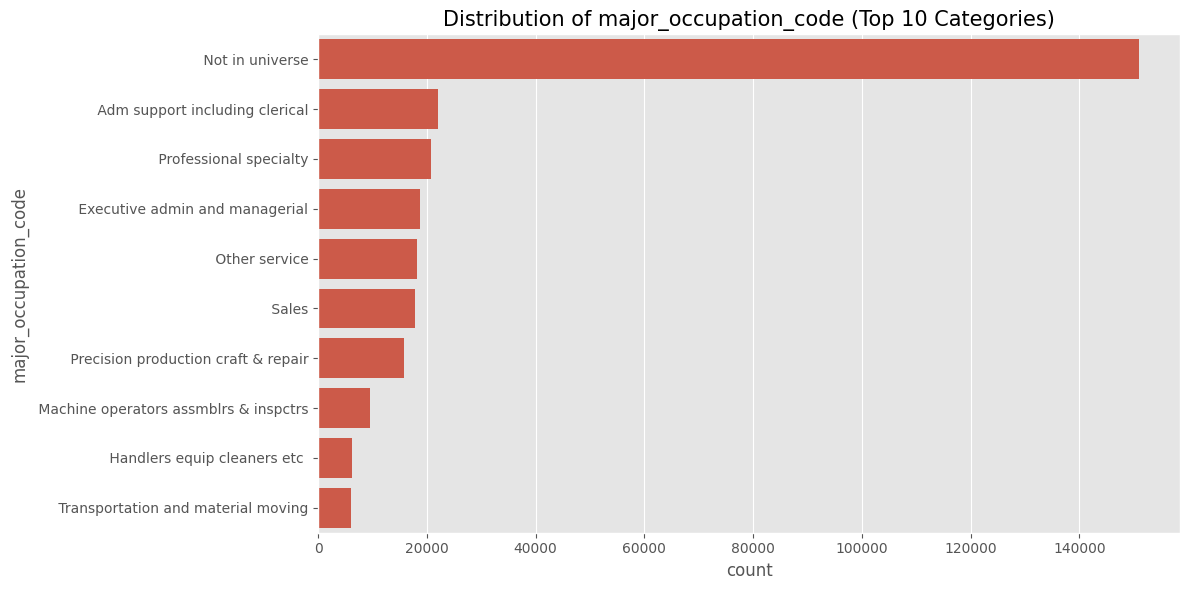

<Figure size 1400x800 with 0 Axes>

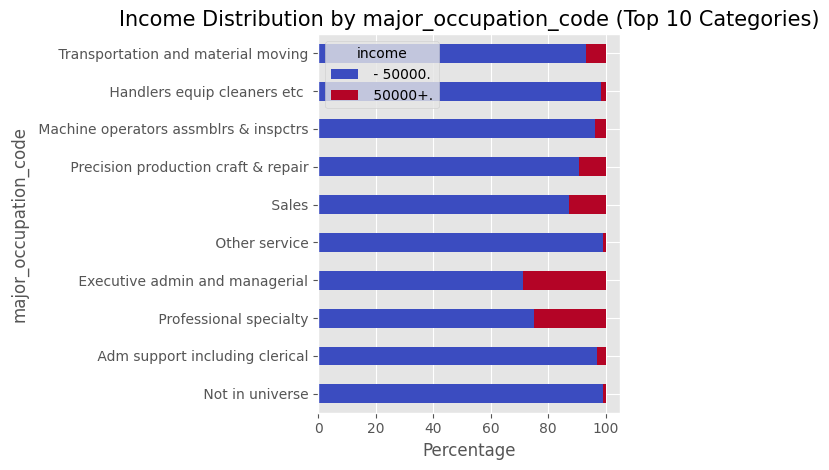

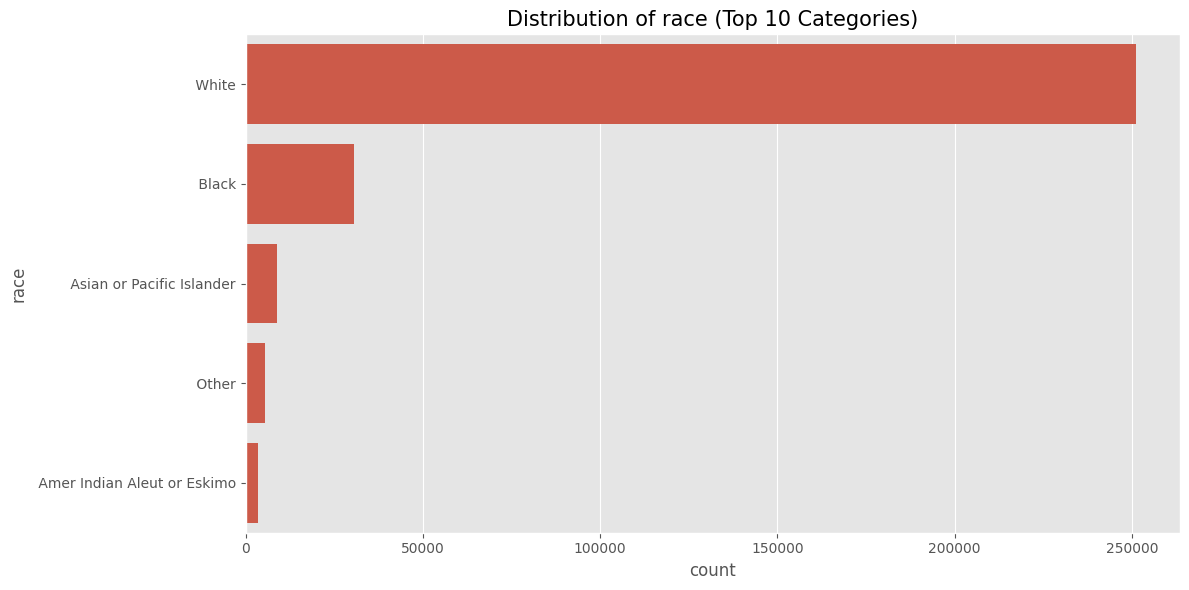

<Figure size 1400x800 with 0 Axes>

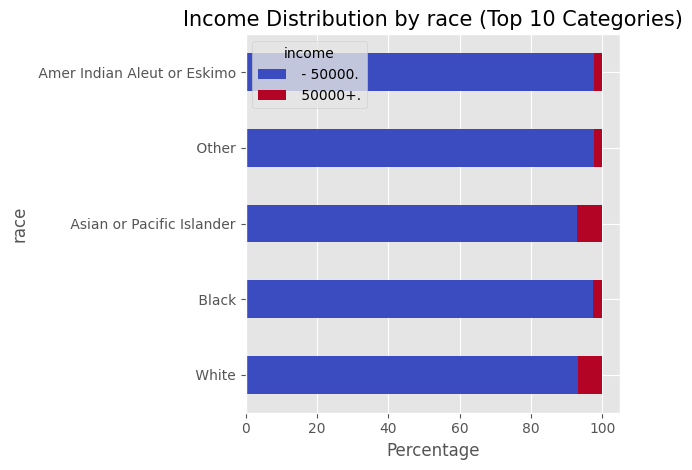

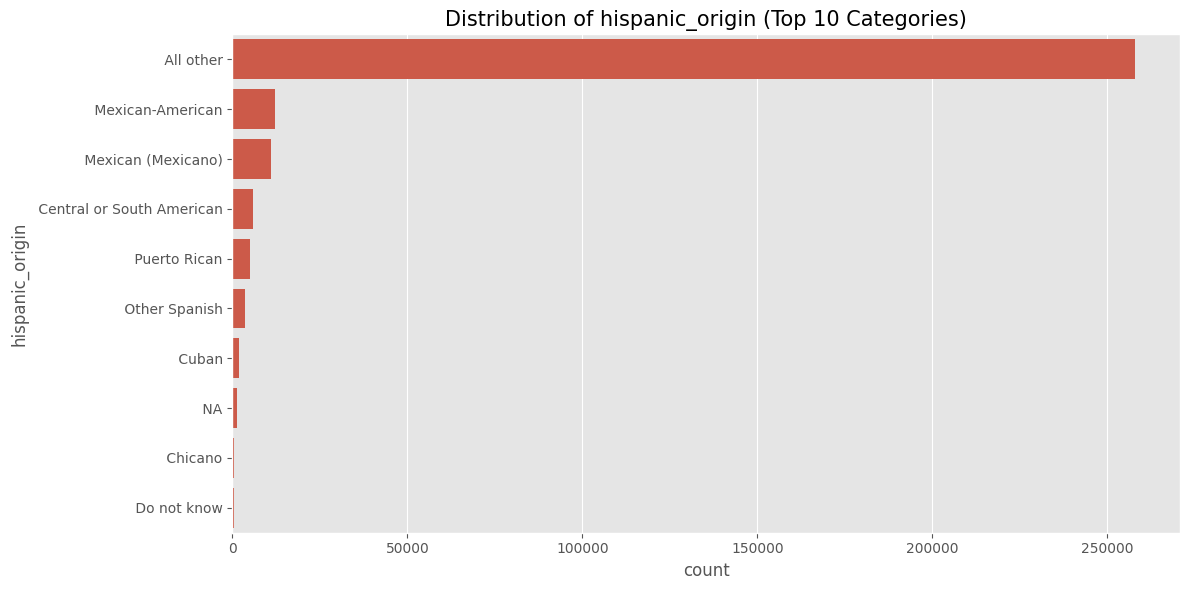

<Figure size 1400x800 with 0 Axes>

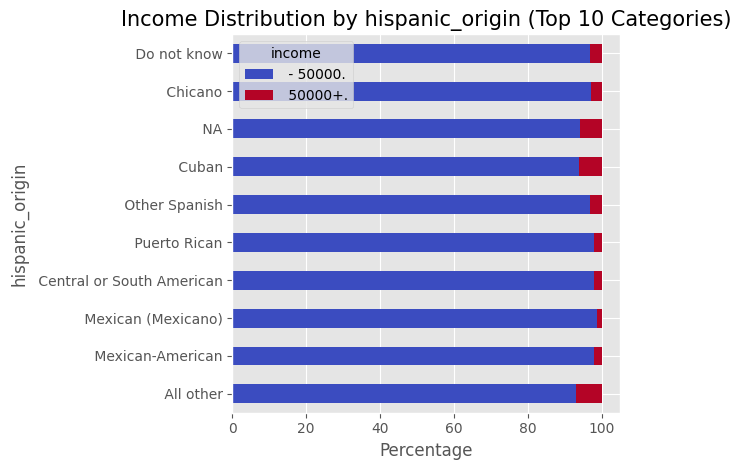

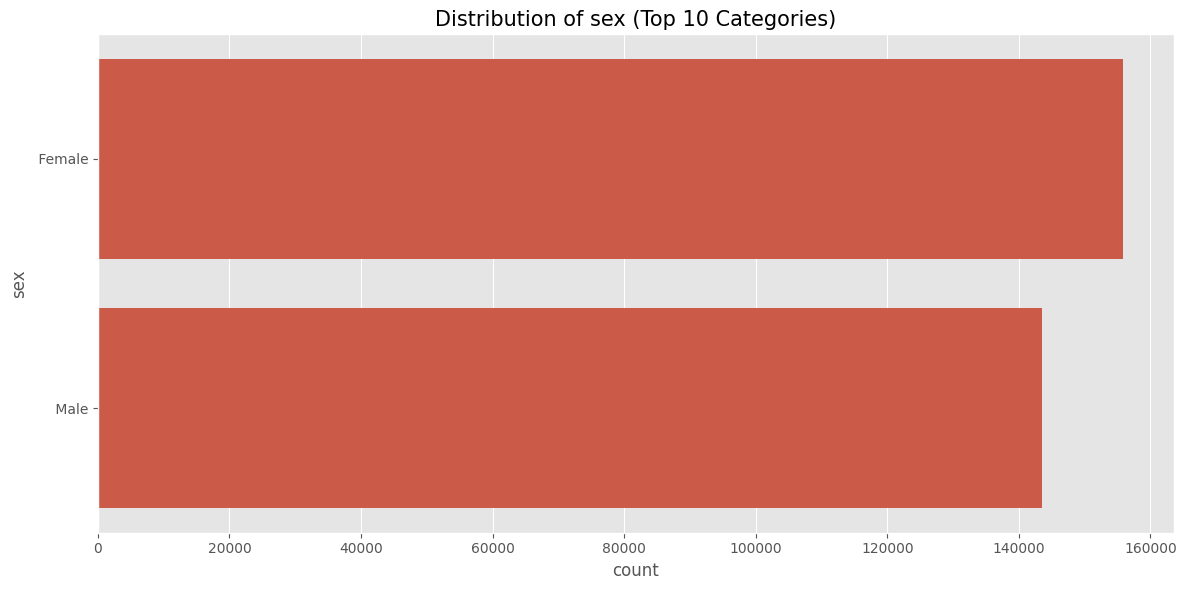

<Figure size 1400x800 with 0 Axes>

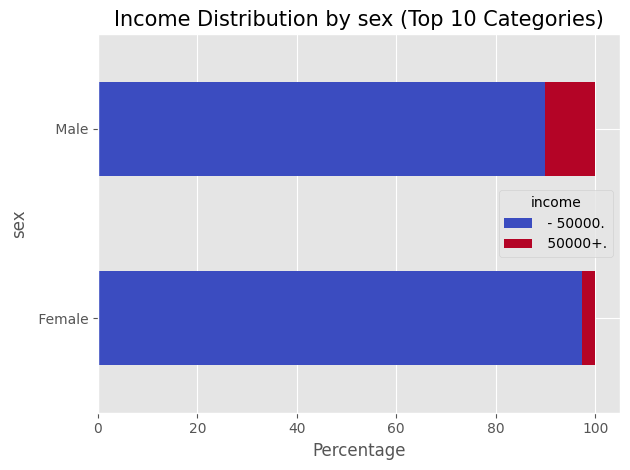

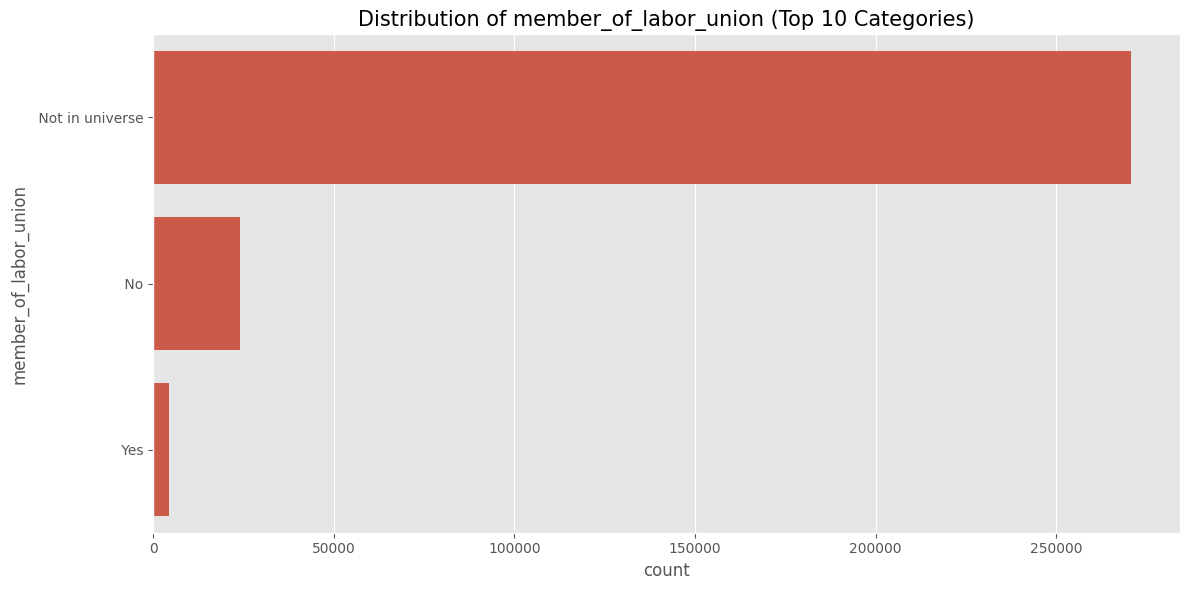

<Figure size 1400x800 with 0 Axes>

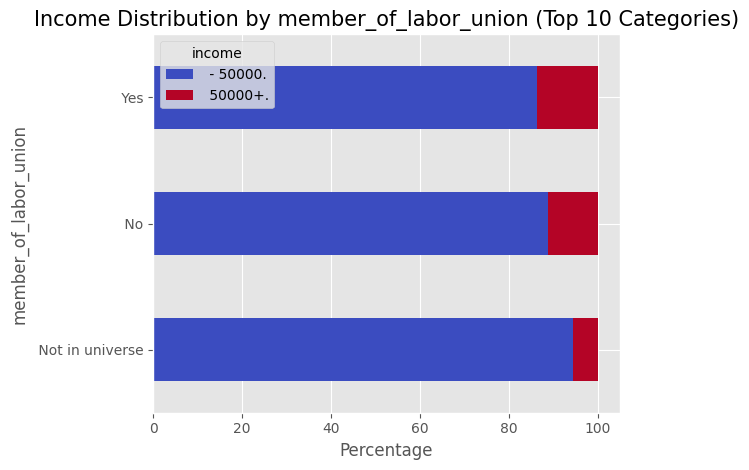

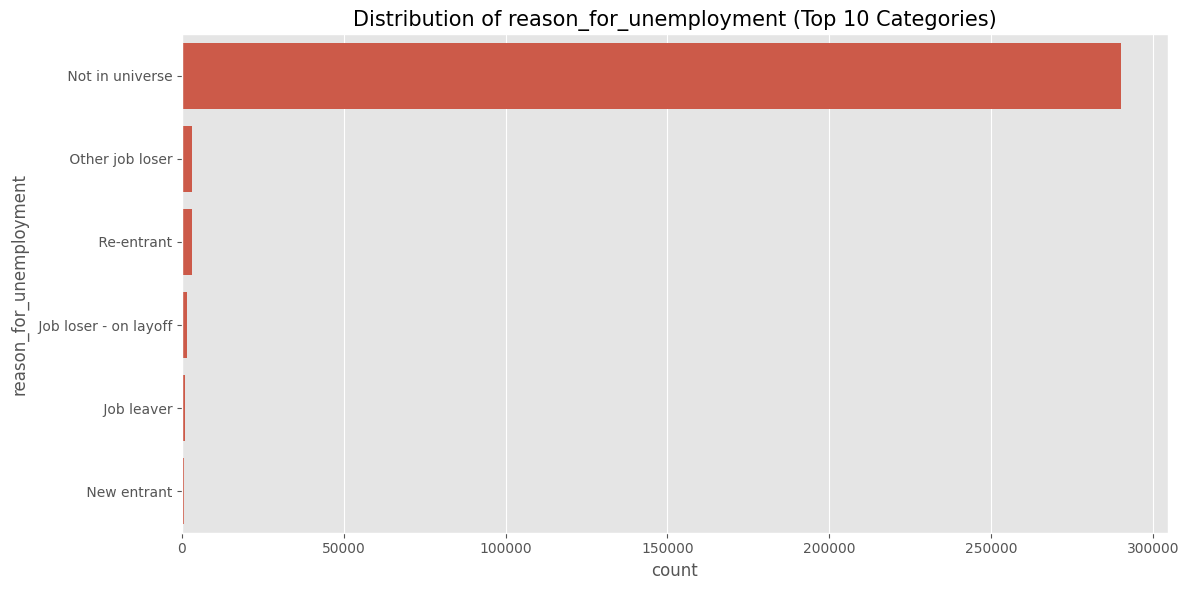

<Figure size 1400x800 with 0 Axes>

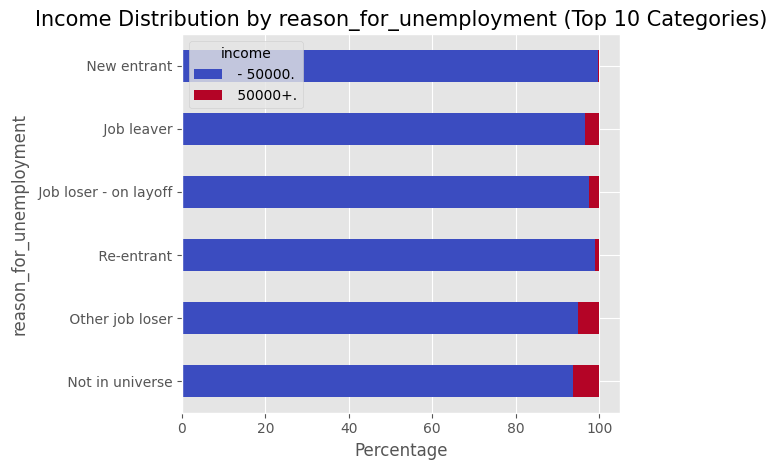

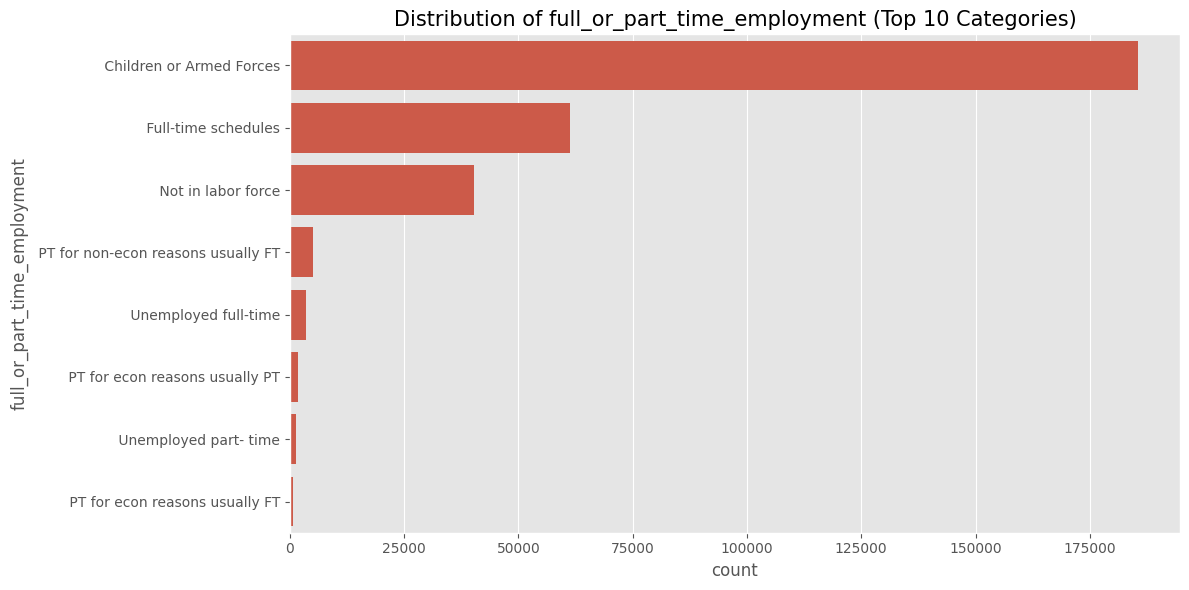

<Figure size 1400x800 with 0 Axes>

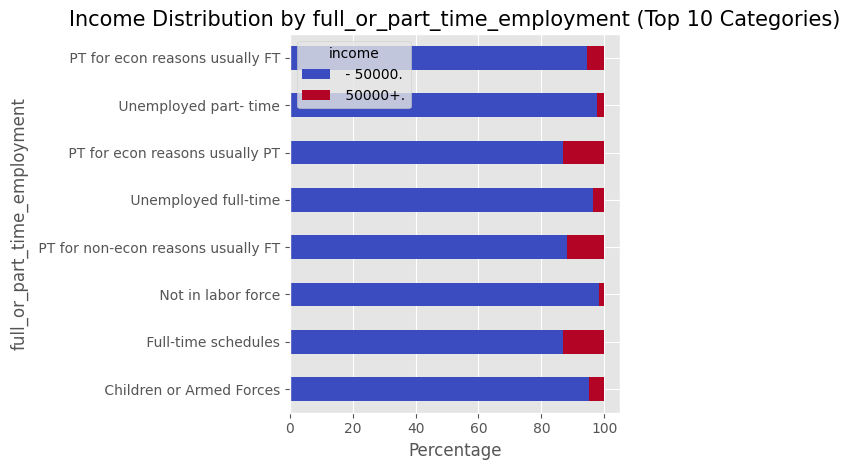

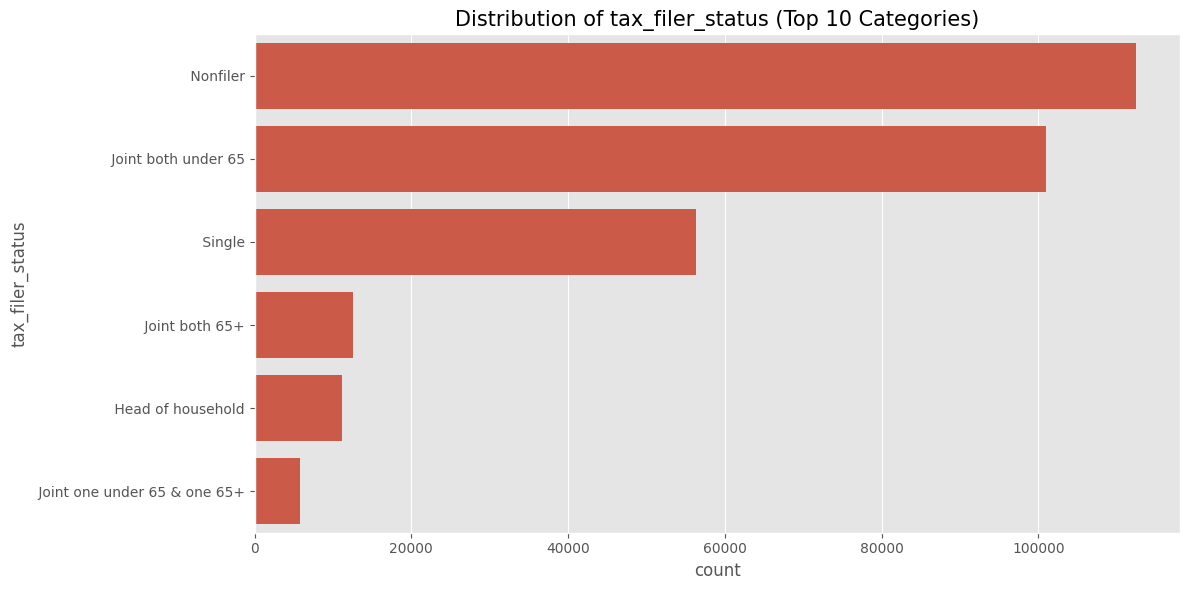

<Figure size 1400x800 with 0 Axes>

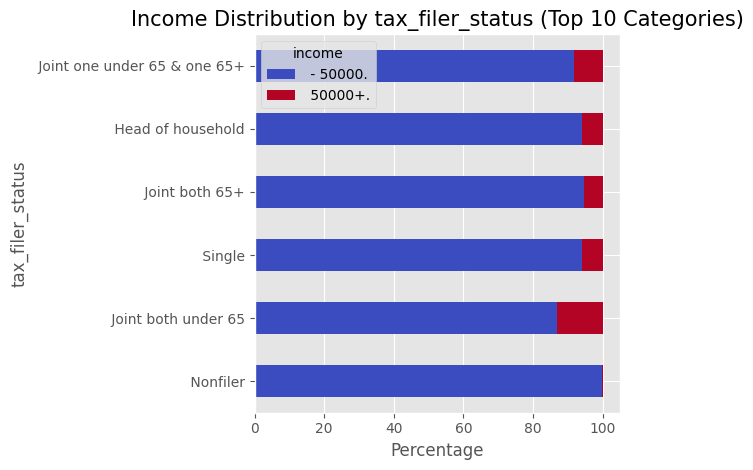

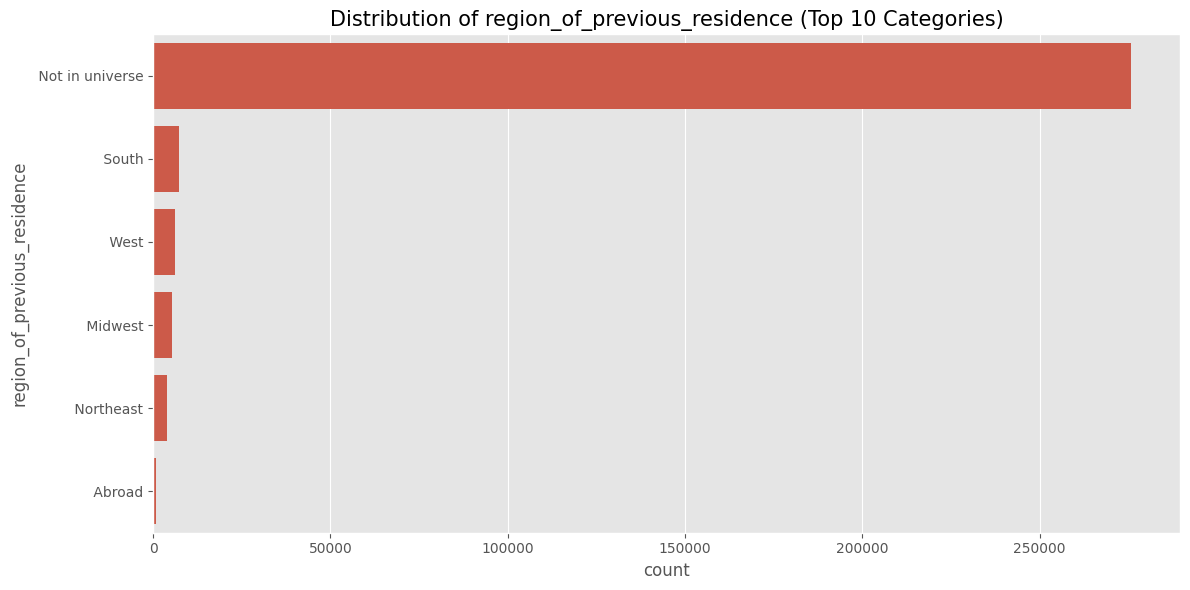

<Figure size 1400x800 with 0 Axes>

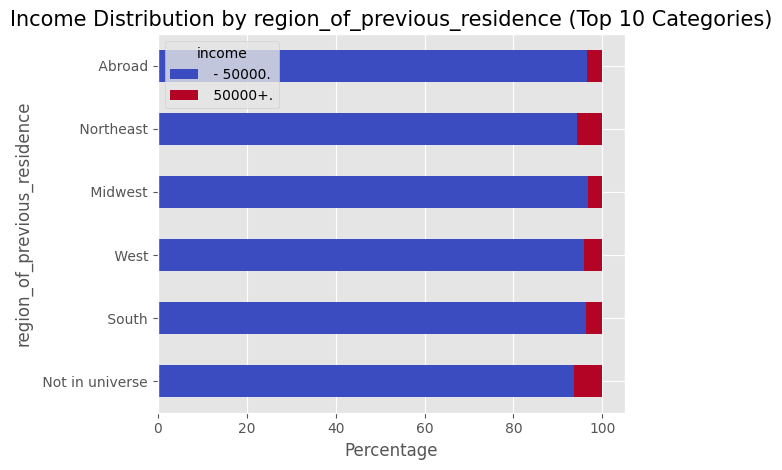

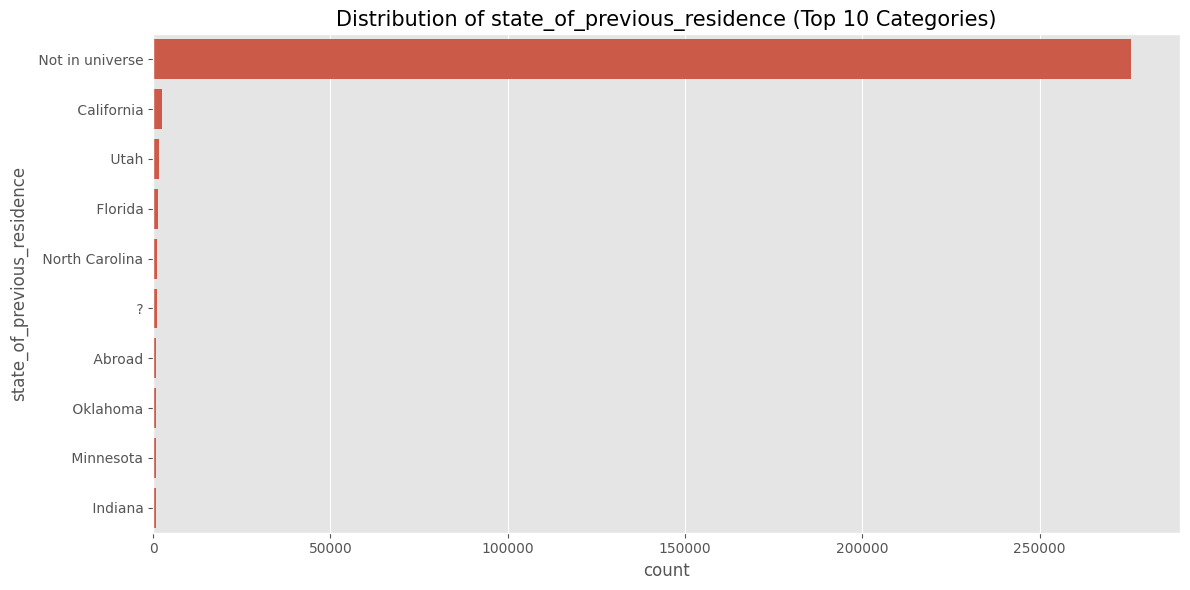

<Figure size 1400x800 with 0 Axes>

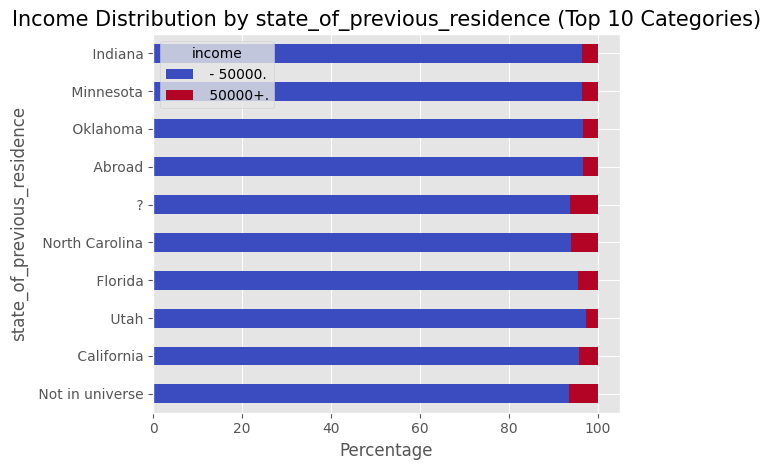

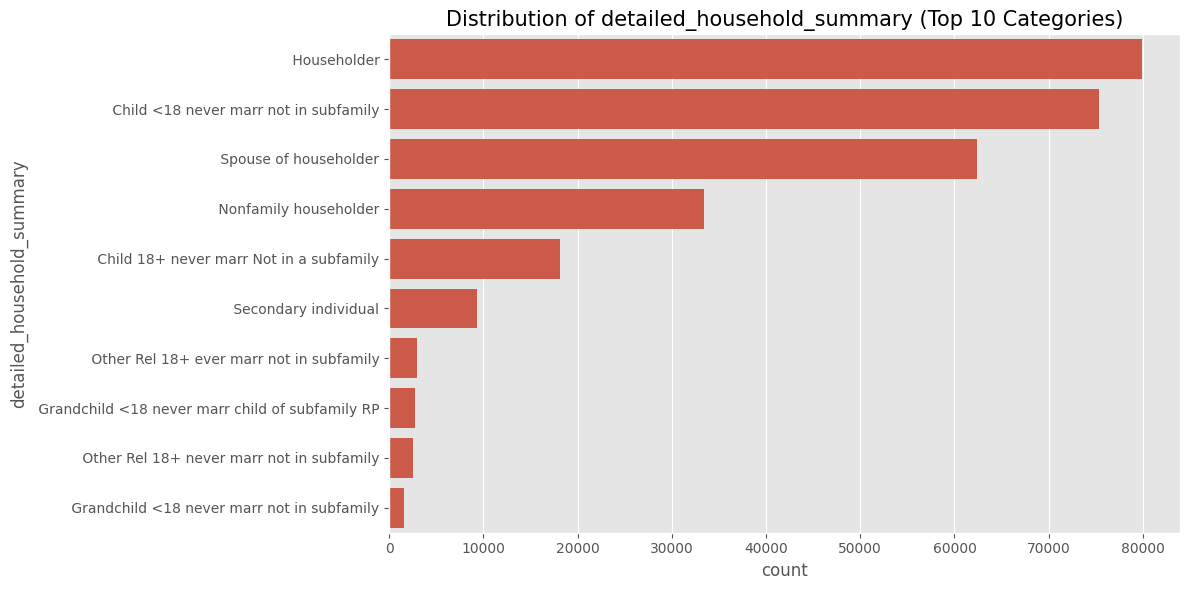

<Figure size 1400x800 with 0 Axes>

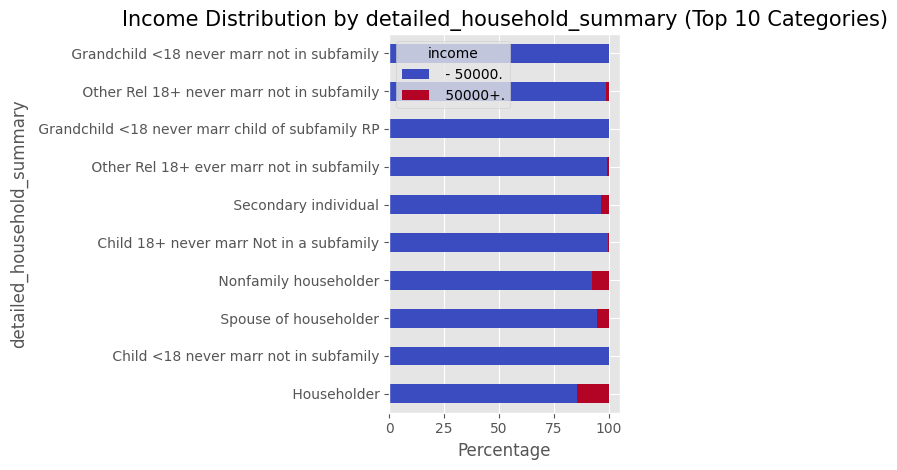

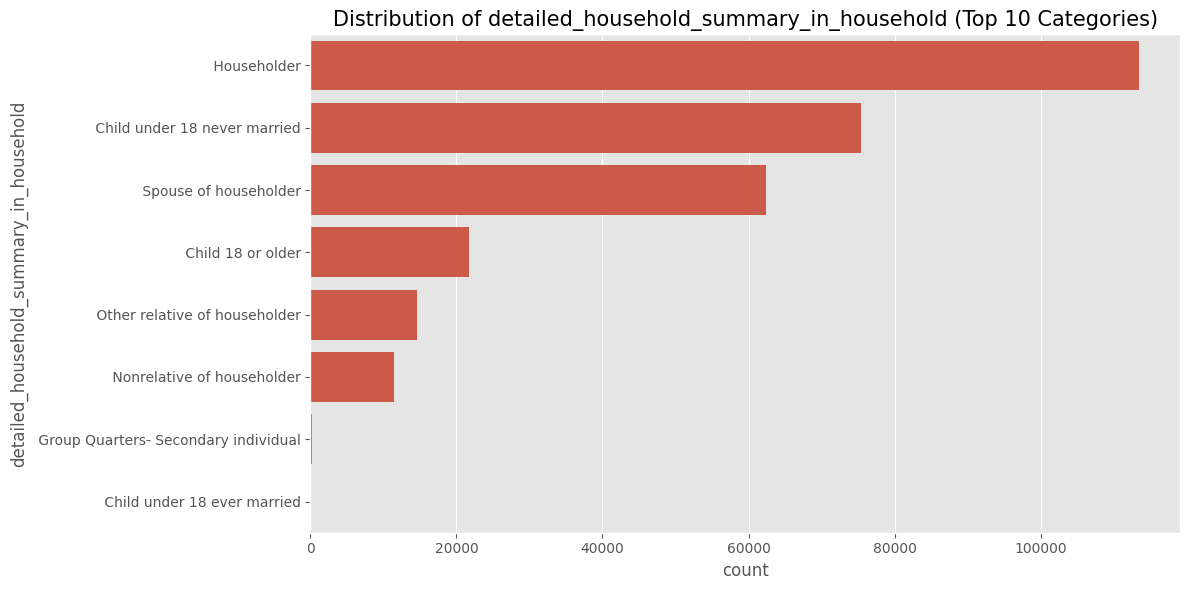

<Figure size 1400x800 with 0 Axes>

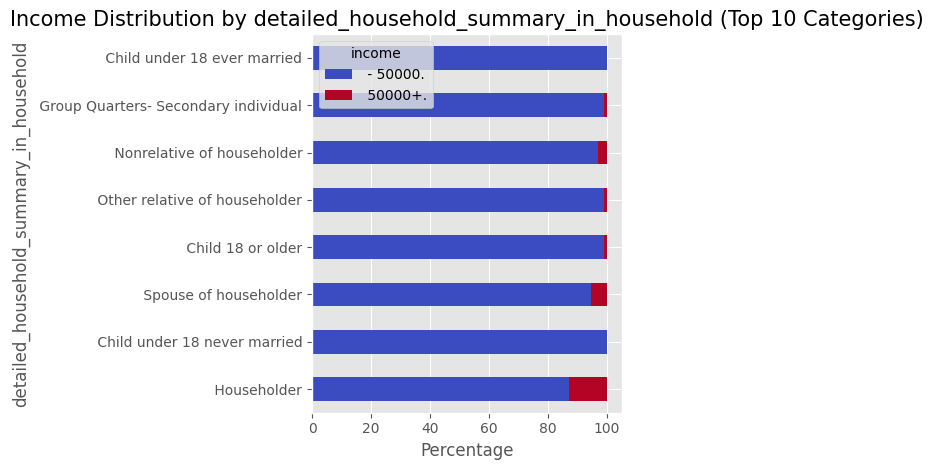

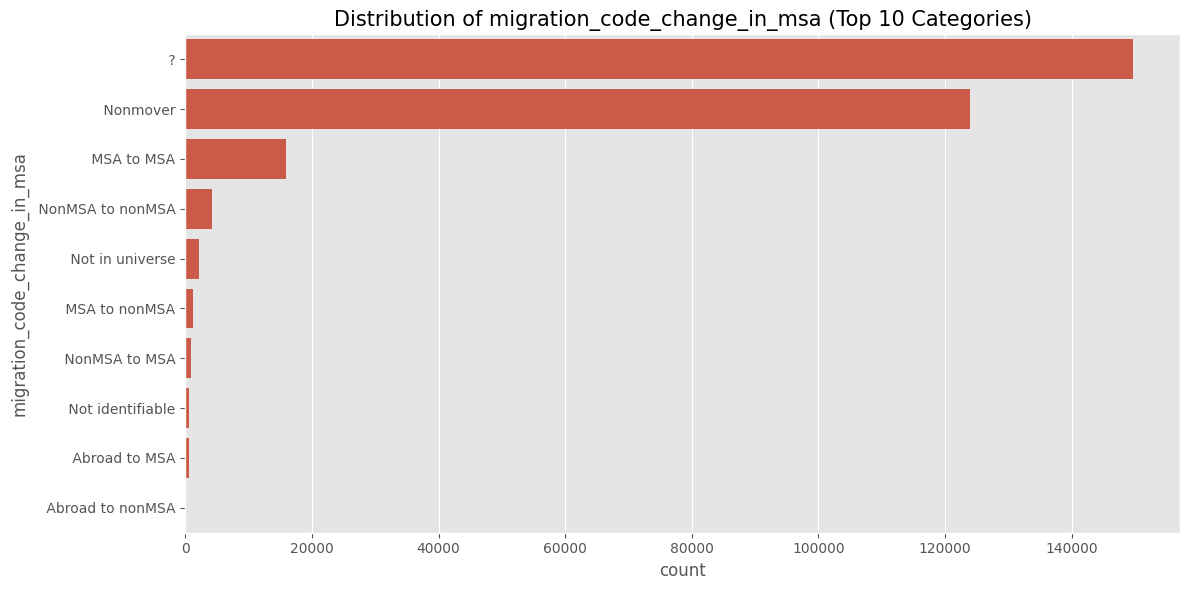

<Figure size 1400x800 with 0 Axes>

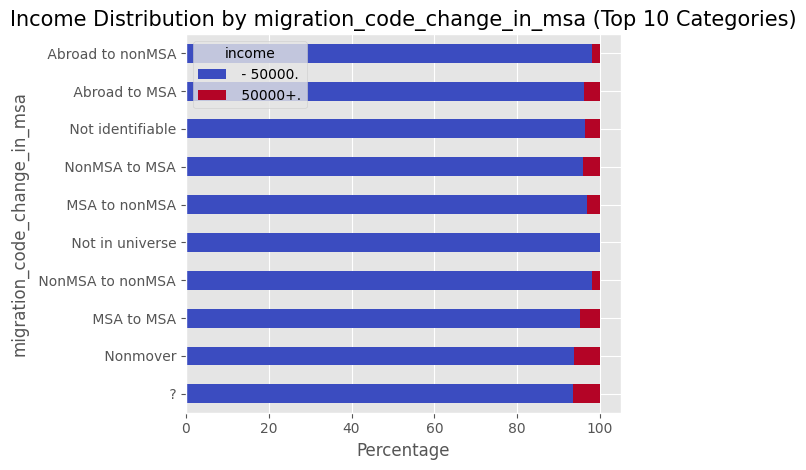

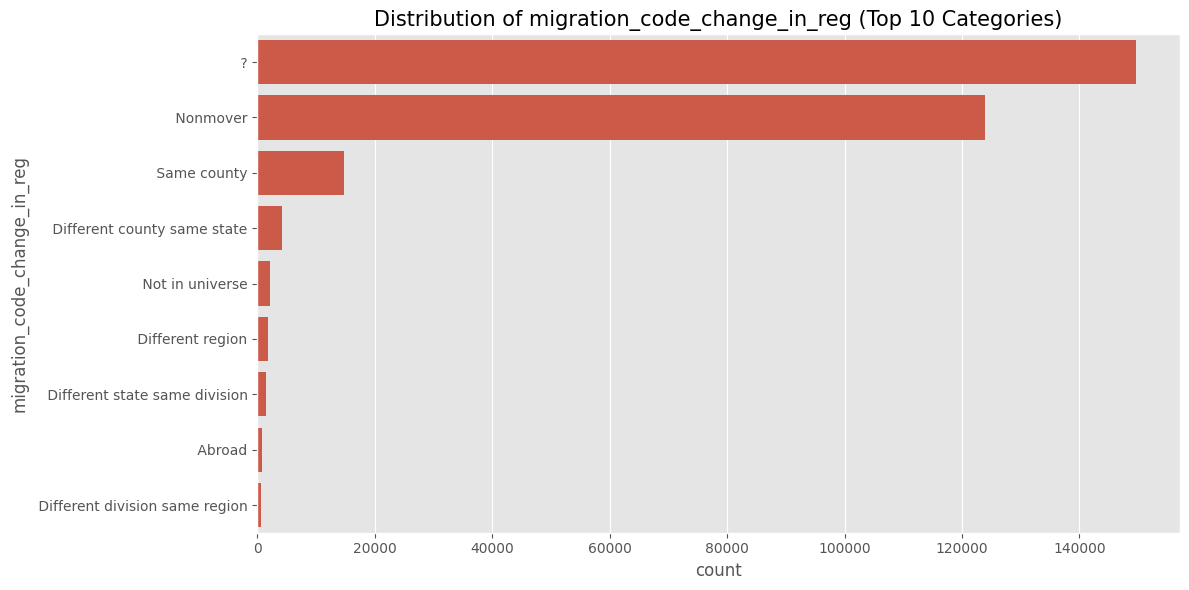

<Figure size 1400x800 with 0 Axes>

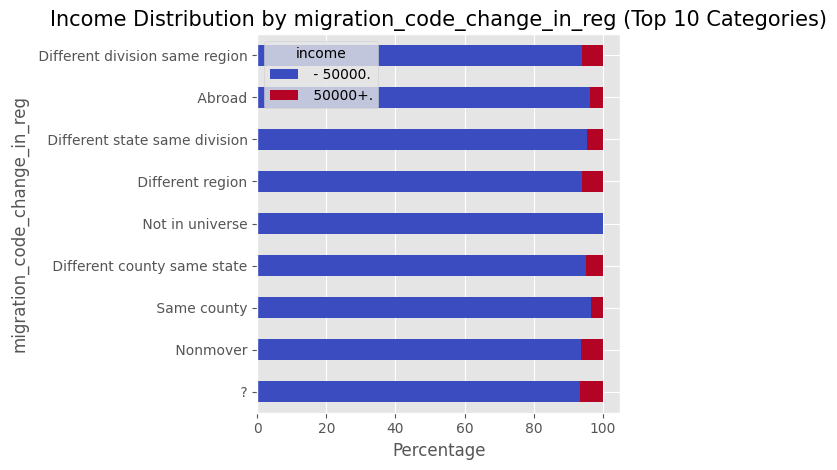

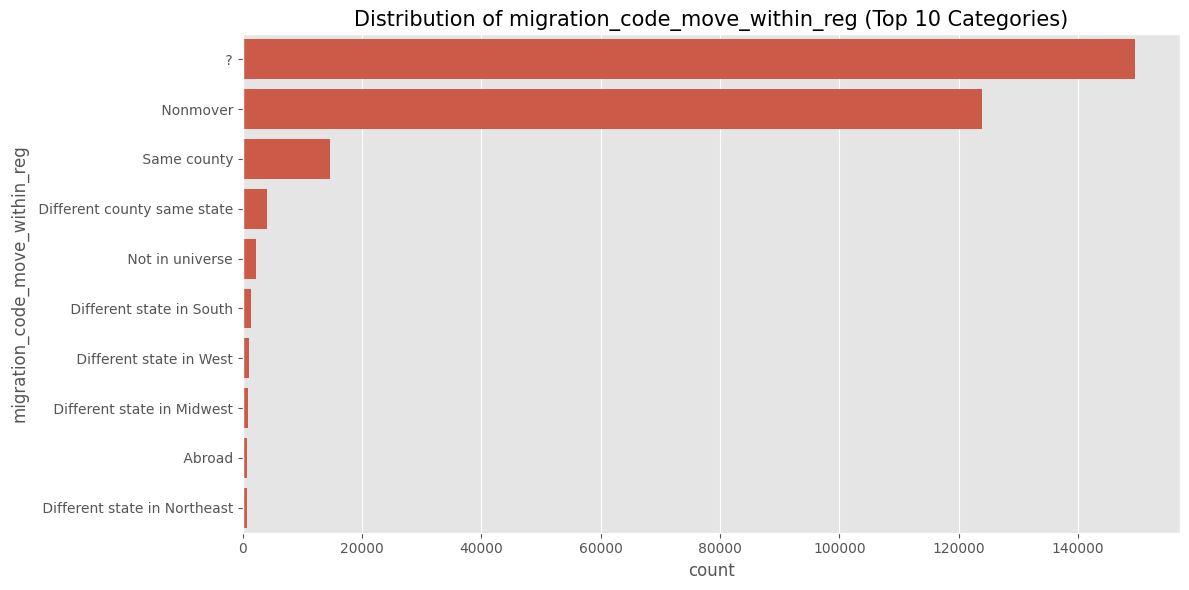

<Figure size 1400x800 with 0 Axes>

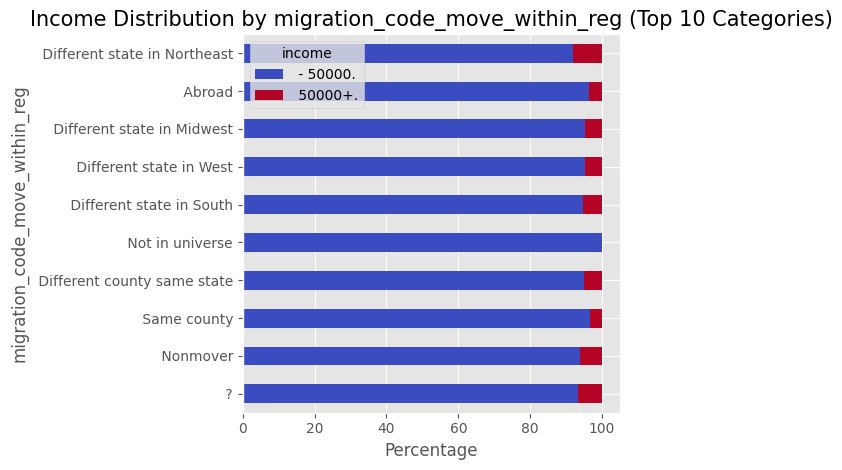

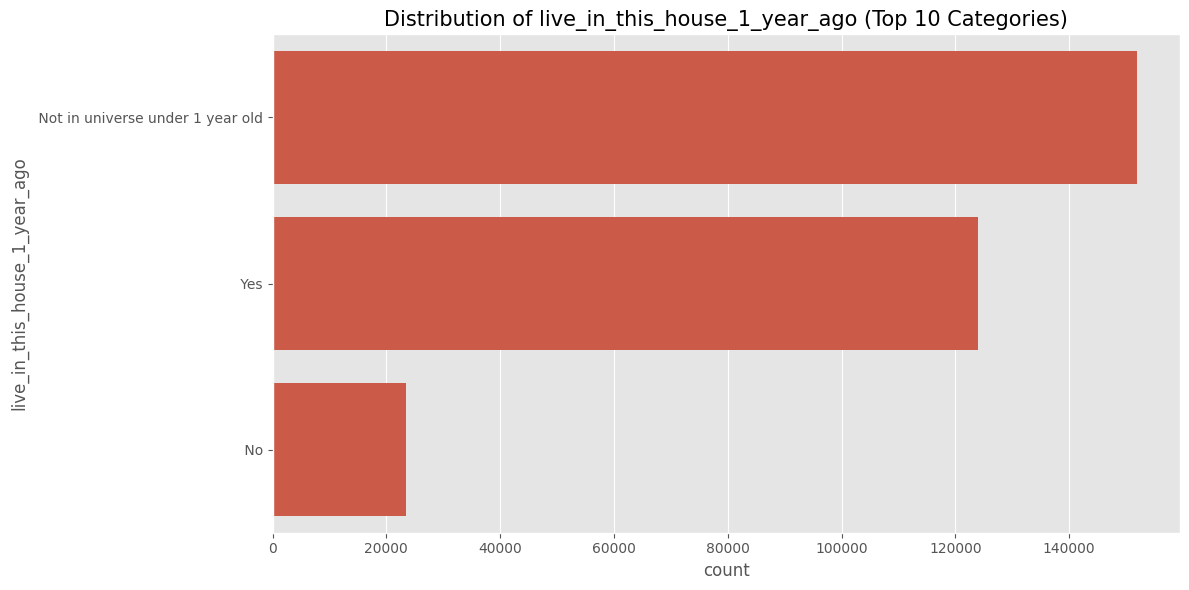

<Figure size 1400x800 with 0 Axes>

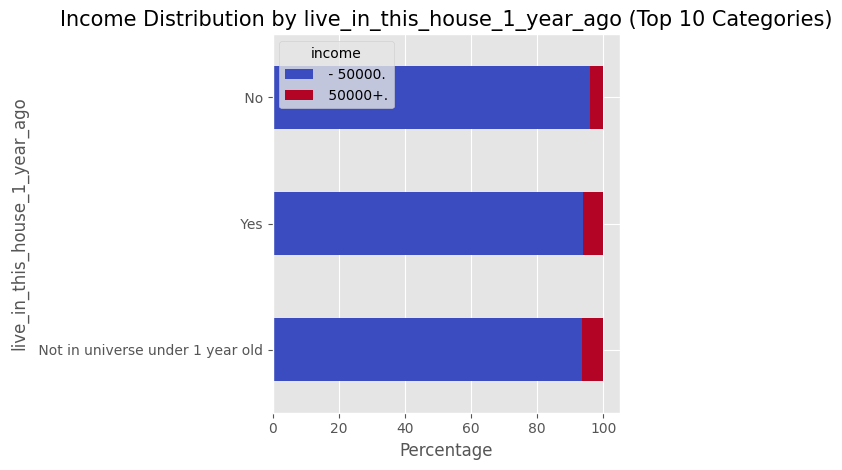

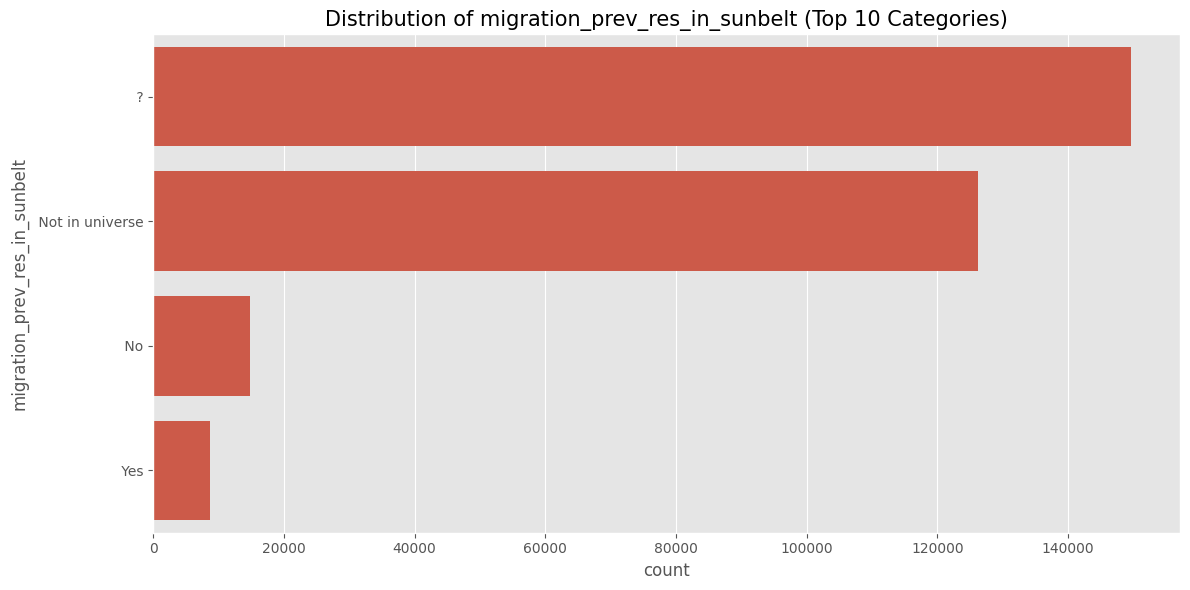

<Figure size 1400x800 with 0 Axes>

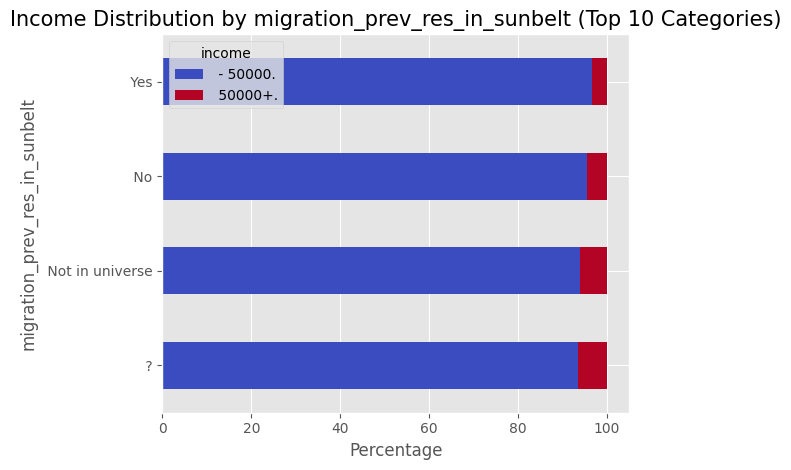

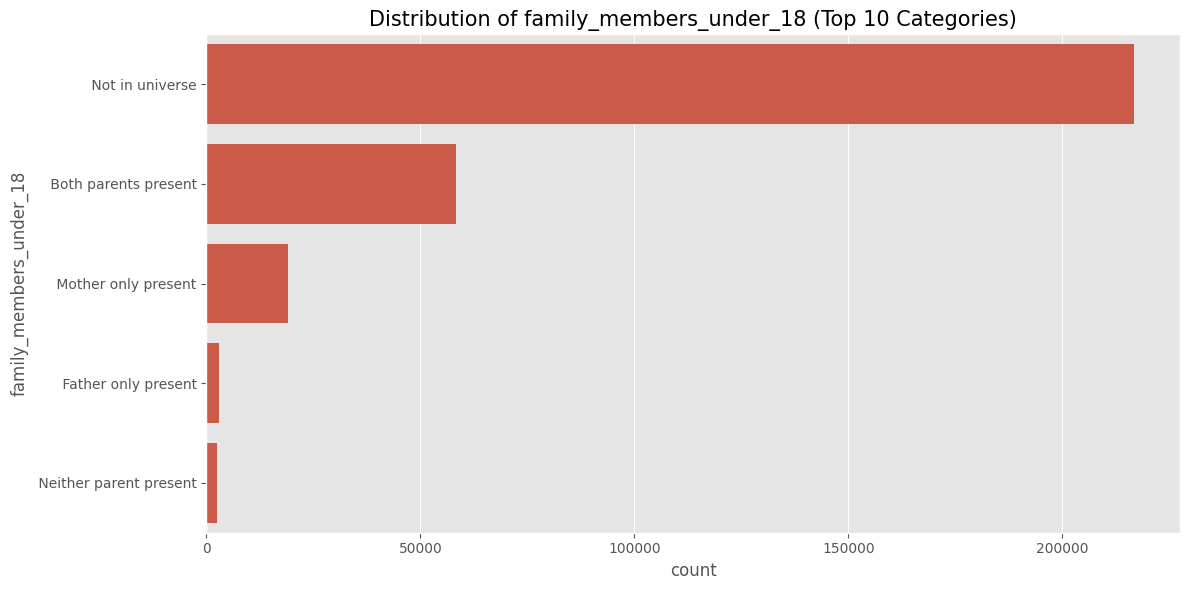

<Figure size 1400x800 with 0 Axes>

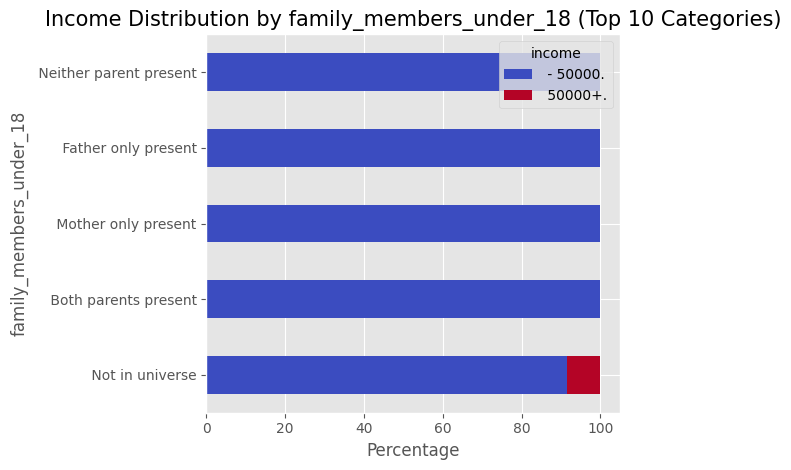

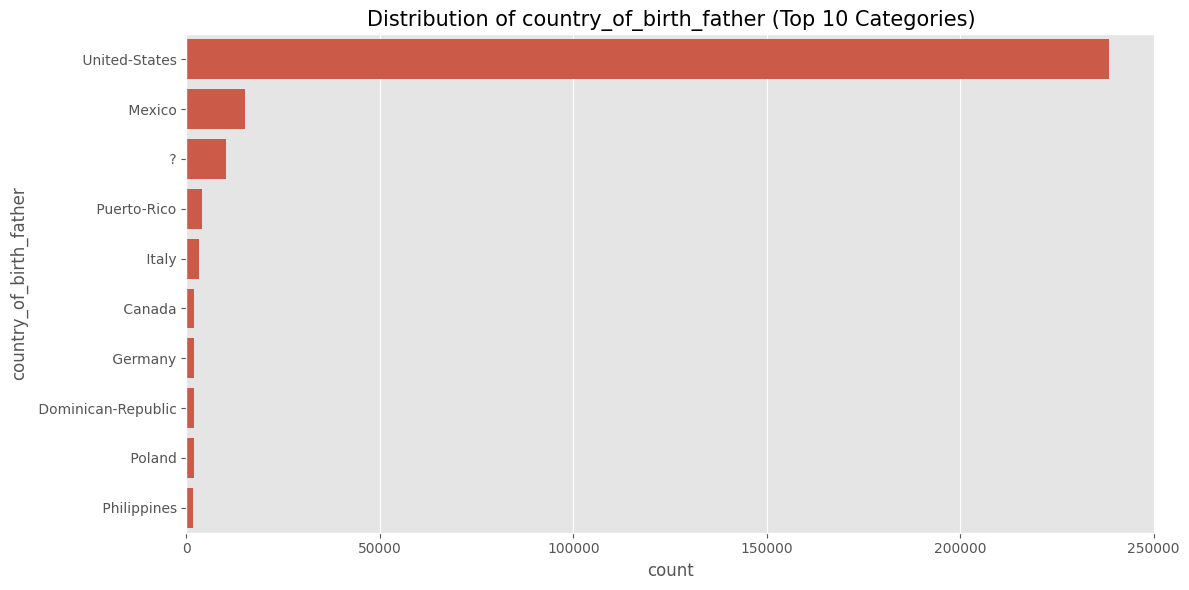

<Figure size 1400x800 with 0 Axes>

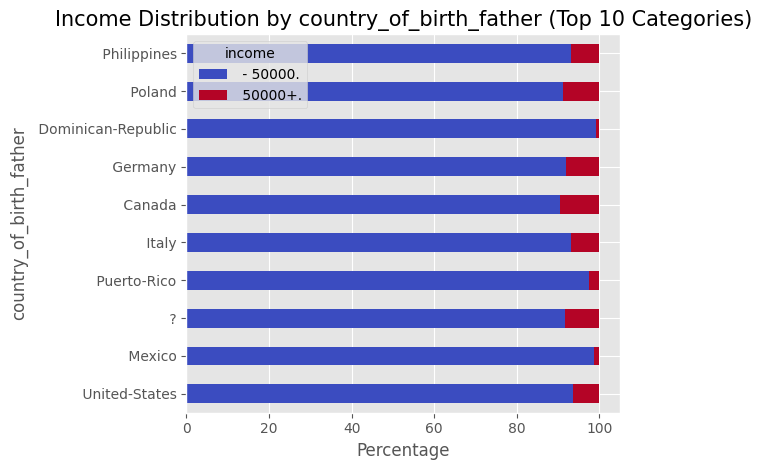

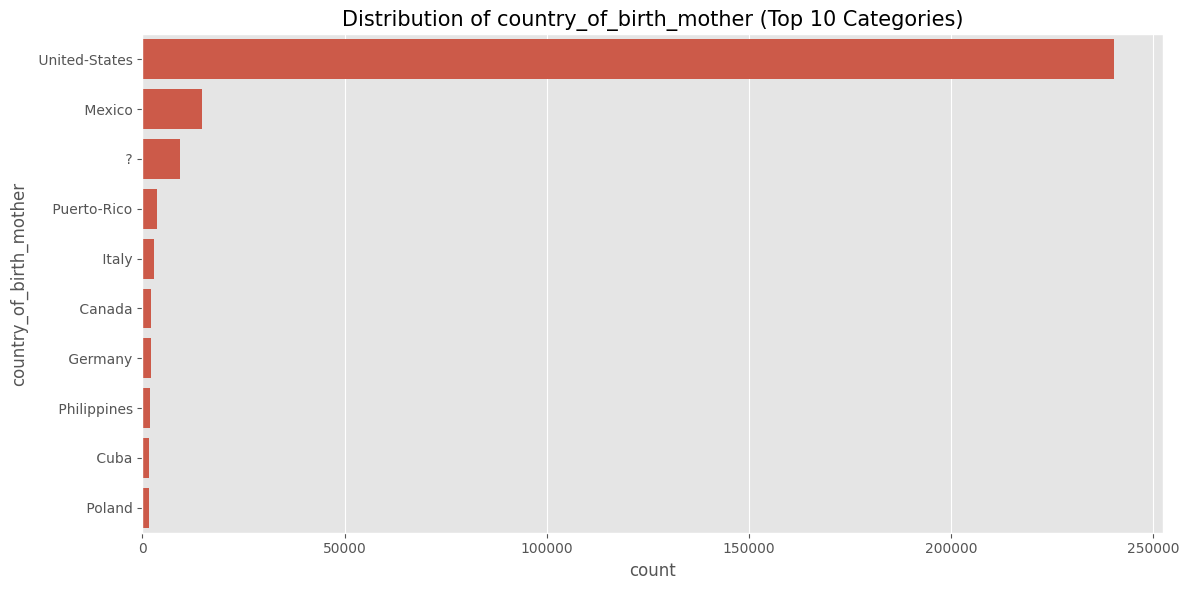

<Figure size 1400x800 with 0 Axes>

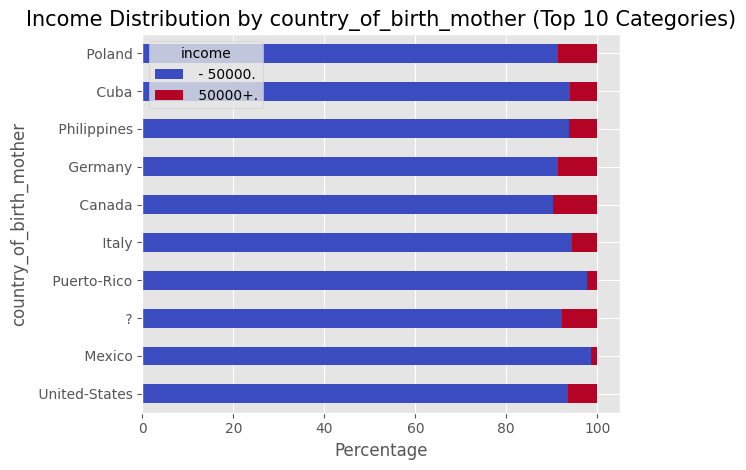

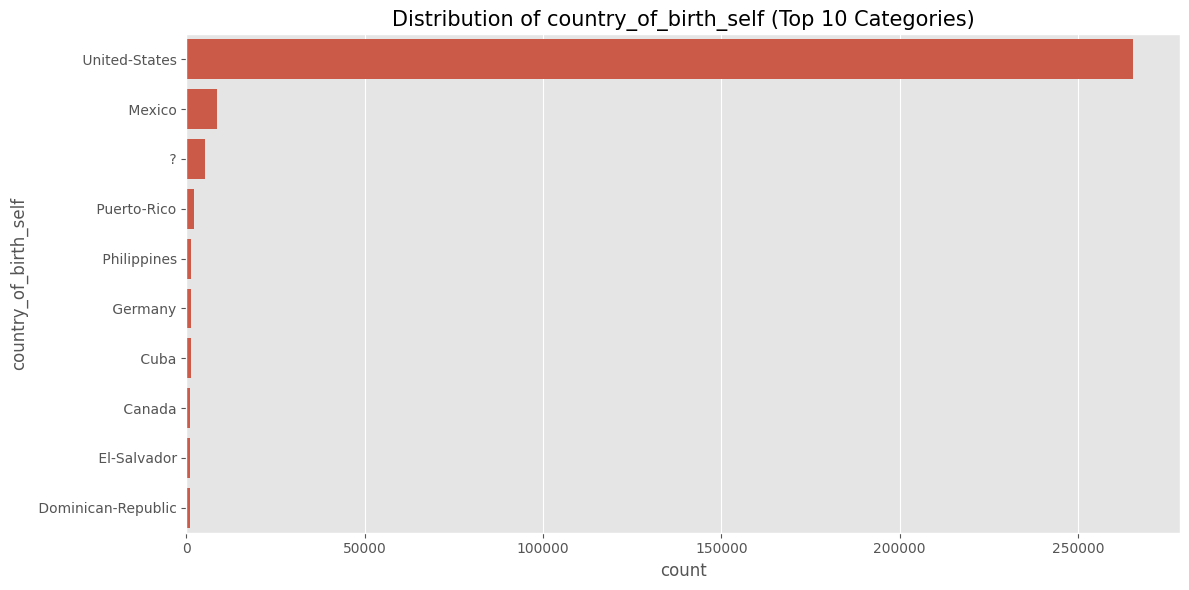

<Figure size 1400x800 with 0 Axes>

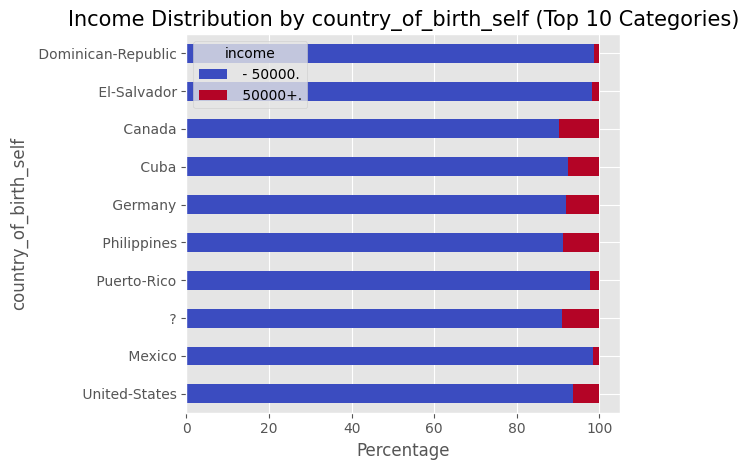

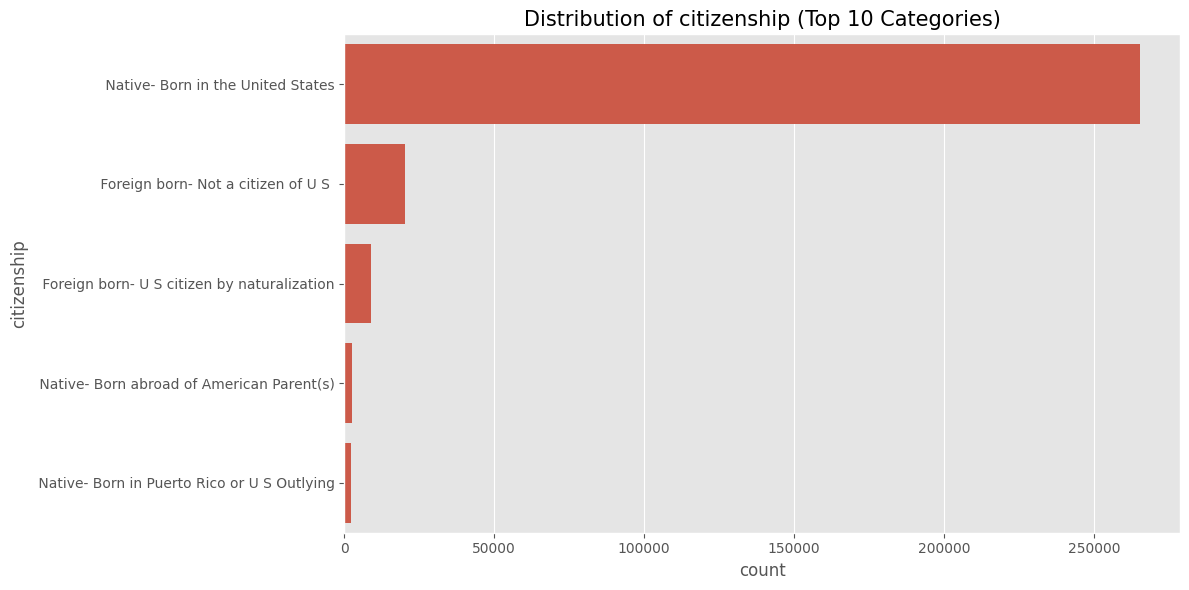

<Figure size 1400x800 with 0 Axes>

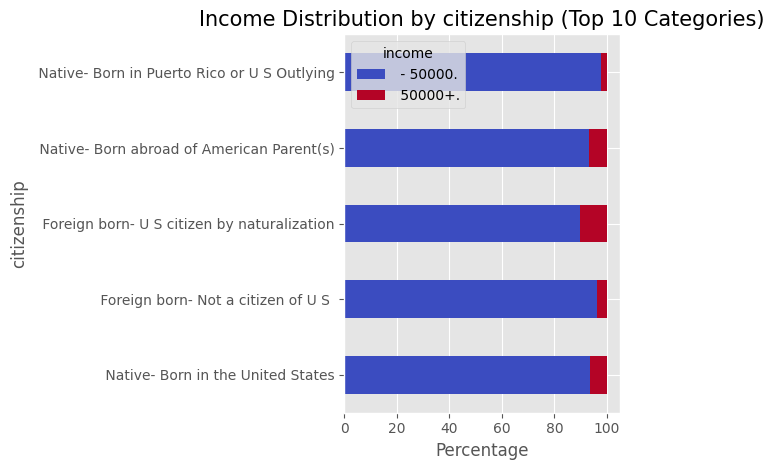

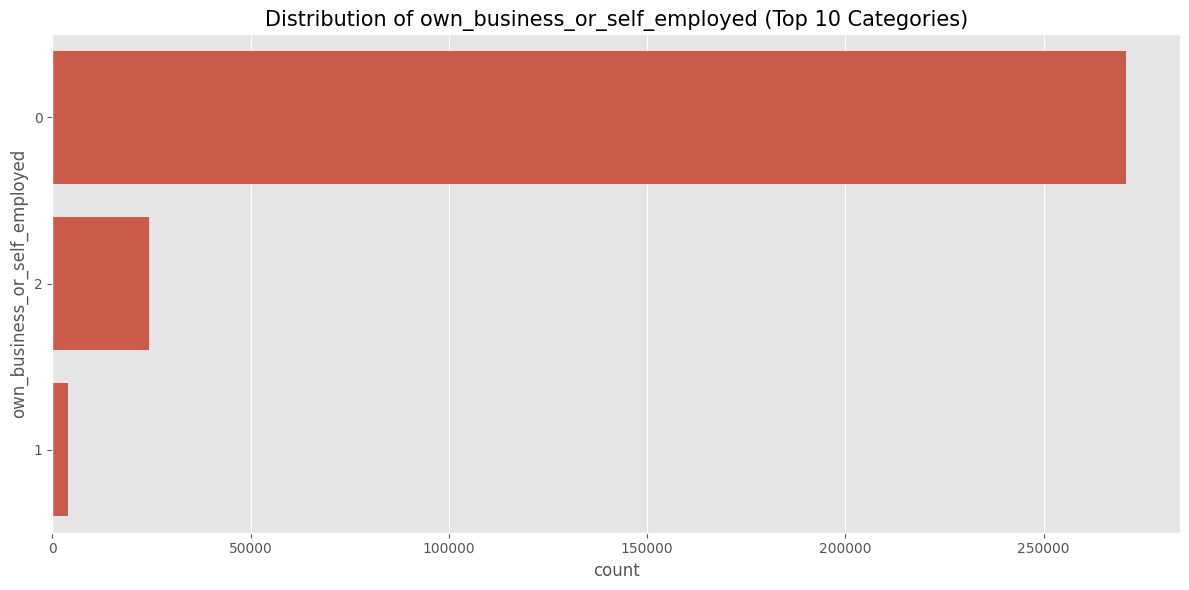

<Figure size 1400x800 with 0 Axes>

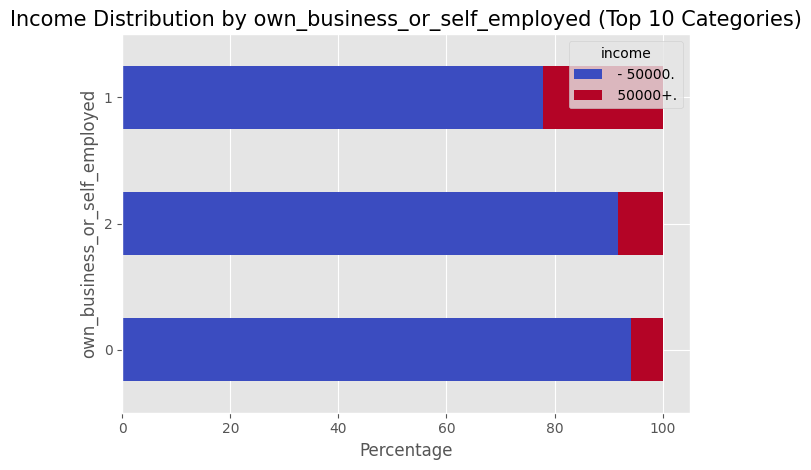

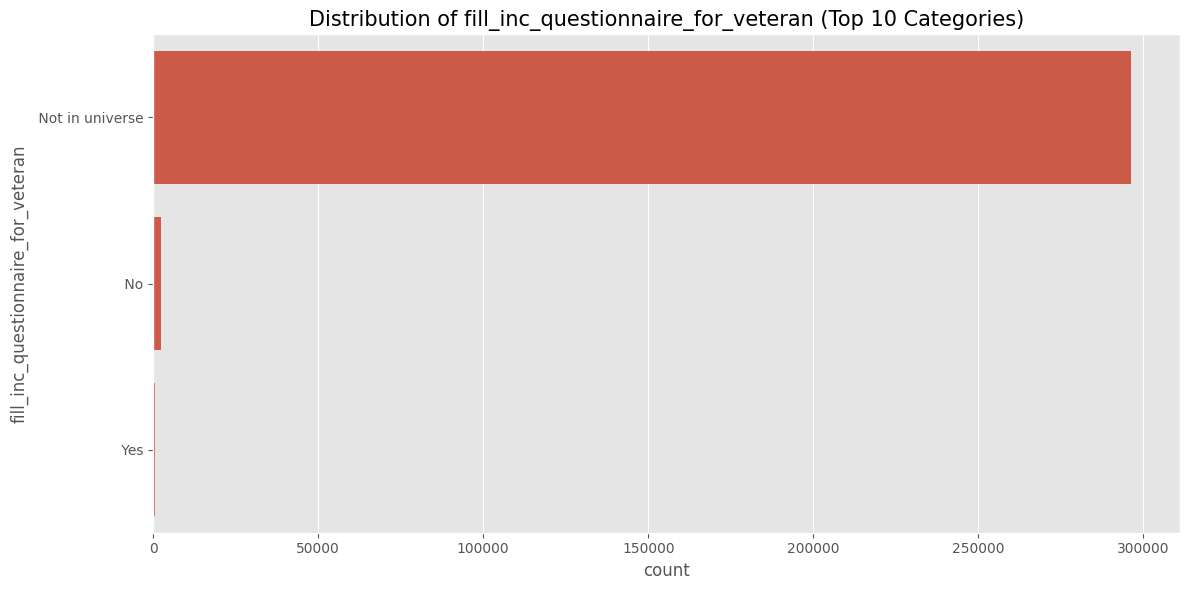

<Figure size 1400x800 with 0 Axes>

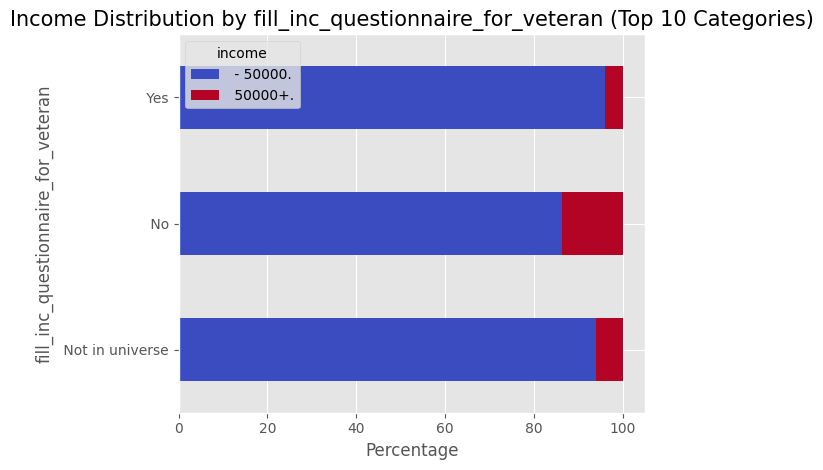

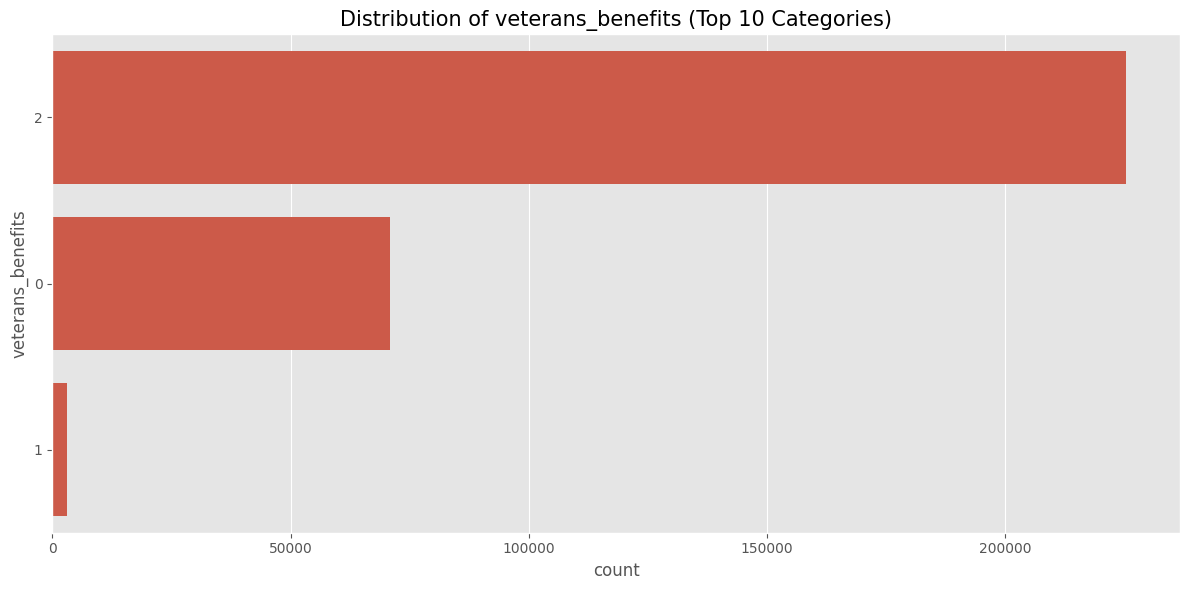

<Figure size 1400x800 with 0 Axes>

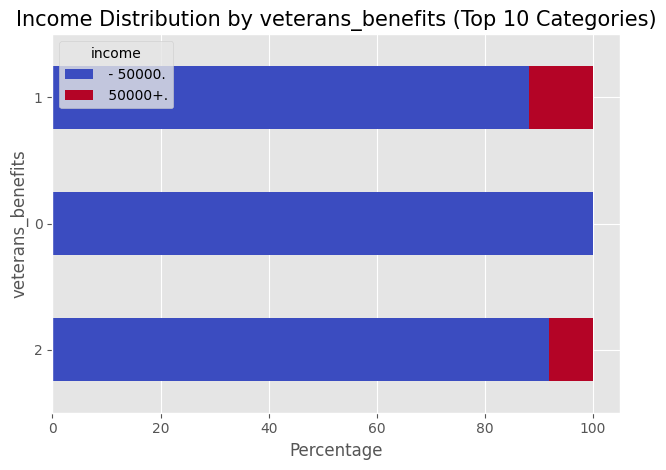

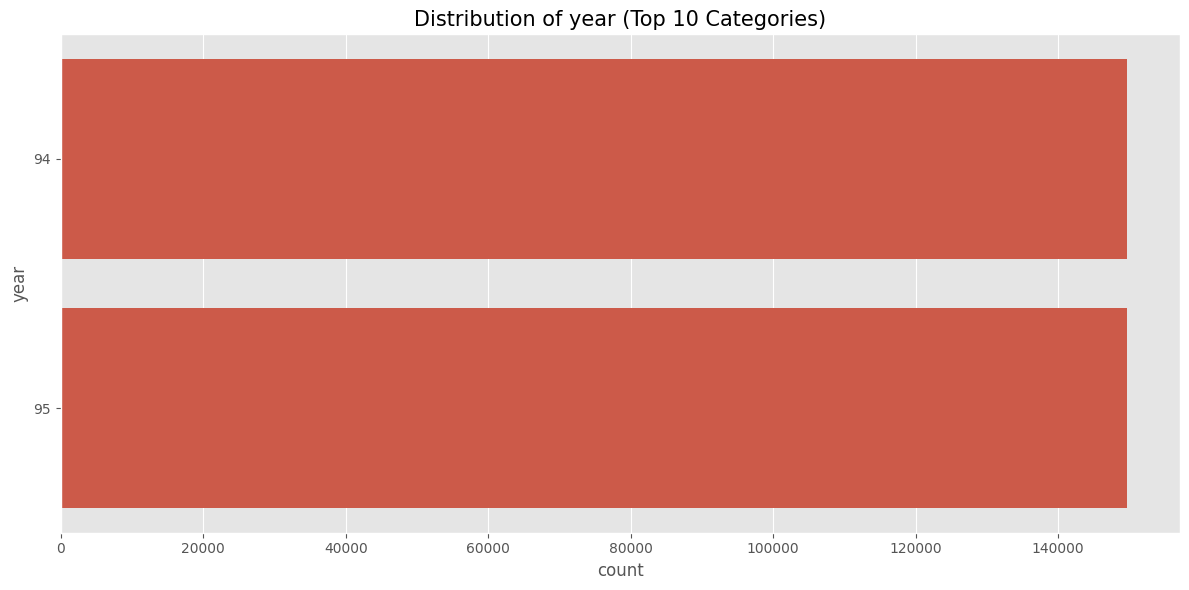

<Figure size 1400x800 with 0 Axes>

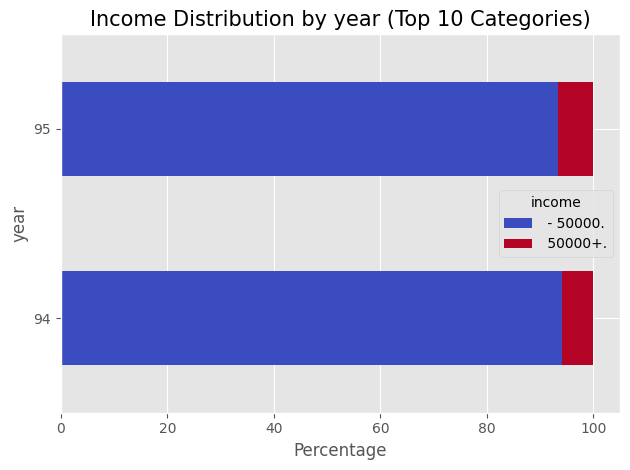

In [81]:
# Select important categorical features for analysis
categorical_columns = [
    'class_of_worker',
    'industry_code',
    'occupation_code',
    'education',
    'enrolled_in_edu_inst',
    'marital_status',
    'major_industry_code',
    'major_occupation_code',
    'race',
    'hispanic_origin',
    'sex',
    'member_of_labor_union',
    'reason_for_unemployment',
    'full_or_part_time_employment',
    'tax_filer_status',
    'region_of_previous_residence',
    'state_of_previous_residence',
    'detailed_household_summary',
    'detailed_household_summary_in_household',
    'migration_code_change_in_msa',
    'migration_code_change_in_reg',
    'migration_code_move_within_reg',
    'live_in_this_house_1_year_ago',
    'migration_prev_res_in_sunbelt',
    'family_members_under_18',
    'country_of_birth_father',
    'country_of_birth_mother',
    'country_of_birth_self',
    'citizenship',
    'own_business_or_self_employed',
    'fill_inc_questionnaire_for_veteran',
    'veterans_benefits',
    'year'
]

# Create count plots for categorical features
for col in categorical_columns:
    plt.figure(figsize=(12, 6))
    
    # Get value counts for the feature
    value_counts = combined_data[col].value_counts().nlargest(10)
    
    # Plot the 10 most common values
    sns.countplot(y=col, data=combined_data, order=value_counts.index)
    plt.title(f'Distribution of {col} (Top 10 Categories)', fontsize=15)
    plt.tight_layout()
    plt.show()
    
    # Stacked bar chart showing income distribution by category
    plt.figure(figsize=(14, 8))
    
    # Prepare data for stacked bar chart
    cross_tab = pd.crosstab(
        combined_data[col], 
        combined_data['income'],
        normalize='index'
    ) * 100  # Convert to percentage
    
    # Plot only the top 10 categories
    cross_tab.loc[value_counts.index].plot(kind='barh', stacked=True, 
                                          colormap='coolwarm')
    
    plt.title(f'Income Distribution by {col} (Top 10 Categories)', fontsize=15)
    plt.xlabel('Percentage', fontsize=12)
    plt.tight_layout()
    plt.show()

  # 4. Data Preparation







  Now that we've explored the data, let's prepare it for modeling.

  ### 4.1 Data Cleaning

In [58]:
# Function to clean data - fixed with correct values
def clean_data(df):
    # Make a copy of the dataframe
    df_clean = df.copy()
    
    # Convert target to binary with the correct values (note the leading space)
    df_clean['income'] = df_clean['income'].map({' - 50000.': 0, ' 50000+.': 1})
    
    # Replace '?' values with np.nan
    df_clean = df_clean.replace('?', np.nan)
    
    return df_clean

# Clean the training and test data
train_data_clean = clean_data(train_data_clean)
test_data_clean = clean_data(test_data_clean)
combined_data_clean = clean_data(combined_data_clean)

# Check missing values after cleaning
train_missing = train_data_clean.isnull().sum()[train_data_clean.isnull().sum() > 0]
print("Missing values in training data:")
print(train_missing)


Missing values in training data:
Series([], dtype: int64)


  ### 4.2 Identify Categorical Features and Their Unique Values

In [59]:
categorical_columns = [
    'class_of_worker', 'industry_code', 'occupation_code', 'education',
    'enrolled_in_edu_inst', 'marital_status', 'major_industry_code',
    'major_occupation_code', 'race', 'hispanic_origin', 'sex',
    'member_of_labor_union', 'reason_for_unemployment',
    'full_or_part_time_employment', 'tax_filer_status',
    'region_of_previous_residence', 'state_of_previous_residence',
    'detailed_household_summary', 'detailed_household_summary_in_household',
    'migration_code_change_in_msa', 'migration_code_change_in_reg',
    'migration_code_move_within_reg', 'live_in_this_house_1_year_ago',
    'migration_prev_res_in_sunbelt', 'family_members_under_18',
    'country_of_birth_father', 'country_of_birth_mother',
    'country_of_birth_self', 'citizenship', 'own_business_or_self_employed',
    'fill_inc_questionnaire_for_veteran', 'veterans_benefits', 'year'
]

# Function to identify categorical features and their unique values
def identify_categorical_features(df):
    # Identify categorical columns   
    print(f"Identified {len(categorical_columns)} categorical features")
    
    # Analyze unique values for each categorical column
    for col in categorical_columns:
        n_unique = df[col].nunique()
        unique_values = df[col].unique()
        print(f"{col}: {n_unique} unique values")
        print(f"Unique values: {unique_values}")
        print("-" * 50)
    
    return categorical_columns

# Apply the function to see unique values
categorical_columns = identify_categorical_features(combined_data_clean)


Identified 33 categorical features
class_of_worker: 9 unique values
Unique values: [' Not in universe' ' Self-employed-not incorporated' ' Private'
 ' Local government' ' Federal government' ' Self-employed-incorporated'
 ' State government' ' Never worked' ' Without pay']
--------------------------------------------------
industry_code: 52 unique values
Unique values: [ 0  4 40 34 43 37 24 39 12 35 45  3 19 29 32 48 33 23 44 36 31 30 41  5
 11  9 42  6 18 50  2  1 26 47 16 14 22 17  7  8 25 46 27 15 13 49 38 21
 28 20 51 10]
--------------------------------------------------
occupation_code: 47 unique values
Unique values: [ 0 34 10  3 40 26 37 31 12 36 41 22  2 35 25 23 42  8 19 29 27 16 33 13
 18  9 17 39 32 11 30 38 20  7 21 44 24 43 28  4  1  6 45 14  5 15 46]
--------------------------------------------------
education: 17 unique values
Unique values: [' High school graduate' ' Some college but no degree' ' 10th grade'
 ' Children' ' Bachelors degree(BA AB BS)'
 ' Masters degree(

  ### 4.3 Feature Engineering

In [60]:
# Enhanced feature engineering function with integrated label encoding
def engineer_features(df):
    df = df.copy()
       
    # Create work experience feature (assuming people start working at age 18)
    df['work_experience'] = df['age'] - 18
    df.loc[df['work_experience'] < 0, 'work_experience'] = 0
    
    # Create a feature for capital gains/losses ratio
    df['capital_ratio'] = df['capital_gains'] / (df['capital_losses'] + 1)  # Adding 1 to avoid division by zero
      
    # Binary feature for full year worker
    df['full_year_worker'] = (df['weeks_worked_in_year'] >= 50).astype(int)
    
    # Create binary features for capital gains/losses and dividends
    df['has_capital_gains'] = (df['capital_gains'] > 7000).astype(int)
    df['has_capital_losses'] = (df['capital_losses'] > 0).astype(int)
    df['has_dividends'] = (df['dividends_from_stocks'] > 0).astype(int)
     
    # Marital status simplified
    df['is_married'] = df['marital_status'].str.contains('Married', case=False).astype(int)
    return df

# Apply feature engineering
train_data_fe = engineer_features(train_data_clean)
test_data_fe = engineer_features(test_data_clean)
combined_data_fe = engineer_features(combined_data_clean)

# Check the new features
print("Engineered features added. New dataframe shape:", train_data_fe.shape)


Engineered features added. New dataframe shape: (196294, 49)


 ### 4.4 Encode Categorical Variables

In [61]:
def encode_categorical(df):
    df = df.copy()
    label_encoded_columns = []  # Track columns that were label encoded

    # 1. Label Encoding
    def label_encode(df):
        # Define mappings
        education_mapping = {
            ' Less than 1st grade': 0, ' 1st 2nd 3rd or 4th grade': 1,
            ' 5th or 6th grade': 2, ' 7th and 8th grade': 3,
            ' 9th grade': 4, ' 10th grade': 5, ' 11th grade': 6,
            ' 12th grade no diploma': 7, ' High school graduate': 8,
            ' Some college but no degree': 9, ' Associates degree-occup /vocational': 10,
            ' Associates degree-academic program': 11, ' Bachelors degree(BA AB BS)': 12,
            ' Masters degree(MA MS MEng MEd MSW MBA)': 13,
            ' Prof school degree (MD DDS DVM LLB JD)': 14,
            ' Doctorate degree(PhD EdD)': 15, ' Children': -1}
        
        # Company size categorical feature
        company_size_map = {
            'Not in universe': 0,
            'under 10': 1,
            '10 - 24': 2,
            '25 - 99': 3,
            '100 - 499': 4,
            '500 - 999': 5,
            '1000+': 6
        }
        
        simple_mapping = {
            ' Not in universe': 0, ' No': 1, ' Yes': 2
        }
        
        enrolled_mapping = {
            ' Not in universe': 0, ' High school': 1, ' College or university': 2}
        
        live_in_house_mapping = {
            ' Not in universe under 1 year old': 0, ' No': 1, ' Yes': 2}

        # Apply mappings
        label_encode_cols = {
            'sex': {' Female': 0, ' Male': 1},
            'education': education_mapping,
            'enrolled_in_edu_inst': enrolled_mapping,
            'member_of_labor_union': simple_mapping,
            'live_in_this_house_1_year_ago': live_in_house_mapping,
            'fill_inc_questionnaire_for_veteran': simple_mapping,
            'num_persons_worked_for_employer': company_size_map
        }
        
        # Create new columns with encoded values
        encoded_columns = []
        for col, mapping in label_encode_cols.items():
            if col in df.columns:
                new_col_name = f"{col}_encoded"
                df[new_col_name] = df[col].map(mapping)
                encoded_columns.append(col)
        
        return df, encoded_columns, list(label_encode_cols.keys())

    # Apply label encoding and get list of columns that were encoded
    df, label_encoded_columns, label_encode_keys = label_encode(df)

    # 2. One-Hot Encoding
    # Identify categorical columns, excluding 'income'
    categorical_cols = [col for col in df.columns if 
                        df[col].dtype == 'object' and col != 'income' and 
                        not col.endswith('_encoded')]

    # One-hot encode remaining categorical columns
    if categorical_cols:
        encoder = OneHotEncoder(handle_unknown='ignore', sparse_output=False)
        encoded = encoder.fit_transform(df[categorical_cols])
        encoded_df = pd.DataFrame(
            encoded, 
            columns=encoder.get_feature_names_out(categorical_cols),
            index=df.index
        )
        df = pd.concat([df, encoded_df], axis=1)
    
    # 3. Numeric Conversion
    numeric_cols = ['occupation_code', 'industry_code', 'year', 'veterans_benefits', 'own_business_or_self_employed']
    for col in numeric_cols:
        if col in df.columns:
            df[col] = pd.to_numeric(df[col], errors='coerce')
    
    # 4. Drop original categorical columns
    cols_to_drop = categorical_cols + label_encode_keys
    df = df.drop(columns=cols_to_drop, errors='ignore')

    return df

# Encode all datasets
train_data_enc = encode_categorical(train_data_fe)
test_data_enc = encode_categorical(test_data_fe)
combined_data_enc = encode_categorical(combined_data_fe)

print("Engineered features added. Train dataframe shape:", train_data_enc.shape)
print("Engineered features added. Test dataframe shape:", test_data_enc.shape)
print("Engineered features added. Combined dataframe shape:", combined_data_enc.shape)


Engineered features added. Train dataframe shape: (196294, 423)
Engineered features added. Test dataframe shape: (96256, 422)
Engineered features added. Combined dataframe shape: (292550, 423)


 #### 4.4.1 Drop new columns not common in both train and test

In [62]:
def align_columns(train_df, test_df):
    """
    Ensures that the training and test DataFrames have the same columns.

    Args:
        train_df (pd.DataFrame): The training DataFrame.
        test_df (pd.DataFrame): The test DataFrame.

    Returns:
        tuple: The modified training and test DataFrames with aligned columns.
    """

    train_cols = set(train_df.columns)
    test_cols = set(test_df.columns)

    # Find columns unique to train
    train_unique = train_cols - test_cols

    # Find columns unique to test
    test_unique = test_cols - train_cols

    # Print columns to drop from train
    if train_unique:
        print("Columns unique to training data:")
        for col in train_unique:
            print(f"  - {col}")
        train_df = train_df.drop(columns=train_unique, errors='ignore')

    # Print columns to drop from test
    if test_unique:
        print("\nColumns unique to test data:")
        for col in test_unique:
            print(f"  - {col}")
        test_df = test_df.drop(columns=test_unique, errors='ignore')

    return train_df, test_df

# Align columns between training and test sets
train_data_aligned, test_data_aligned = align_columns(train_data_enc, test_data_enc)

# Verify the shapes after alignment
print("\nTraining data shape after alignment:", train_data_aligned.shape)
print("Test data shape after alignment:", test_data_aligned.shape)

Columns unique to training data:
  - detailed_household_summary_ Grandchild <18 ever marr not in subfamily

Training data shape after alignment: (196294, 422)
Test data shape after alignment: (96256, 422)


#### 4.4.2 Drop Features with High Null Percentage

In [63]:
def drop_high_null_features(train_df, test_df, threshold=0.3):
    """
    Removes features that have a percentage of null values above the specified threshold.
    
    Args:
        train_df (pd.DataFrame): Training dataframe
        test_df (pd.DataFrame): Test dataframe
        threshold (float): Maximum allowed percentage of nulls (0.0 to 1.0)
        
    Returns:
        tuple: Clean training and test dataframes with high-null features removed
    """
    # Make copies to avoid modifying the originals
    train_df = train_df.copy()
    test_df = test_df.copy()
    
    # Calculate null percentages for each column in training data
    null_percentages = train_df.isnull().mean()
    
    # Identify columns to drop (excluding 'income')
    high_null_cols = null_percentages[
        (null_percentages > threshold) & 
        (null_percentages.index != 'income')
    ].index.tolist()
    
    # Log the columns being dropped
    if high_null_cols:
        print(f"\nRemoving {len(high_null_cols)} features with >{threshold*100:.1f}% null values:")
        for col in high_null_cols:
            print(f"  - {col}: {null_percentages[col]*100:.2f}% nulls")
        
        # Drop the identified columns from both datasets
        train_df = train_df.drop(columns=high_null_cols)
        test_df = test_df.drop(columns=high_null_cols)
        
        print(f"\nAfter dropping high-null features:")
        print(f"  Training shape: {train_df.shape}")
        print(f"  Test shape: {test_df.shape}")
    else:
        print(f"\nNo features exceeded the {threshold*100:.1f}% null threshold")
    
    return train_df, test_df

# Apply the function to remove high-null features
train_data_nulls_dropped, test_data_nulls_dropped = drop_high_null_features(
    train_data_aligned, test_data_aligned, threshold=0.3
)

# Continue with the clean datasets
# (Rename the variables to maintain naming consistency with subsequent steps)
train_data_aligned = train_data_nulls_dropped
test_data_aligned = test_data_nulls_dropped


Removing 1 features with >30.0% null values:
  - num_persons_worked_for_employer_encoded: 100.00% nulls

After dropping high-null features:
  Training shape: (196294, 421)
  Test shape: (96256, 421)


 ### 4.5 Split Data

In [64]:
# Limit dataset size if needed
# train_data_aligned = train_data_aligned.iloc[:50000]
# test_data_aligned = test_data_aligned[:50000]

In [65]:
# Split into train/test
X_train = train_data_aligned.drop('income', axis=1)
y_train = train_data_aligned['income']
X_test = test_data_aligned.drop('income', axis=1)
y_test = test_data_aligned['income']

# Create validation set
# Create validation set with stratification
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.2, 
                                                  random_state=42, stratify=y_train)

print(X_train.shape, y_train.shape, X_val.shape, y_val.shape)

(157035, 420) (157035,) (39259, 420) (39259,)


 ### 4.6 Handle Missing Values

In [66]:
# Identify numeric and categorical features
num_features = X_train.select_dtypes(include=np.number).columns.tolist()
cat_features = X_train.select_dtypes(include='object').columns.tolist()

# Imputation
num_imputer = SimpleImputer(strategy='median')
cat_imputer = SimpleImputer(strategy='most_frequent')

# Apply imputation to numeric features
if num_features:
    X_train[num_features] = num_imputer.fit_transform(X_train[num_features])
    X_val[num_features] = num_imputer.transform(X_val[num_features])
    X_test[num_features] = num_imputer.transform(X_test[num_features])

# Apply imputation to categorical features
if cat_features:
    X_train[cat_features] = cat_imputer.fit_transform(X_train[cat_features])
    X_val[cat_features] = cat_imputer.transform(X_val[cat_features])
    X_test[cat_features] = cat_imputer.transform(X_test[cat_features])

# Verify imputation was successful
train_missing = X_train.isnull().sum().sum()
val_missing = X_val.isnull().sum().sum()
test_missing = X_test.isnull().sum().sum()

print("Missing values after imputation:")
print(f"Training data: {train_missing}")
print(f"Validation data: {val_missing}")
print(f"Test data: {test_missing}")

# If any missing values remain, apply a second pass of imputation
if train_missing > 0 or val_missing > 0 or test_missing > 0:
    print("Warning: Some values couldn't be imputed, applying a fallback strategy")
    
    # Apply a more aggressive fallback imputation strategy
    fallback_imputer = SimpleImputer(strategy='constant', fill_value=0)
    
    # Get columns that still have missing values
    train_missing_cols = X_train.columns[X_train.isnull().any()].tolist()
    val_missing_cols = X_val.columns[X_val.isnull().any()].tolist()
    test_missing_cols = X_test.columns[X_test.isnull().any()].tolist()
    
    all_missing_cols = list(set(train_missing_cols + val_missing_cols + test_missing_cols))
    
    if all_missing_cols:
        X_train[all_missing_cols] = fallback_imputer.fit_transform(X_train[all_missing_cols])
        X_val[all_missing_cols] = fallback_imputer.transform(X_val[all_missing_cols])
        X_test[all_missing_cols] = fallback_imputer.transform(X_test[all_missing_cols])
    
    # Check again
    print("Missing values after fallback imputation:")
    print(f"Training data: {X_train.isnull().sum().sum()}")
    print(f"Validation data: {X_val.isnull().sum().sum()}")
    print(f"Test data: {X_test.isnull().sum().sum()}")

Missing values after imputation:
Training data: 0
Validation data: 0
Test data: 0


 ### 4.7 Handle Outliers

In [67]:
def handle_outliers(df, y=None, dataset_name=""):
    # Track initial shape
    initial_shape = df.shape
    print(f"\nProcessing {dataset_name} dataset:")
    print(f"Initial shape: {initial_shape}")

    # Create copy and process
    df_out = df.copy()
    numeric_cols = df_out.select_dtypes(include=np.number).columns.tolist()
    
    # Only consider a row an outlier if it has outliers in multiple columns
    outlier_count_per_row = pd.Series(0, index=df_out.index)
    
    # Count outliers per column
    column_outlier_counts = {}
    
    for col in numeric_cols:
        # Skip columns with low variance or mostly identical values
        if df_out[col].std() < 0.001 or df_out[col].nunique() < 5:
            continue
            
        # Standard statistical outlier detection
        Q1 = df_out[col].quantile(0.10)  # More conservative percentiles
        Q3 = df_out[col].quantile(0.90)
        IQR = Q3 - Q1
        
        # Very conservative threshold - only mark extreme outliers
        lower = Q1 - 5*IQR
        upper = Q3 + 5*IQR
        
        # Identify outliers in this column
        col_outliers = (df_out[col] < lower) | (df_out[col] > upper)
        column_outlier_counts[col] = col_outliers.sum()
        
        # Increment outlier count for affected rows
        outlier_count_per_row += col_outliers
    
    # Only remove rows that are outliers in at least 3 different columns
    # This focuses on truly problematic data points
    outlier_rows = outlier_count_per_row >= 3
    
    # Get indices of rows to keep
    keep_indices = df_out.index[~outlier_rows]
    
    # Drop the identified outlier rows
    df_out = df_out.loc[keep_indices]
    
    # If labels are provided, filter them too
    if y is not None:
        y_out = y.loc[keep_indices]
    else:
        y_out = None
    
    # Track final shape
    final_shape = df_out.shape
    print(f"Final shape: {final_shape}")
    print(f"Rows maintained: {final_shape[0]} ({(final_shape[0]/initial_shape[0])*100:.1f}%)")
    print(f"Outlier rows removed: {initial_shape[0] - final_shape[0]}")
    
    return df_out, y_out

# Apply to datasets with names and get updated labels
X_train_out, y_train_out = handle_outliers(X_train, y_train, "Training")
X_val_out, y_val_out = handle_outliers(X_val, y_val, "Validation")
X_test_out, y_test_out = handle_outliers(X_test, y_test, "Test")


Processing Training dataset:
Initial shape: (157035, 420)
Final shape: (155305, 420)
Rows maintained: 155305 (98.9%)
Outlier rows removed: 1730

Processing Validation dataset:
Initial shape: (39259, 420)
Final shape: (38829, 420)
Rows maintained: 38829 (98.9%)
Outlier rows removed: 430

Processing Test dataset:
Initial shape: (96256, 420)
Final shape: (95180, 420)
Rows maintained: 95180 (98.9%)
Outlier rows removed: 1076


 ### 4.8 Handle Skewness

In [68]:
def handle_skewness(df, threshold=.5):
    """Handle skewness with detailed before/after reporting"""
    numeric_cols = df.select_dtypes(include=np.number).columns.tolist()
    skewed_features = {}
    transformation_report = []
    
    # Initial skewness analysis
    print(f"\nSkewness analysis (threshold: {threshold}):")
    for col in numeric_cols:
        skew = df[col].skew()
        if abs(skew) > threshold:
            skewed_features[col] = {
                'initial': skew,
                'final': None,
                'transformed': False
            }

    print(f"Found {len(skewed_features)} potentially skewed features")
    
    # Apply transformations
    df_transformed = df.copy()
    for col, stats in skewed_features.items():
        original_skew = stats['initial']
        
        # Check if transformation needed
        if abs(original_skew) > threshold:
            # Handle non-positive values
            if df[col].min() <= 0:
                shift = abs(df[col].min()) + 1
                transformed = np.log1p(df[col] + shift)
            else:
                transformed = np.log1p(df[col])
            
            # Calculate new skewness
            new_skew = transformed.skew()
            
            # Only apply if improvement occurs
            if abs(new_skew) < abs(original_skew):
                df_transformed[col] = transformed
                stats['final'] = new_skew
                stats['transformed'] = True
                transformation_report.append(
                    f"{col}: {original_skew:.2f} → {new_skew:.2f} (Improved)"
                )
            else:
                transformation_report.append(
                    f"{col}: {original_skew:.2f} → {new_skew:.2f} (No change)"
                )
                stats['final'] = original_skew
                stats['transformed'] = False

    # Print transformation results
    print("\nSkewness transformation results:")
    for report in transformation_report:
        print(report)
        
    return df_transformed, skewed_features

# Apply to processed datasets
print("\n=== Training Data ===")
X_train_skew, train_skew_info = handle_skewness(X_train_out, threshold=.5)

print("\n=== Validation Data ===")
X_val_skew, val_skew_info = handle_skewness(X_val_out, threshold=.5)

print("\n=== Test Data ===")
X_test_skew, test_skew_info = handle_skewness(X_test_out, threshold=.5)



=== Training Data ===

Skewness analysis (threshold: 0.5):
Found 396 potentially skewed features

Skewness transformation results:
industry_code: 0.50 → 0.23 (Improved)
occupation_code: 0.81 → 0.36 (Improved)
wage_per_hour: 9.43 → 3.93 (Improved)
capital_gains: 26.80 → 5.99 (Improved)
capital_losses: 7.51 → 6.85 (Improved)
dividends_from_stocks: 29.97 → 3.36 (Improved)
instance_weight: 1.40 → -0.79 (Improved)
own_business_or_self_employed: 2.89 → 2.85 (Improved)
veterans_benefits: -1.26 → -1.27 (No change)
work_experience: 0.77 → -0.33 (Improved)
capital_ratio: 26.80 → 5.99 (Improved)
full_year_worker: 0.54 → 0.54 (No change)
has_capital_gains: 9.71 → 9.71 (No change)
has_capital_losses: 6.83 → 6.83 (Improved)
has_dividends: 2.68 → 2.68 (No change)
is_married: -2.14 → -2.14 (Improved)
enrolled_in_edu_inst_encoded: 4.20 → 3.98 (Improved)
member_of_labor_union_encoded: 3.43 → 3.13 (Improved)
fill_inc_questionnaire_for_veteran_encoded: 11.65 → 10.83 (Improved)
class_of_worker_ Federal go

 ### 4.9 Scale/Normalize

In [69]:
# Function to describe data before and after scaling
def print_scaling_info(data_before, data_after, dataset_name=""):
    """Print statistical information about scaling effects"""
    print(f"\n{dataset_name} Scaling Results:")
    
    # Convert to numpy if needed
    if isinstance(data_after, pd.DataFrame):
        data_after = data_after.values
    if isinstance(data_before, pd.DataFrame):
        data_before = data_before.values
        
    # Calculate statistics
    before_mean = np.mean(data_before)
    before_std = np.std(data_before)
    before_min = np.min(data_before)
    before_max = np.max(data_before)
    
    after_mean = np.mean(data_after)
    after_std = np.std(data_after)
    after_min = np.min(data_after)
    after_max = np.max(data_after)
    
    # Print comparison
    print(f"  Before scaling: mean={before_mean:.4f}, std={before_std:.4f}, min={before_min:.4f}, max={before_max:.4f}")
    print(f"  After scaling:  mean={after_mean:.4f}, std={after_std:.4f}, min={after_min:.4f}, max={after_max:.4f}")

# Apply Robust Scaling
print("\nApplying RobustScaler to handle outliers and create uniform feature scales...")
scaler = RobustScaler()

# Fit scaler on training data
X_train_scaled = scaler.fit_transform(X_train_skew)

# Apply same transformation to validation and test data
X_val_scaled = scaler.transform(X_val_skew)
X_test_scaled = scaler.transform(X_test_skew)

# Print information about the scaling results
print_scaling_info(X_train_skew, X_train_scaled, "Training Data")
print_scaling_info(X_val_skew, X_val_scaled, "Validation Data")
print_scaling_info(X_test_skew, X_test_scaled, "Test Data")

# Convert back to DataFrames to preserve column names
X_train_scaled_df = pd.DataFrame(X_train_scaled, columns=X_train_skew.columns, index=X_train_skew.index)
X_val_scaled_df = pd.DataFrame(X_val_scaled, columns=X_val_skew.columns, index=X_val_skew.index) 
X_test_scaled_df = pd.DataFrame(X_test_scaled, columns=X_test_skew.columns, index=X_test_skew.index)

print(f"\nScaled dataset shapes:")
print(f"  X_train_scaled: {X_train_scaled_df.shape}")
print(f"  X_val_scaled: {X_val_scaled_df.shape}")
print(f"  X_test_scaled: {X_test_scaled_df.shape}")


Applying RobustScaler to handle outliers and create uniform feature scales...

Training Data Scaling Results:
  Before scaling: mean=0.8399, std=5.2905, min=-1.0000, max=95.0000
  After scaling:  mean=0.0302, std=0.2654, min=-5.0888, max=10.8198

Validation Data Scaling Results:
  Before scaling: mean=0.8567, std=5.4131, min=-1.0000, max=95.0000
  After scaling:  mean=0.0240, std=0.6453, min=-5.1320, max=17.5763

Test Data Scaling Results:
  Before scaling: mean=0.8842, std=5.4257, min=-1.0000, max=95.0000
  After scaling:  mean=0.0484, std=0.6541, min=-4.9534, max=17.5763

Scaled dataset shapes:
  X_train_scaled: (155305, 420)
  X_val_scaled: (38829, 420)
  X_test_scaled: (95180, 420)


 ### 4.10 Dimensionality Reduction

Explained variance ratio: 0.9501
Original number of features: 420
Features after PCA: 40
Components needed for 95% variance: 40


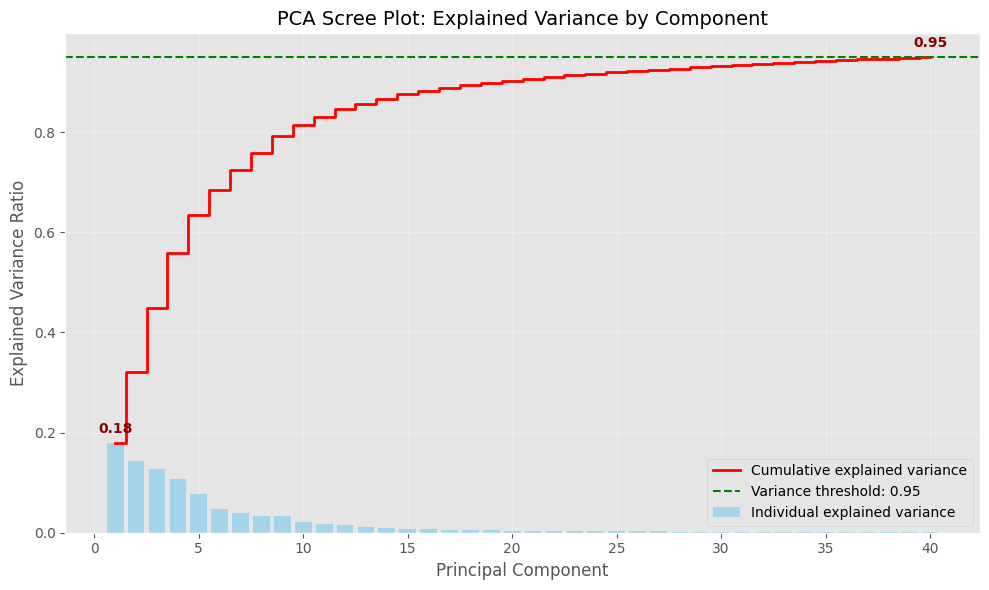

In [70]:
def apply_pca(X_train_scaled, X_val_scaled, X_test_scaled, variance_threshold=0.95):
    """
    Apply PCA to scaled data and generate a scree plot
    
    Args:
        X_train_scaled, X_val_scaled, X_test_scaled: Scaled numpy arrays or DataFrames
        variance_threshold: Desired explained variance (default 0.95)
        
    Returns:
        PCA-transformed datasets
    """
    # Convert to numpy arrays if DataFrames
    if isinstance(X_train_scaled, pd.DataFrame):
        # Save the indices before conversion
        train_index = X_train_scaled.index
        val_index = X_val_scaled.index
        test_index = X_test_scaled.index
        
        # Convert to numpy for PCA
        X_train_scaled_np = X_train_scaled.values
        X_val_scaled_np = X_val_scaled.values
        X_test_scaled_np = X_test_scaled.values
    else:
        # Already numpy arrays, need to get indices from another source
        train_index = np.arange(X_train_scaled.shape[0])
        val_index = np.arange(X_val_scaled.shape[0])
        test_index = np.arange(X_test_scaled.shape[0])
        
        X_train_scaled_np = X_train_scaled
        X_val_scaled_np = X_val_scaled
        X_test_scaled_np = X_test_scaled
    
    # Fit PCA only on training data
    pca = PCA(n_components=variance_threshold)
    X_train_pca = pca.fit_transform(X_train_scaled_np)
    X_val_pca = pca.transform(X_val_scaled_np)
    X_test_pca = pca.transform(X_test_scaled_np)
    
    # Create PCA DataFrames
    pca_cols = [f'PC{i+1}' for i in range(X_train_pca.shape[1])]
    X_train_pca_df = pd.DataFrame(X_train_pca, columns=pca_cols, index=train_index)
    X_val_pca_df = pd.DataFrame(X_val_pca, columns=pca_cols, index=val_index)
    X_test_pca_df = pd.DataFrame(X_test_pca, columns=pca_cols, index=test_index)
    
    # Generate scree plot
    plt.figure(figsize=(10, 6))
    
    # Get explained variance
    explained_variance = pca.explained_variance_ratio_
    cumulative_variance = np.cumsum(explained_variance)
    n_components = len(explained_variance)
    
    # Bar chart for individual explained variance
    plt.bar(range(1, n_components+1), explained_variance, alpha=0.7, 
            align='center', label='Individual explained variance', color='skyblue')
    
    # Line plot for cumulative explained variance
    plt.step(range(1, n_components+1), cumulative_variance, where='mid',
             label='Cumulative explained variance', color='red', linewidth=2)
    
    # Add a horizontal line at variance threshold
    plt.axhline(y=variance_threshold, color='green', linestyle='--', 
                label=f'Variance threshold: {variance_threshold}')
    
    # Annotate key points
    for i, (ev, cv) in enumerate(zip(explained_variance, cumulative_variance)):
        if i == 0 or i == n_components-1:  # Always label first and last components
            plt.text(i+1, cv+0.02, f'{cv:.2f}', ha='center', color='darkred', fontweight='bold')
        elif cv >= variance_threshold and cv-explained_variance[i] < variance_threshold:
            # Label the component that crosses the threshold
            plt.text(i+1, cv+0.02, f'{cv:.2f}', ha='center', color='darkred', fontweight='bold')
            plt.axvline(x=i+1, color='green', linestyle='--', alpha=0.3)
    
    # Add labels and title
    plt.ylabel('Explained Variance Ratio', fontsize=12)
    plt.xlabel('Principal Component', fontsize=12)
    plt.title('PCA Scree Plot: Explained Variance by Component', fontsize=14)
    plt.legend(loc='best')
    plt.grid(True, alpha=0.3)
    plt.tight_layout()
    
    # Print summary statistics
    print(f"Explained variance ratio: {np.sum(pca.explained_variance_ratio_):.4f}")
    print(f"Original number of features: {X_train_scaled_np.shape[1]}")
    print(f"Features after PCA: {X_train_pca_df.shape[1]}")
    
    # Find how many components needed for threshold
    components_for_threshold = np.where(cumulative_variance >= variance_threshold)[0][0] + 1
    print(f"Components needed for {variance_threshold*100:.0f}% variance: {components_for_threshold}")
    
    # Show plot
    plt.show()
    
    return X_train_pca_df, X_val_pca_df, X_test_pca_df, pca

# To apply PCA, replace these lines after the scaling step:
# Apply PCA to the scaled data (can be commented out to skip PCA)
X_train_pca, X_val_pca, X_test_pca, pca = apply_pca(X_train_scaled_df, X_val_scaled_df, X_test_scaled_df)

# Set these variables for next steps - allowing flexibility to use or skip PCA
# If PCA is used:
X_train_processed = X_train_pca
X_val_processed = X_val_pca
X_test_processed = X_test_pca
# If PCA is skipped (commented out):
# X_train_processed = X_train_scaled_df
# X_val_processed = X_val_scaled_df
# X_test_processed = X_test_scaled_df

 ### 4.11 Remove Multicollinearity

In [71]:
def remove_multicollinearity(X_train, X_val, X_test, threshold=0.75):
    """
    Remove highly correlated features
    
    This function works with either DataFrames or numpy arrays
    """
    # Convert to DataFrame if numpy arrays
    is_numpy = isinstance(X_train, np.ndarray)
    if is_numpy:
        X_train = pd.DataFrame(X_train)
        X_val = pd.DataFrame(X_val)
        X_test = pd.DataFrame(X_test)
    
    # Calculate correlation matrix
    corr_matrix = X_train.corr().abs()
    
    # Find high correlation pairs
    upper = corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(bool))
    high_corr_pairs = []
    
    # Detailed correlation reporting
    print("\nFeature correlations above threshold:")
    for i in range(len(corr_matrix.columns)):
        for j in range(i):
            if corr_matrix.iloc[i, j] > threshold:
                col1 = corr_matrix.columns[i]
                col2 = corr_matrix.columns[j]
                corr_value = corr_matrix.iloc[i, j]
                high_corr_pairs.append((col1, col2, corr_value))
                print(f"• {col1} & {col2}: {corr_value:.3f}")

    # Identify columns to drop
    to_drop = [column for column in upper.columns if any(upper[column] > threshold)]
    
    # Remove features if any to drop
    if to_drop:
        print(f"\nDropping {len(to_drop)} features due to multicollinearity:")
        print(", ".join(to_drop))
        
        X_train = X_train.drop(to_drop, axis=1)
        X_val = X_val.drop(to_drop, axis=1)
        X_test = X_test.drop(to_drop, axis=1)
    else:
        print("\nNo features meet correlation threshold for removal")
    
    # Return in original format
    if is_numpy:
        return X_train.values, X_val.values, X_test.values
    return X_train, X_val, X_test

# To use the function with your datasets
X_train_final, X_val_final, X_test_final = remove_multicollinearity(
    X_train_processed, X_val_processed, X_test_processed, threshold=0.85
)

# print(X_train_final.shape, X_val_final.shape,X_test_final.shape)


Feature correlations above threshold:

No features meet correlation threshold for removal


 # 5. Modeling


 Let's implement various machine learning models and evaluate their performance.

The choice of metrics depends on whether your classification problem is **binary**, **multi-class**, or **imbalanced**. Here are the most common evaluation metrics to compare your models:

##### **General Metrics for Classification**
| **Metric** | **Description** | **Best for** |
|------------|----------------|--------------|
| **Accuracy** | Percentage of correct predictions. | Balanced datasets with equal class distribution. |
| **Precision** | Measures how many predicted positives are actually positive (TP / (TP + FP)). | When false positives are costly (e.g., fraud detection). |
| **Recall (Sensitivity)** | Measures how many actual positives were correctly predicted (TP / (TP + FN)). | When false negatives are costly (e.g., medical diagnosis). |
| **F1-Score** | Harmonic mean of precision and recall. Balances both metrics. | Imbalanced datasets. |
| **ROC-AUC (Receiver Operating Characteristic - Area Under Curve)** | Measures how well a model distinguishes between classes. | Binary classification, imbalanced datasets. |
| **PR-AUC (Precision-Recall AUC)** | Measures precision vs. recall trade-off. | Imbalanced datasets. |
| **Log Loss (Cross-Entropy Loss)** | Measures the uncertainty of the model’s predictions. | Probabilistic classification. |


##### **Computational Performance Metrics**
| **Metric** | **Description** | **Best for** |
|------------|----------------|--------------|
| **Training Time** | Measures how long the model takes to train. | Large datasets. |
| **Inference Time** | Measures how fast the model predicts new data. | Real-time applications. |
| **Model Size** | How much memory the model consumes. | When deployment constraints exist. |

##### **How to Compare Models?**
1. Train all models on the same dataset.
2. Use cross-validation** to reduce variance.
3. Record performance metrics (F1-score, ROC-AUC, etc.).
4. Compare training time and inference speed if necessary.
5. Pick the best model based on the most relevant metric for your application.

 ### 5.1 Model Training and Evaluation

In [72]:
# First, make sure you're using the updated variables consistently
print(f"X_train_final shape: {X_train_final.shape}")
print(f"y_train_out shape: {y_train_out.shape}")
print(f"X_val_final shape: {X_val_final.shape}")
print(f"y_val_out shape: {y_val_out.shape}")

# Function to train, evaluate and store model metrics
def train_and_evaluate_model(model, model_name, X_train, y_train, X_val, y_val):
    # Use stratified cross-validation for training metrics
    cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
    
    # Start training timer
    start_time = time.time()
    
    # Train model
    model.fit(X_train, y_train)
    
    # Calculate training time
    training_time = time.time() - start_time
    
    # Get cross-validation scores
    if hasattr(model, "predict_proba"):
        cv_scores = cross_val_score(model, X_train, y_train, cv=cv, scoring='f1', n_jobs=-1)
    else:
        cv_scores = cross_val_score(model, X_train, y_train, cv=cv, scoring='f1', n_jobs=-1)
    
    # Prediction timing
    start_time = time.time()
    y_val_pred = model.predict(X_val)
    inference_time = time.time() - start_time
    
    # Get probabilities if available
    if hasattr(model, "predict_proba"):
        y_val_proba = model.predict_proba(X_val)[:, 1]
    else:
        y_val_proba = None

    # Calculate metrics
    accuracy = accuracy_score(y_val, y_val_pred)
    precision = precision_score(y_val, y_val_pred)
    recall = recall_score(y_val, y_val_pred)
    f1 = f1_score(y_val, y_val_pred)
    
    # ROC-AUC only if probabilities are available
    roc_auc = roc_auc_score(y_val, y_val_proba) if y_val_proba is not None else None

    # Calculate PR-AUC and Log Loss if probabilities are available
    if y_val_proba is not None:
        precision_curve, recall_curve, _ = precision_recall_curve(y_val, y_val_proba)
        pr_auc = auc(recall_curve, precision_curve)
        log_loss_value = log_loss(y_val, y_val_proba)
    else:
        pr_auc = None
        log_loss_value = None

    # Calculate model size (with error handling)
    try:
        with open('temp_model.pkl', 'wb') as f:
            pickle.dump(model, f)
        model_size = os.path.getsize('temp_model.pkl') / (1024 * 1024)  # Convert bytes to MB
        try:
            os.remove('temp_model.pkl')
        except:
            pass  # Ignore errors in file deletion
    except:
        model_size = float('nan')  # If file operations fail

    # Store results
    results = {
        'Model': model_name,
        'Accuracy': accuracy,
        'Precision': precision,
        'Recall': recall,
        'F1 Score': f1,
        'ROC-AUC': roc_auc,
        'PR-AUC': pr_auc,
        'Log Loss': log_loss_value,
        'CV F1 (mean)': cv_scores.mean(),
        'CV F1 (std)': cv_scores.std(),
        'Training Time (s)': training_time,
        'Inference Time (s)': inference_time,
        'Model Size (MB)': model_size
    }

    return results, model

# Dictionary of models for flexible selection
models_dict = {
    'Logistic Regression': LogisticRegression(random_state=42),
    'Decision Tree': DecisionTreeClassifier(random_state=42),
    'Random Forest': RandomForestClassifier(random_state=42, n_jobs=-1),
    # 'SVM': SVC(random_state=42, probability=True),
    'KNN': KNeighborsClassifier(n_jobs=-1),
    'Naïve Bayes': GaussianNB(),
    'XGBoost': xgb.XGBClassifier(random_state=42, n_jobs=-1, eval_metric='logloss'),
    'LDA': LinearDiscriminantAnalysis(),
    'MLP': MLPClassifier(random_state=42)
}

# Train and evaluate each model - EXPLICITLY use the updated y variables
results_list = []
trained_models = {}

for name, model in models_dict.items():
    print(f"Training {name}...")
    try:
        # CRITICAL: Use y_train_out and y_val_out instead of y_train and y_val
        result, trained_model = train_and_evaluate_model(
            model, name, X_train_final, y_train_out, X_val_final, y_val_out
        )
        results_list.append(result)
        trained_models[name] = trained_model
        print(f"Completed {name}")
    except Exception as e:
        print(f"Error training {name}: {str(e)}")
        # Continue with next model if one fails

# Check if we have any results before creating DataFrame
if results_list:
    # Create results dataframe
    results_df = pd.DataFrame(results_list)
    results_df.set_index('Model', inplace=True)

    # Display results with cross-validation scores
    print("Model Performance with Cross-Validation:")
    print(results_df)

    # Create a sorted version by F1 score for easy comparison
    sorted_results = results_df.sort_values('F1 Score', ascending=False)
    print("\nModels ranked by F1 Score:")
    print(sorted_results[['F1 Score', 'CV F1 (mean)', 'CV F1 (std)', 'Precision', 'Recall']])
else:
    print("No models were successfully trained. Check the error messages above.")

X_train_final shape: (155305, 40)
y_train_out shape: (155305,)
X_val_final shape: (38829, 40)
y_val_out shape: (38829,)
Training Logistic Regression...
Completed Logistic Regression
Training Decision Tree...
Completed Decision Tree
Training Random Forest...
Completed Random Forest
Training KNN...
Completed KNN
Training Naïve Bayes...
Completed Naïve Bayes
Training XGBoost...
Completed XGBoost
Training LDA...
Completed LDA
Training MLP...
Completed MLP
Model Performance with Cross-Validation:
                     Accuracy  Precision    Recall  F1 Score   ROC-AUC    PR-AUC   Log Loss  CV F1 (mean)  CV F1 (std)  Training Time (s)  Inference Time (s)  Model Size (MB)
Model                                                                                                                                                                         
Logistic Regression  0.932010   0.428246  0.498674  0.460784  0.913887  0.437560   0.165848      0.400421     0.011163           0.460003            0.00

 ### 5.2 Hyperparameter Tuning for Top Models



 Let's tune the hyperparameters of our top performing models to improve their performance.

In [73]:
# 5.3 Hyperparameter Tuning for Top Models

# Select top 3 models based on F1 score
top_models = results_df.sort_values('F1 Score', ascending=False).head(3).index.tolist()
print(f"Top 3 models for hyperparameter tuning: {top_models}")

# Hyperparameter grids for each model
param_grids = {
   'Logistic Regression': {
       'C': [0.01, 0.1, 1, 10, 100],
       'penalty': ['l2'],
       'solver': ['liblinear', 'saga']
   },
   'Random Forest': {
       'n_estimators': [100, 200, 300],
       'max_depth': [None, 10, 20, 30],
       'min_samples_split': [2, 5, 10],
       'min_samples_leaf': [1, 2, 4]
   },
   'XGBoost': {
       'n_estimators': [100, 200, 300],
       'max_depth': [3, 5, 7],
       'learning_rate': [0.01, 0.1, 0.2],
       'subsample': [0.8, 0.9, 1.0]
   },
   'SVM': {
       'C': [0.1, 1, 10],
       'gamma': ['scale', 'auto', 0.1, 0.01],
       'kernel': ['rbf', 'linear']
   },
   'KNN': {
       'n_neighbors': [3, 5, 7, 9],
       'weights': ['uniform', 'distance'],
       'p': [1, 2]
   },
   'Decision Tree': {
       'max_depth': [None, 10, 20, 30],
       'min_samples_split': [2, 5, 10],
       'min_samples_leaf': [1, 2, 4],
       'criterion': ['gini', 'entropy']
   },
   'MLP': {
       'hidden_layer_sizes': [(50,), (100,), (50, 50)],
       'activation': ['relu', 'tanh'],
       'alpha': [0.0001, 0.001, 0.01]
   },
   'LDA': {
       'solver': ['svd', 'lsqr', 'eigen'],
       'shrinkage': [None, 'auto', 0.1, 0.5, 0.9]
   },
   'Naïve Bayes': {
       'var_smoothing': [1e-9, 1e-8, 1e-7, 1e-6]
   }
}

# Perform hyperparameter tuning for top models
tuned_models = {}
tuned_results = []

# Initialize the StratifiedKFold for consistent cross-validation
cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

for model_name in top_models:
   print(f"Tuning {model_name}...")
   
   # Get base model and parameter grid
   base_model = models_dict[model_name]
   param_grid = param_grids[model_name]
   
   # Create grid search with stratified cross-validation
   grid_search = GridSearchCV(
       estimator=base_model,
       param_grid=param_grid,
       scoring='f1',
       cv=cv,  # Use stratified k-fold
       verbose=1,
       n_jobs=-1
   )
   
   # Fit grid search with the correctly processed data
   try:
       grid_search.fit(X_train_final, y_train_out)
       
       # Get best model
       best_model = grid_search.best_estimator_
       tuned_models[model_name] = best_model
       
       # Evaluate tuned model on validation set
       result, _ = train_and_evaluate_model(
           best_model, f"{model_name} (Tuned)", 
           X_train_final, y_train_out, X_val_final, y_val_out
       )
       
       tuned_results.append(result)
       
       print(f"Best parameters for {model_name}: {grid_search.best_params_}")
       print(f"Best cross-validation F1 score: {grid_search.best_score_:.4f}")
       print(f"Completed tuning {model_name}")
   
   except Exception as e:
       print(f"Error tuning {model_name}: {str(e)}")
       continue

# Check if any models were successfully tuned
if tuned_results:
    # Create tuned results dataframe
    tuned_results_df = pd.DataFrame(tuned_results)
    tuned_results_df.set_index('Model', inplace=True)
    
    print("\nTuned Model Performance:")
    print(tuned_results_df)
    
    # Compare with original models
    comparison_models = []
    for model_name in top_models:
        if model_name in results_df.index and f"{model_name} (Tuned)" in tuned_results_df.index:
            original_f1 = results_df.loc[model_name, 'F1 Score']
            tuned_f1 = tuned_results_df.loc[f"{model_name} (Tuned)", 'F1 Score']
            improvement = ((tuned_f1 - original_f1) / original_f1) * 100
            comparison_models.append({
                'Model': model_name,
                'Original F1': original_f1,
                'Tuned F1': tuned_f1,
                'Improvement (%)': improvement
            })
    
    if comparison_models:
        comparison_df = pd.DataFrame(comparison_models)
        print("\nPerformance Improvement After Tuning:")
        print(comparison_df)
else:
    print("No models were successfully tuned. Check the error messages above.")

Top 3 models for hyperparameter tuning: ['Logistic Regression', 'KNN', 'LDA']
Tuning Logistic Regression...
Fitting 5 folds for each of 10 candidates, totalling 50 fits
Best parameters for Logistic Regression: {'C': 100, 'penalty': 'l2', 'solver': 'saga'}
Best cross-validation F1 score: 0.4015
Completed tuning Logistic Regression
Tuning KNN...
Fitting 5 folds for each of 16 candidates, totalling 80 fits
Best parameters for KNN: {'n_neighbors': 7, 'p': 1, 'weights': 'uniform'}
Best cross-validation F1 score: 0.4357
Completed tuning KNN
Tuning LDA...
Fitting 5 folds for each of 15 candidates, totalling 75 fits
Best parameters for LDA: {'shrinkage': None, 'solver': 'svd'}
Best cross-validation F1 score: 0.4764
Completed tuning LDA

Tuned Model Performance:
                             Accuracy  Precision    Recall  F1 Score   ROC-AUC    PR-AUC  Log Loss  CV F1 (mean)  CV F1 (std)  Training Time (s)  Inference Time (s)  Model Size (MB)
Model                                                 

 ### 5.3 Build Ensemble Model

In [74]:
# Create ensemble model using the top 3 tuned models
ensemble_models = []
for name in top_models:
    if name in tuned_models:
        ensemble_models.append((name, tuned_models[name]))

# Check if we have models to ensemble
if len(ensemble_models) >= 2:
    print(f"Building ensemble with {len(ensemble_models)} models: {[name for name, _ in ensemble_models]}")
    
    # Create and train voting classifier
    ensemble = VotingClassifier(
        estimators=ensemble_models,
        voting='soft'  # Use predicted probabilities
    )
    
    # Train and evaluate ensemble using correct datasets
    try:
        ensemble_result, ensemble_model = train_and_evaluate_model(
            ensemble, "Ensemble", 
            X_train_final, y_train_out, X_val_final, y_val_out
        )
        
        # Add ensemble result to tuned results
        ensemble_df = pd.DataFrame([ensemble_result]).set_index('Model')
        final_results = pd.concat([tuned_results_df, ensemble_df])
        
        print("\nEnsemble Model Performance:")
        print(ensemble_df)
        
        print("\nAll Models Performance (including Ensemble):")
        print(final_results.sort_values('F1 Score', ascending=False))
    
    except Exception as e:
        print(f"Error building ensemble: {str(e)}")
else:
    print(f"Not enough tuned models to build an ensemble. Need at least 2, but only have {len(ensemble_models)}.")
    # If we have tuned models, just display those
    if tuned_results:
        final_results = tuned_results_df
        print("\nTuned Models Performance:")
        print(final_results.sort_values('F1 Score', ascending=False))

Building ensemble with 3 models: ['Logistic Regression', 'KNN', 'LDA']

Ensemble Model Performance:
          Accuracy  Precision    Recall  F1 Score   ROC-AUC   PR-AUC  Log Loss  CV F1 (mean)  CV F1 (std)  Training Time (s)  Inference Time (s)  Model Size (MB)
Model                                                                                                                                                            
Ensemble  0.908573   0.348684  0.656057  0.455354  0.902643  0.46455  0.227501      0.468879     0.005031           6.343002           26.583818         97.16736

All Models Performance (including Ensemble):
                             Accuracy  Precision    Recall  F1 Score   ROC-AUC    PR-AUC  Log Loss  CV F1 (mean)  CV F1 (std)  Training Time (s)  Inference Time (s)  Model Size (MB)
Model                                                                                                                                                                                
Logi

 # 6. Final Model Evaluation



 Let's evaluate our final models on the test set to get unbiased performance estimates.

In [75]:
# Function to evaluate model on test set
def evaluate_on_test(model, model_name, X_test, y_test):
   # Make predictions
   y_test_pred = model.predict(X_test)
   
   # Get probabilities if available
   if hasattr(model, "predict_proba"):
       y_test_proba = model.predict_proba(X_test)[:, 1]
   else:
       y_test_proba = None
   
   # Calculate metrics
   accuracy = accuracy_score(y_test, y_test_pred)
   precision = precision_score(y_test, y_test_pred)
   recall = recall_score(y_test, y_test_pred)
   f1 = f1_score(y_test, y_test_pred)
   
   # ROC-AUC only if probabilities are available
   roc_auc = roc_auc_score(y_test, y_test_proba) if y_test_proba is not None else None
   
   # Calculate PR-AUC and Log Loss if probabilities are available
   if y_test_proba is not None:
       precision_curve, recall_curve, _ = precision_recall_curve(y_test, y_test_proba)
       pr_auc = auc(recall_curve, precision_curve)
       log_loss_value = log_loss(y_test, y_test_proba)
   else:
       pr_auc = None
       log_loss_value = None
   
   # Store results
   results = {
       'Model': model_name,
       'Accuracy': accuracy,
       'Precision': precision,
       'Recall': recall,
       'F1 Score': f1,
       'ROC-AUC': roc_auc,
       'PR-AUC': pr_auc,
       'Log Loss': log_loss_value
   }
   
   return results, y_test_pred, y_test_proba

# Evaluate top models and ensemble on test set
test_results = []
test_predictions = {}
test_probabilities = {}

# Check which models we have available to evaluate
models_to_evaluate = {}

# Add tuned models
for model_name in tuned_models:
    models_to_evaluate[f"{model_name} (Tuned)"] = tuned_models[model_name]

# Add ensemble if available
if 'ensemble_model' in locals():
    models_to_evaluate["Ensemble"] = ensemble_model

print(f"Evaluating {len(models_to_evaluate)} models on the test set...")

# Evaluate each model
for model_name, model in models_to_evaluate.items():
    try:
        print(f"Evaluating {model_name}...")
        result, y_pred, y_proba = evaluate_on_test(
            model, model_name, X_test_final, y_test_out
        )
        test_results.append(result)
        test_predictions[model_name] = y_pred
        test_probabilities[model_name] = y_proba
        print(f"Completed evaluation of {model_name}")
    except Exception as e:
        print(f"Error evaluating {model_name}: {str(e)}")

# Create test results dataframe
if test_results:
    test_results_df = pd.DataFrame(test_results)
    test_results_df.set_index('Model', inplace=True)
    
    print("\nTest Set Performance:")
    print(test_results_df)
    
    # Sort by F1 score for easy comparison
    sorted_test_results = test_results_df.sort_values('F1 Score', ascending=False)
    print("\nModels ranked by Test F1 Score:")
    print(sorted_test_results[['F1 Score', 'Precision', 'Recall', 'Accuracy']])
    
    # Identify best model
    best_model_name = sorted_test_results.index[0]
    print(f"\nBest performing model on test set: {best_model_name}")
    for metric in ['F1 Score', 'Precision', 'Recall', 'Accuracy', 'ROC-AUC']:
        if metric in sorted_test_results.columns:
            print(f"{metric}: {sorted_test_results.loc[best_model_name, metric]:.4f}")
else:
    print("No models were successfully evaluated on the test set.")

Evaluating 4 models on the test set...
Evaluating Logistic Regression (Tuned)...
Completed evaluation of Logistic Regression (Tuned)
Evaluating KNN (Tuned)...
Completed evaluation of KNN (Tuned)
Evaluating LDA (Tuned)...
Completed evaluation of LDA (Tuned)
Evaluating Ensemble...
Completed evaluation of Ensemble

Test Set Performance:
                             Accuracy  Precision    Recall  F1 Score   ROC-AUC    PR-AUC  Log Loss
Model                                                                                             
Logistic Regression (Tuned)  0.943665   0.553529  0.288607  0.379398  0.908615  0.434577  0.154759
KNN (Tuned)                  0.943959   0.592197  0.195105  0.293510  0.808598  0.393574  0.675675
LDA (Tuned)                  0.729239   0.159965  0.832189  0.268347  0.872784  0.378184  0.947044
Ensemble                     0.935543   0.461732  0.484416  0.472802  0.895087  0.459025  0.204953

Models ranked by Test F1 Score:
                             F1 Score

 Let's visualize the performance of our top models on the test set.

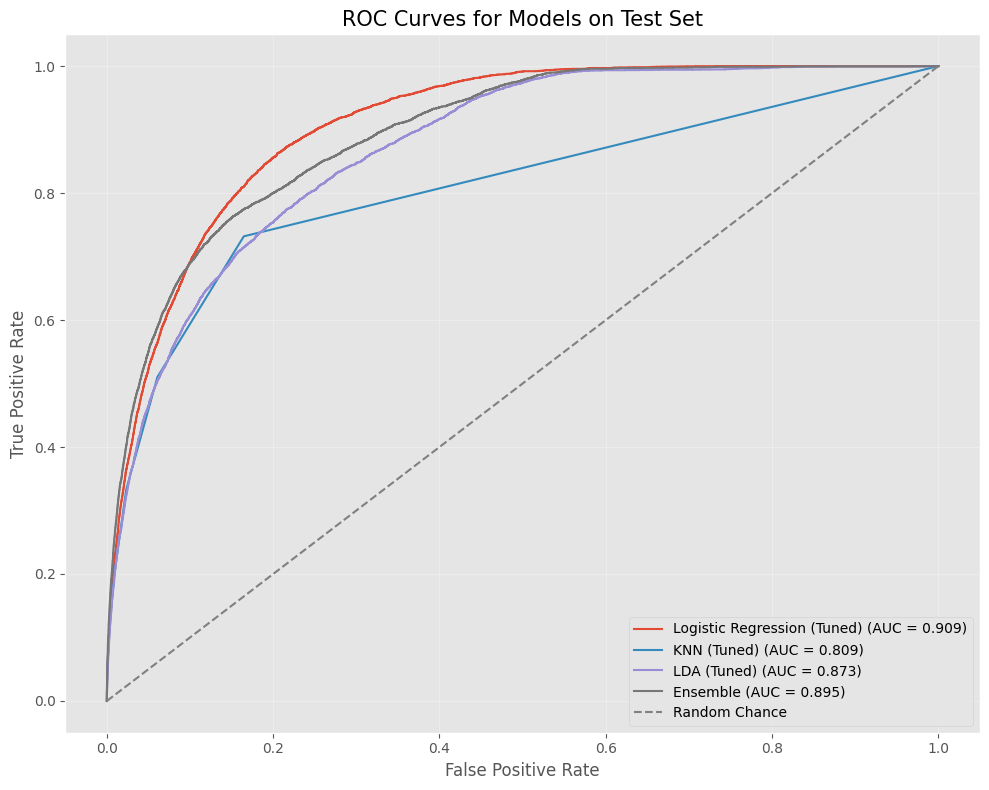

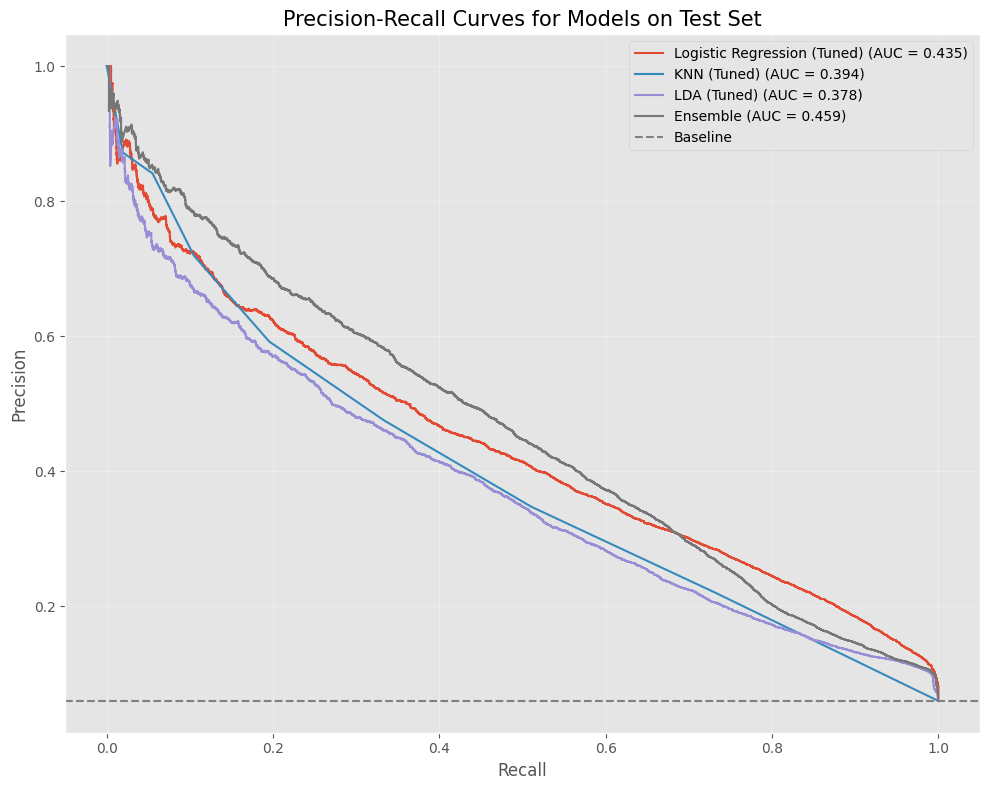

In [76]:
# Visualize test results - ROC curves
if test_results and len(test_probabilities) > 0:
    plt.figure(figsize=(10, 8))
    
    for model_name, y_pred_proba in test_probabilities.items():
        if y_pred_proba is not None:
            fpr, tpr, _ = roc_curve(y_test_out, y_pred_proba)
            roc_auc = auc(fpr, tpr)
            
            plt.plot(fpr, tpr, label=f'{model_name} (AUC = {roc_auc:.3f})')
    
    plt.plot([0, 1], [0, 1], linestyle='--', color='gray', label='Random Chance')
    plt.xlabel('False Positive Rate', fontsize=12)
    plt.ylabel('True Positive Rate', fontsize=12)
    plt.title('ROC Curves for Models on Test Set', fontsize=15)
    plt.legend(loc='lower right')
    plt.grid(True, alpha=0.3)
    plt.tight_layout()
    plt.show()
    
    # Precision-Recall curves
    plt.figure(figsize=(10, 8))
    
    for model_name, y_pred_proba in test_probabilities.items():
        if y_pred_proba is not None:
            precision, recall, _ = precision_recall_curve(y_test_out, y_pred_proba)
            pr_auc = auc(recall, precision)
            
            plt.plot(recall, precision, label=f'{model_name} (AUC = {pr_auc:.3f})')
    
    # Add baseline
    no_skill = sum(y_test_out) / len(y_test_out)
    plt.axhline(y=no_skill, linestyle='--', color='gray', label='Baseline')
    
    plt.xlabel('Recall', fontsize=12)
    plt.ylabel('Precision', fontsize=12)
    plt.title('Precision-Recall Curves for Models on Test Set', fontsize=15)
    plt.legend(loc='best')
    plt.grid(True, alpha=0.3)
    plt.tight_layout()
    plt.show()

 # 7. Feature Importance Analysis



 Let's analyze which features are most important for our best model.

In [77]:
# Check if we have test_results_df
if 'test_results_df' not in locals() or test_results_df.empty:
    print("No test results available for feature importance analysis.")
else:
    # Determine best model based on test F1 score
    best_model_name = test_results_df['F1 Score'].idxmax()
    print(f"Best model based on test F1 score: {best_model_name}")
    
    # Get the best model
    best_model = None
    
    # Handle model name cases properly
    if best_model_name in models_to_evaluate:
        best_model = models_to_evaluate[best_model_name]
        print(f"Successfully retrieved model: {best_model_name}")
    else:
        print(f"Could not find model: {best_model_name}")
    
    # Only proceed if we have a model
    if best_model is not None:
        # Check if model is tree-based or has feature_importances_
        if hasattr(best_model, 'feature_importances_'):
            # Direct access for tree-based models
            importances = best_model.feature_importances_
            feature_names = X_train_final.columns
            
            # Create feature importance dataframe
            feature_importance_df = pd.DataFrame({
                'Feature': feature_names,
                'Importance': importances
            })
            
            # Sort by importance
            feature_importance_df = feature_importance_df.sort_values('Importance', ascending=False)
            
            # Plot top 20 most important features
            plt.figure(figsize=(12, 10))
            top_features = feature_importance_df.head(20)
            
            ax = sns.barplot(x='Importance', y='Feature', data=top_features)
            plt.title(f'Top 20 Feature Importances for {best_model_name}', fontsize=15)
            plt.tight_layout()
            plt.show()
            
            print("Top 10 most important features:")
            print(feature_importance_df.head(10))
            
        # Handle VotingClassifier ensemble models
        elif hasattr(best_model, 'estimators'):  # Note: estimators not estimators_
            print("Best model is a VotingClassifier ensemble. Analyzing feature importance of its components.")
            
            # Access estimators differently in VotingClassifier
            for i, estimator in enumerate(best_model.estimators):
                # For VotingClassifier, estimators is a list of models, not (name, model) tuples
                if hasattr(estimator, 'feature_importances_'):
                    # Get the name based on the model type
                    name = type(estimator).__name__
                    
                    importances = estimator.feature_importances_
                    feature_names = X_train_final.columns
                    
                    # Create feature importance dataframe
                    feature_importance_df = pd.DataFrame({
                        'Feature': feature_names,
                        'Importance': importances
                    })
                    
                    # Sort by importance
                    feature_importance_df = feature_importance_df.sort_values('Importance', ascending=False)
                    
                    # Plot top 20 most important features
                    plt.figure(figsize=(12, 10))
                    top_features = feature_importance_df.head(20)
                    
                    ax = sns.barplot(x='Importance', y='Feature', data=top_features)
                    plt.title(f'Top 20 Feature Importances for Ensemble Component {i+1}: {name}', fontsize=15)
                    plt.tight_layout()
                    plt.show()
                    
                    print(f"Top 10 most important features for ensemble component {i+1} ({name}):")
                    print(feature_importance_df.head(10))
                    break  # Just use the first tree-based model
                
        # For models without direct feature_importances_ 
        else:
            print(f"Model {best_model_name} does not directly expose feature importances.")
            
            try:
                # Try to get coefficients for linear models
                if hasattr(best_model, 'coef_'):
                    coef = best_model.coef_[0] if best_model.coef_.ndim > 1 else best_model.coef_
                    feature_names = X_train_final.columns
                    
                    # Create feature importance dataframe
                    feature_importance_df = pd.DataFrame({
                        'Feature': feature_names,
                        'Coefficient': coef
                    })
                    
                    # Sort by absolute coefficient value
                    feature_importance_df['Abs_Coefficient'] = feature_importance_df['Coefficient'].abs()
                    feature_importance_df = feature_importance_df.sort_values('Abs_Coefficient', ascending=False)
                    
                    # Plot top 20 most important features
                    plt.figure(figsize=(12, 10))
                    top_features = feature_importance_df.head(20)
                    
                    ax = sns.barplot(x='Coefficient', y='Feature', data=top_features)
                    plt.title(f'Top 20 Feature Coefficients for {best_model_name}', fontsize=15)
                    plt.tight_layout()
                    plt.show()
                    
                    print("Top 10 most important features by coefficient magnitude:")
                    print(feature_importance_df[['Feature', 'Coefficient']].head(10))
                else:
                    print("Consider using permutation importance or SHAP values for this model type.")
            except Exception as e:
                print(f"Error extracting feature importance: {str(e)}")
                print("Consider using permutation importance or SHAP values for this model type.")

Best model based on test F1 score: Ensemble
Successfully retrieved model: Ensemble
Best model is a VotingClassifier ensemble. Analyzing feature importance of its components.


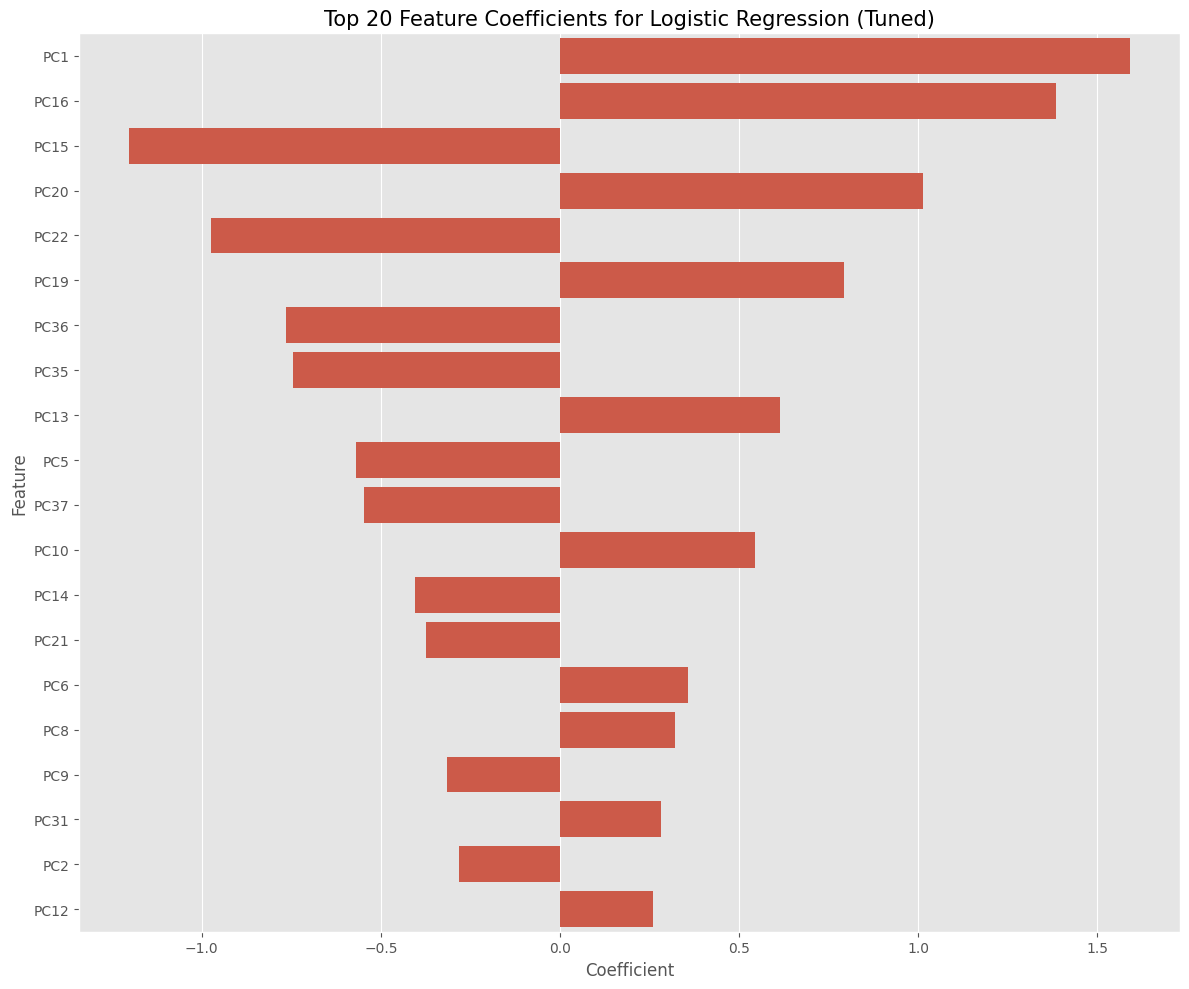

Top 10 most important features by coefficient magnitude:
   Feature  Coefficient
0      PC1     1.591328
15    PC16     1.385211
14    PC15    -1.202561
19    PC20     1.013046
21    PC22    -0.975054
18    PC19     0.792207
35    PC36    -0.764262
34    PC35    -0.746540
12    PC13     0.613604
4      PC5    -0.569819


In [83]:
# Extract feature importance from the Logistic Regression tuned model
if 'Logistic Regression (Tuned)' in models_to_evaluate:
   # Get the model
   lr_model = models_to_evaluate['Logistic Regression (Tuned)']
   
   # Extract coefficients
   if hasattr(lr_model, 'coef_'):
       coef = lr_model.coef_[0] if lr_model.coef_.ndim > 1 else lr_model.coef_
       feature_names = X_train_final.columns
       
       # Create feature importance dataframe
       lr_importance_df = pd.DataFrame({
           'Feature': feature_names,
           'Coefficient': coef
       })
       
       # Sort by absolute coefficient value
       lr_importance_df['Abs_Coefficient'] = lr_importance_df['Coefficient'].abs()
       lr_importance_df = lr_importance_df.sort_values('Abs_Coefficient', ascending=False)
       
       # Plot top 20 most important features
       plt.figure(figsize=(12, 10))
       top_features = lr_importance_df.head(20)
       
       sns.barplot(x='Coefficient', y='Feature', data=top_features)
       plt.title('Top 20 Feature Coefficients for Logistic Regression (Tuned)', fontsize=15)
       plt.tight_layout()
       plt.show()
       
       print("Top 10 most important features by coefficient magnitude:")
       print(lr_importance_df[['Feature', 'Coefficient']].head(10))
   else:
       print("Logistic Regression model doesn't have coefficients attribute.")
else:
   print("Logistic Regression (Tuned) model not found in the evaluated models.")